# Exploratory Data Analysis

## Setup

In [22]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import urllib.request
import pandas as pd
import urllib
import tarfile
import os
import numpy as np
np.random.seed(42)
import sklearn
import seaborn as sns # importing seaborn for the heatmap
import sys
assert sys.version_info >= (3, 5)
from sklearn.preprocessing import OrdinalEncoder
# Python ≥3.5 is required

# Scikit-Learn ≥0.20 is required
assert sklearn.__version__ >= "0.20"

# Common imports

# To plot pretty figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Reference- https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb

# saving the figures; method can be used later
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Lab 2. Basics of Data Processing
Visualization and initial data exploration was done to gain insights on the data attributes. Data cleaning and pre-processing was also performed, along with appropriate visulaisations to give context to the data.


## Data Wrangling

In [560]:
data = pd.read_csv("student-por.csv")  # reading the csv file with the data

print(data.shape)  # to understand the dimensions of the dataset
# to display the number of rows/instances
print("rows = {}".format(data.shape[0]))
# to display the number of columns/attributes
print("columns = {}".format(data.shape[1]))

(649, 33)
rows = 649
columns = 33


In [561]:
data.head(10)  # to get a glimpse of the data

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0  ...      4        3      4     1     1      3        4   0  11  11  
1  ...      5        3      3     1     1      3        2   9  11  11  
2  ...      4        3      2     2     3      3        6  12  13  12  
3  ...      3        2      2     1     1      5        0  14  14  14  
4  ...      4        3      2     1     2      5        0  11  13  13  
5  ...      5        4      2     1     2      5        6  12  12  13  
6  ...      4        4      4     1     1      3        0  13  12  13  
7  ...      4        1      4     1     1      1        2  10  13  13  
8  ...      4        2      2     1     1      1        0  15  16  17  
9  ...      5        5      1     1     1      5        0  12  12  13  

[10 rows x 33 columns]

In [562]:
data.tail(10)  # to get a glimpse of the data

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
639     MS   M   19       R     GT3       T     1     1     other  services   
640     MS   M   18       R     GT3       T     4     2     other     other   
641     MS   F   18       R     GT3       T     2     2   at_home     other   
642     MS   F   17       U     GT3       T     4     3   teacher     other   
643     MS   F   18       R     GT3       T     4     4   teacher   at_home   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
639  ...      4        3      2     1     3      5        0   5   8   0  
640  ...      5        4      3     4     3      3        0   7   7   0  
641  ...      5        3      3     1     3      4        0  14  17  15  
642  ...      5        5      4     1     1      1        0   6   9  11  
643  ...      4        4      3     2     2      5        4   7   9  10  
644  ...      5        4      2     1     2      5        4  10  11  10  
645  ...      4        3      4     1     1      1        4  15  15  16  
646  ...      1        1      1     1     1      5        6  11  12   9  
647  ...      2        4      5     3     4      2        6  10  10  10  
648  ...      4        4      1     3     4      5        4  10  11  11  

[10 rows x 33 columns]

In [563]:
data.sample()  # returns a sample random row from the data frame

school sex  age address famsize Pstatus  Medu  Fedu   Mjob   Fjob  ...  \
118     GP   M   17       R     GT3       T     1     3  other  other  ...   

    famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
118      5        2      4     1     4      5       14  12  11  11  

[1 rows x 33 columns]

In [564]:
data.info()  # to understand the attributes and their types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [565]:
data.describe(
)  # to view a summary of the descriptive statistics of the numerical attributes in the dataset

age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.051093    1.175766    0.924834    1.284380    1.446259   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    2.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  649.000000  649.000000  649.000000  649.000000  
mean     3.659476   11.399076   11.570108   11.906009  
std      4.640759    2.745265    2.913639    3.230656  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000   10.000000   10.000000   10.000000  
50%      2.000000   11.000000   11.000000   12.000000  
75%      6.000000   13.000000   13.000000   14.000000  
max     32.000000   19.000000   19.000000   19.000000

## Cleaning Data

In [566]:
data.isnull().sum().sum()  # to check for any null values in the dataset

0

In [567]:
data.duplicated().describe(
)  # one unique value of false means no duplicate value

count       649
unique        1
top       False
freq        649
dtype: object

In [568]:
# data.drop_duplicates() # we do not have duplicate values in our dataset as proved above

# Drops rows with null or missing values # we do not have null values
data.dropna()  # dropping missing values, if present in dataset

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        4   0  11  11  
1    ...      5        3      3     1     1      3        2   9  11  11  
2    ...      4        3      2     2     3      3        6  12  13  12  
3    ...      3        2      2     1     1      5        0  14  14  14  
4    ...      4        3      2     1     2      5        0  11  13  13  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
644  ...      5        4      2     1     2      5        4  10  11  10  
645  ...      4        3      4     1     1      1        4  15  15  16  
646  ...      1        1      1     1     1      5        6  11  12   9  
647  ...      2        4      5     3     4      2        6  10  10  10  
648  ...      4        4      1     3     4      5        4  10  11  11  

[649 rows x 33 columns]

In [569]:
# renaming the data columns appropriately for our understanding
data.rename(columns={
    'famsize': 'fam_size',
    'Pstatus': 'parent_status',
    'Medu': 'mom_edu',
    'Fedu': 'dad_edu',
    'Mjob': 'mom_job',
    'Fjob': 'dad_job',
    'schoolsup': 'school_support',
    'famsup': 'fam_support',
    'paid': 'paid_class',
    'higher': 'higher_edu',
    'romantic': 'romantic_relations',
    'famrel': 'fam_relations',
    'goout': 'outings',
    'Dalc': 'workday_alcohol',
    'Walc': 'weekend_alcohol'
},
            inplace=True)

## Checking for Outliers or Invalid Data
#### Note: These attributes- mom_edu, dad_edu, traveltime, studytime, famrelations, freetime, outings, workday_alcohol, weekend_alcohol, and health are ordinal data but have been converted to numeric for analysis purposes. We are not checking for outliers but just for invalid values for these attributes. Ordinal values ranging from 1-5 are very low-very high.

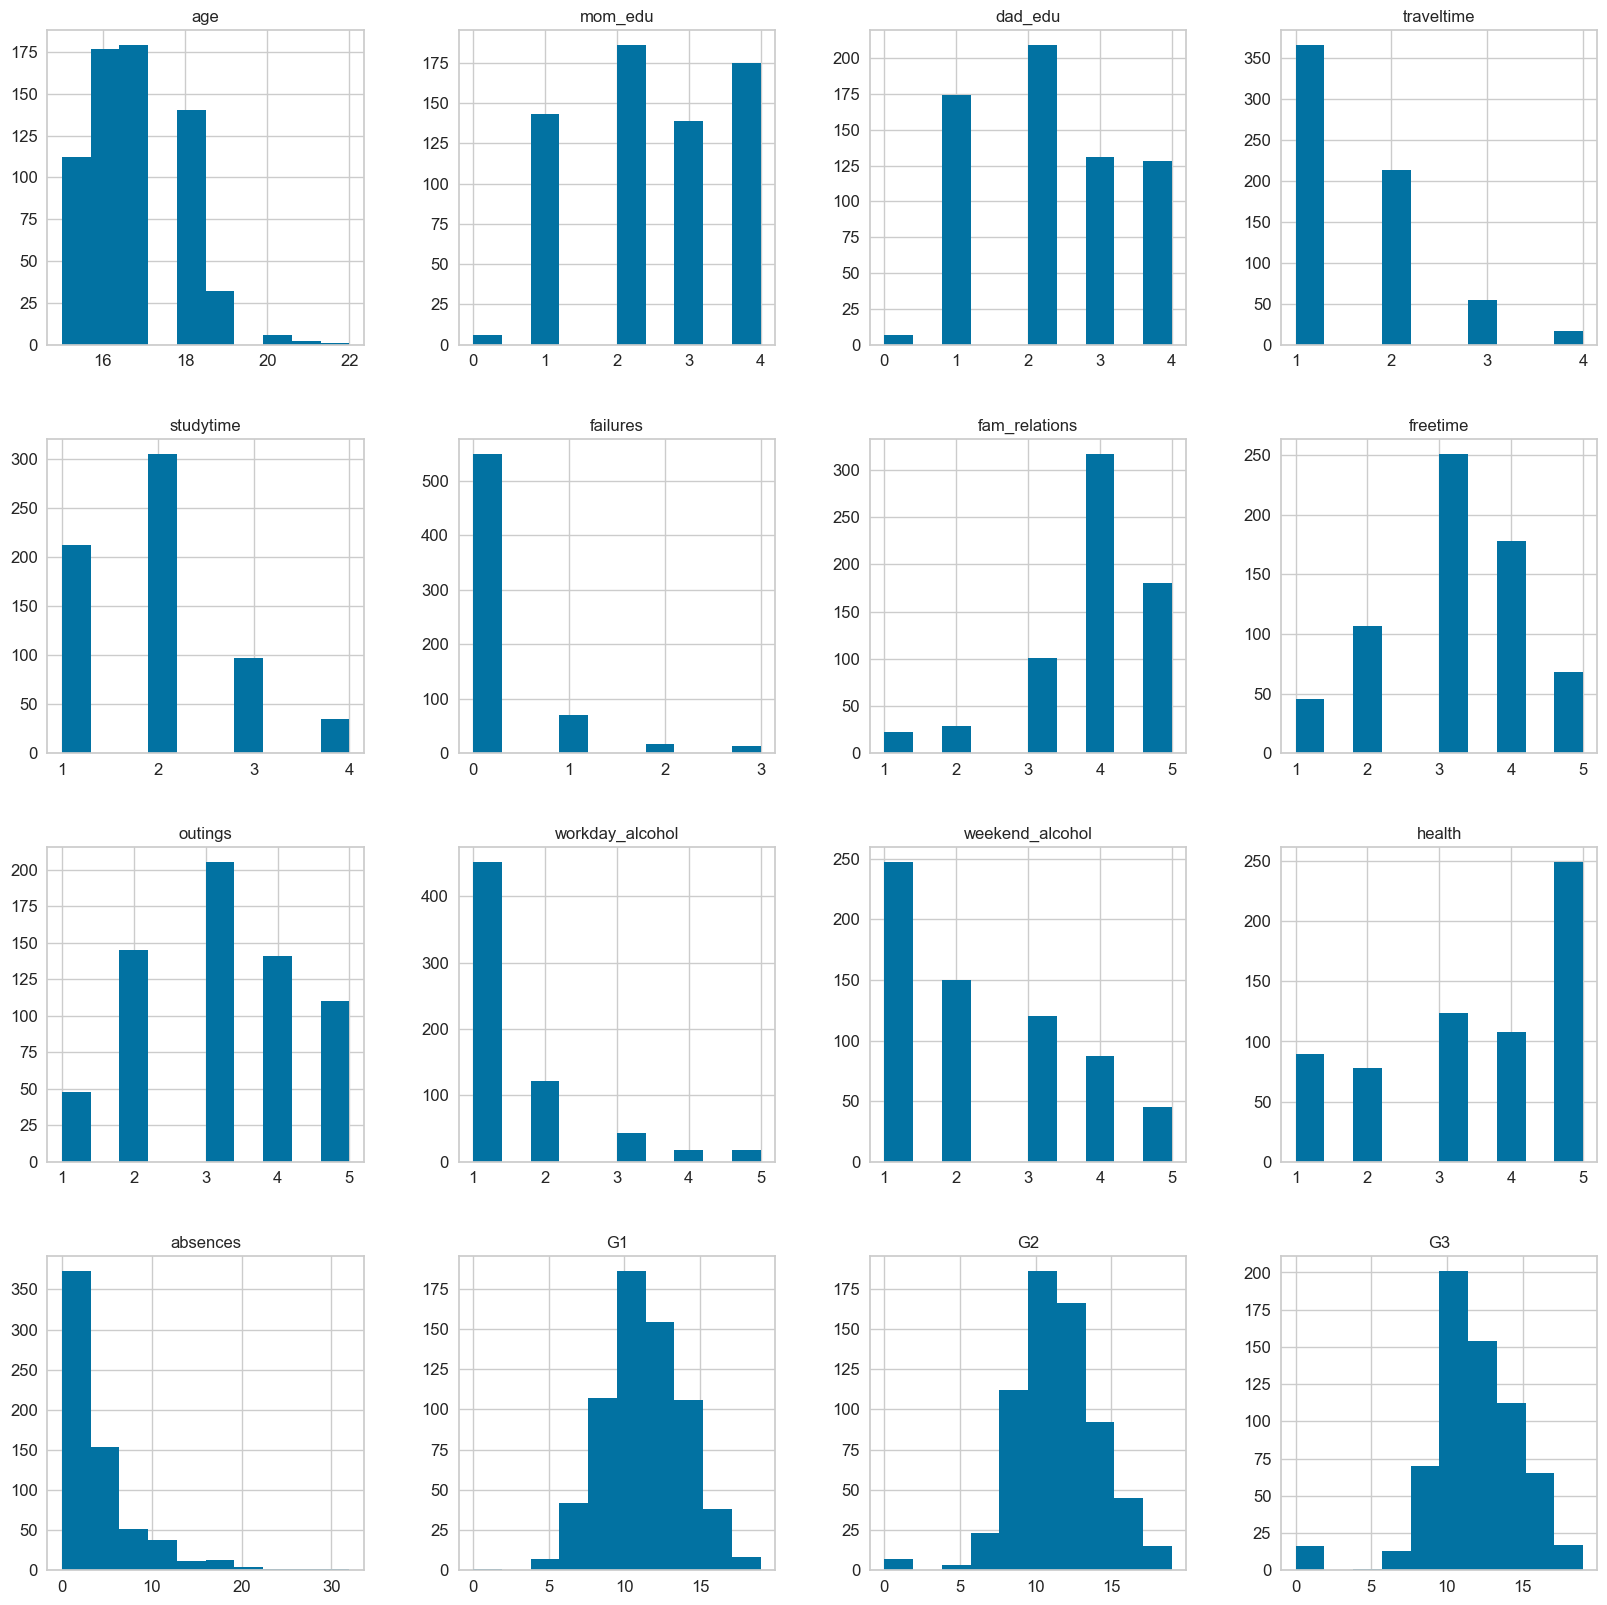

In [570]:
# To plot a histogram for each numerical attribute, aids in checking for nonsensical extreme values (invalid values) in attributes that were converted from ordinal to numeric.
data.hist(figsize=(20, 20))
plt.show()

    school sex  age address fam_size parent_status  mom_edu  dad_edu  \
279     GP   M   22       U      GT3             T        3        1   

      mom_job   dad_job  ... fam_relations freetime  outings  workday_alcohol  \
279  services  services  ...             5        4        5                5   

     weekend_alcohol health absences G1 G2 G3  
279                5      1       12  7  8  5  

[1 rows x 33 columns]


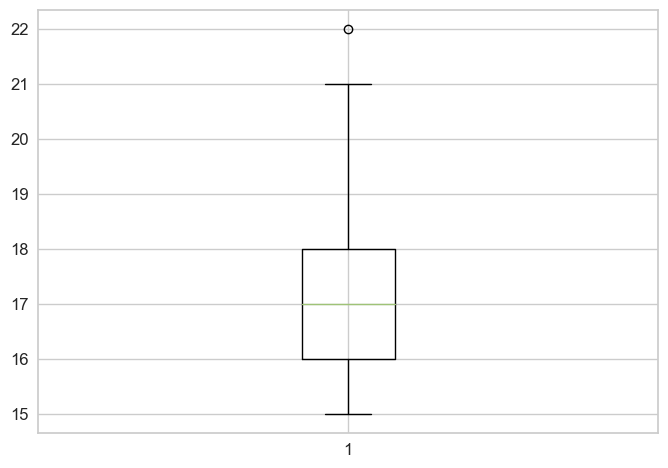

In [571]:
#Computing quantiles
age_Q1 = data["age"].quantile(0.25)
age_Q3 = data["age"].quantile(0.75)
age_IQR = age_Q3 - age_Q1  # Computing IQR

# Data points below the lower fence (Q1-1.5*IQR) and above the upper fence (Q3+1.5*IQR) are considered to be outliers.
age_outliers = data[(data["age"] < (age_Q1 - 1.5 * age_IQR))
                    | (data["age"] > (age_Q3 + 1.5 * age_IQR))]

print(age_outliers)  # to check out the outliers

# # Filtering Values between Q1-1.5IQR and Q3+1.5IQR, removing outliers from the dataset
# data = data[(data["age"]>=(age_Q1 - 1.5 * age_IQR)) & (data["age"]<=(age_Q3 + 1.5 * age_IQR))]
# We do not want the filter the data as we would like to consider the only person of 22 years of age for possible interesting correlations.
# We might want to reconsider our decision at a later point if required.

# Creating boxplot, dots representing data above the upper fence or below the lower fence represent outliers
age_plot = plt.boxplot(data["age"])
plt.show(age_plot)

In [572]:
# Data points above mean + 3*std and below mean + 3*std are considered outliers
upper_G1 = data["G1"].mean() + 3 * data["G1"].std()
lower_G1 = data["G1"].mean() - 3 * data["G1"].std()
print(upper_G1)
print(lower_G1)
data_1 = data[(data["G1"] < upper_G1) & (data["G1"] > lower_G1)]
print(data_1.shape)

upper_G2 = data_1["G2"].mean() + 3 * data_1["G2"].std()
lower_G2 = data_1["G2"].mean() - 3 * data_1["G2"].std()
print(upper_G2)
print(lower_G2)
data_2 = data_1[(data_1["G2"] < upper_G2) & (data_1["G2"] > lower_G2)]
print(data_2.shape)

# Using z-scores to find outliers, all data points with z-score above 3 and below -3 are said to be outliers
data_2['zscore'] = (data_2["G3"] - data_2["G3"].mean()) / data_2["G3"].std()
print(data_2[data_2["zscore"] > 3].shape)
# 9 values so they have been removed
print(data_2[data_2["zscore"] < -3].shape)

# new dataframe with no outliers
data_3 = data_2[(data_2['zscore'] > -3) & (data_2['zscore'] < 3)]

19.63487088610952
3.1632801154313093
(648, 33)
20.318397172480005
2.8235781361619683
(641, 33)
(0, 34)
(9, 34)


C:\Users\HP\AppData\Local\Temp\ipykernel_4756\3805946291.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['zscore'] = (data_2["G3"] - data_2["G3"].mean()) / data_2["G3"].std()


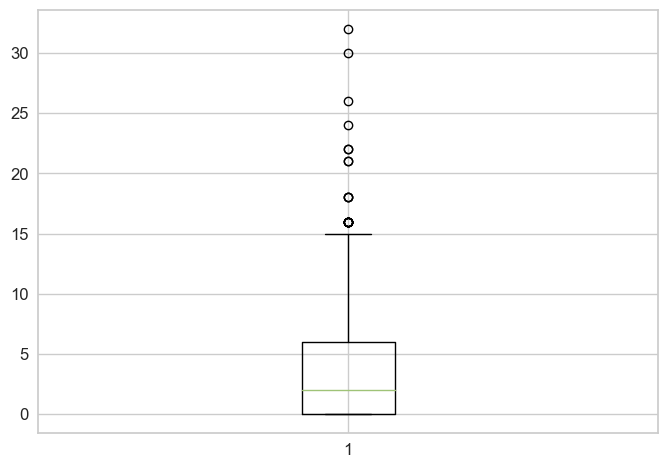

    school sex  age address fam_size parent_status  mom_edu  dad_edu  \
40      GP   F   16       U      LE3             T        2        2   
103     GP   F   15       U      GT3             T        3        2   
150     GP   F   15       U      GT3             A        3        3   
155     GP   M   17       U      GT3             T        2        1   
161     GP   M   16       U      GT3             T        4        4   
197     GP   F   17       U      LE3             T        3        3   
206     GP   M   17       U      GT3             T        1        2   
211     GP   M   16       R      LE3             T        3        3   
212     GP   F   17       U      GT3             T        4        4   
217     GP   F   17       R      GT3             T        2        2   
230     GP   F   17       U      GT3             T        4        3   
253     GP   F   18       U      LE3             A        2        4   
254     GP   F   18       U      LE3             T        2     

In [573]:
# Creating boxplots to check for outliers visually, dots representing data above the upper fence or below the lower fence represent outliers as explained already
absences_plot = plt.boxplot(data_3["absences"])
plt.show()

absences_Q1 = data_3["absences"].quantile(0.25)
absences_Q3 = data_3["absences"].quantile(0.75)
absences_IQR = absences_Q3 - absences_Q1  # Computing IQR

absences_outliers = data_3[(data_3["absences"] <
                           (absences_Q1 - 1.5 * absences_IQR))
                          | (data_3["absences"] >
                             (absences_Q3 + 1.5 * absences_IQR))]

print(absences_outliers)  # to check out the outliers

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR, making another dataset without outliers, to resuse outliers data in analysis if required
data4 = data_3[(data_3["absences"] >= (absences_Q1 - 1.5 * absences_IQR))
               & (data_3["absences"] <= (absences_Q3 + 1.5 * absences_IQR))]

In [574]:
print("For studytime")
# counts the occurences of values of each unique value in the column 'studytime'
print(data4['studytime'].value_counts())
# counts the occurences of each unique value in the column 'studytime'
print(data4['studytime'].value_counts().count())

print("For freetime")
# counts the occurences of values of each unique value in the column 'freetime'
print(data4['freetime'].value_counts())
# counts the occurences of each unique value in the column 'freetime'
print(data4['freetime'].value_counts().count())

print("\nFor failures-")
# counts the occurences of values of each unique value in the column 'failures'
print(data4['failures'].value_counts())
# counts the occurences of each unique value in the column 'failures'
print(data4['failures'].value_counts().count())

For studytime
2    284
1    195
3     97
4     35
Name: studytime, dtype: int64
4
For freetime
3    233
4    170
2    102
5     61
1     45
Name: freetime, dtype: int64
5

For failures-
0    527
1     57
2     14
3     13
Name: failures, dtype: int64
4


In [575]:
# counts the occurences of values of each unique value in the column 'health'
print(data4['health'].value_counts())

# counts the occurences of values of each unique value in the column 'parent_status'- "T" - living together or "A" - apart
print(data4['parent_status'].value_counts())

5    234
3    115
4    104
1     85
2     73
Name: health, dtype: int64
T    540
A     71
Name: parent_status, dtype: int64


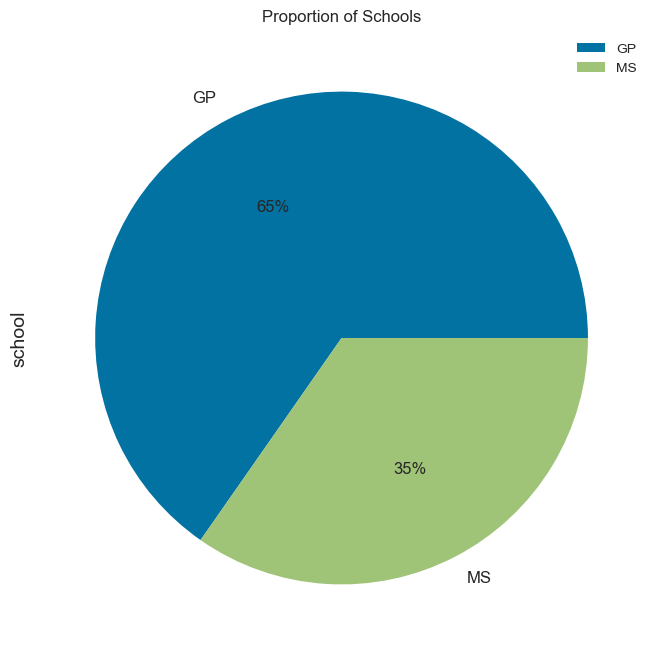

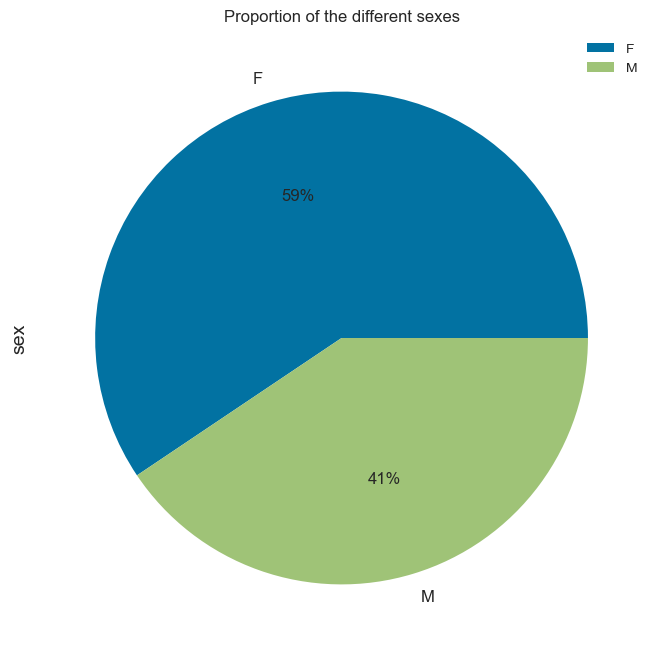

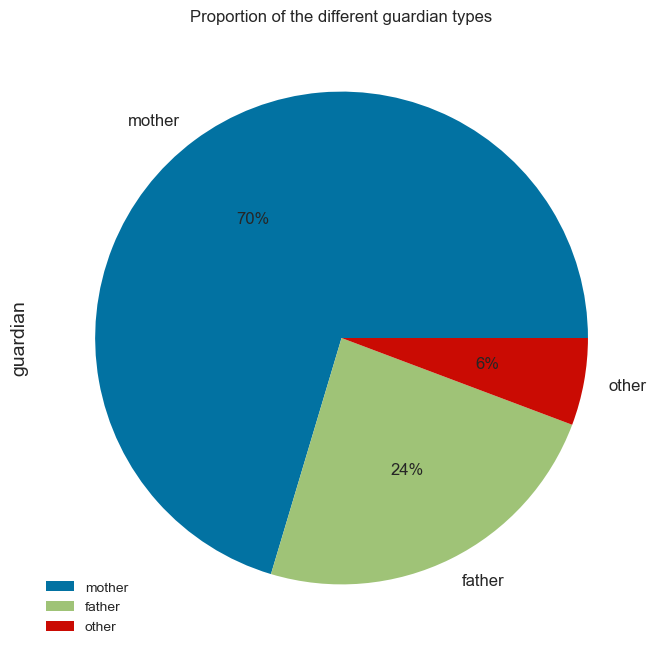

In [576]:
# Shows the proportion of schools mentioned; to confirm that there are no invalid values
plt.figure(figsize=(10, 8))
data4.school.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Proportion of Schools')
plt.legend()

# Shows the proportion of sexes mentioned; to confirm that there are no invalid values
plt.figure(figsize=(10,8))
data4.sex.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Proportion of the different sexes')
plt.legend()

# Shows the proportion of guardians types; to confirm that there are no invalid values
plt.figure(figsize=(10,8))
data4.guardian.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Proportion of the different guardian types')
plt.legend()

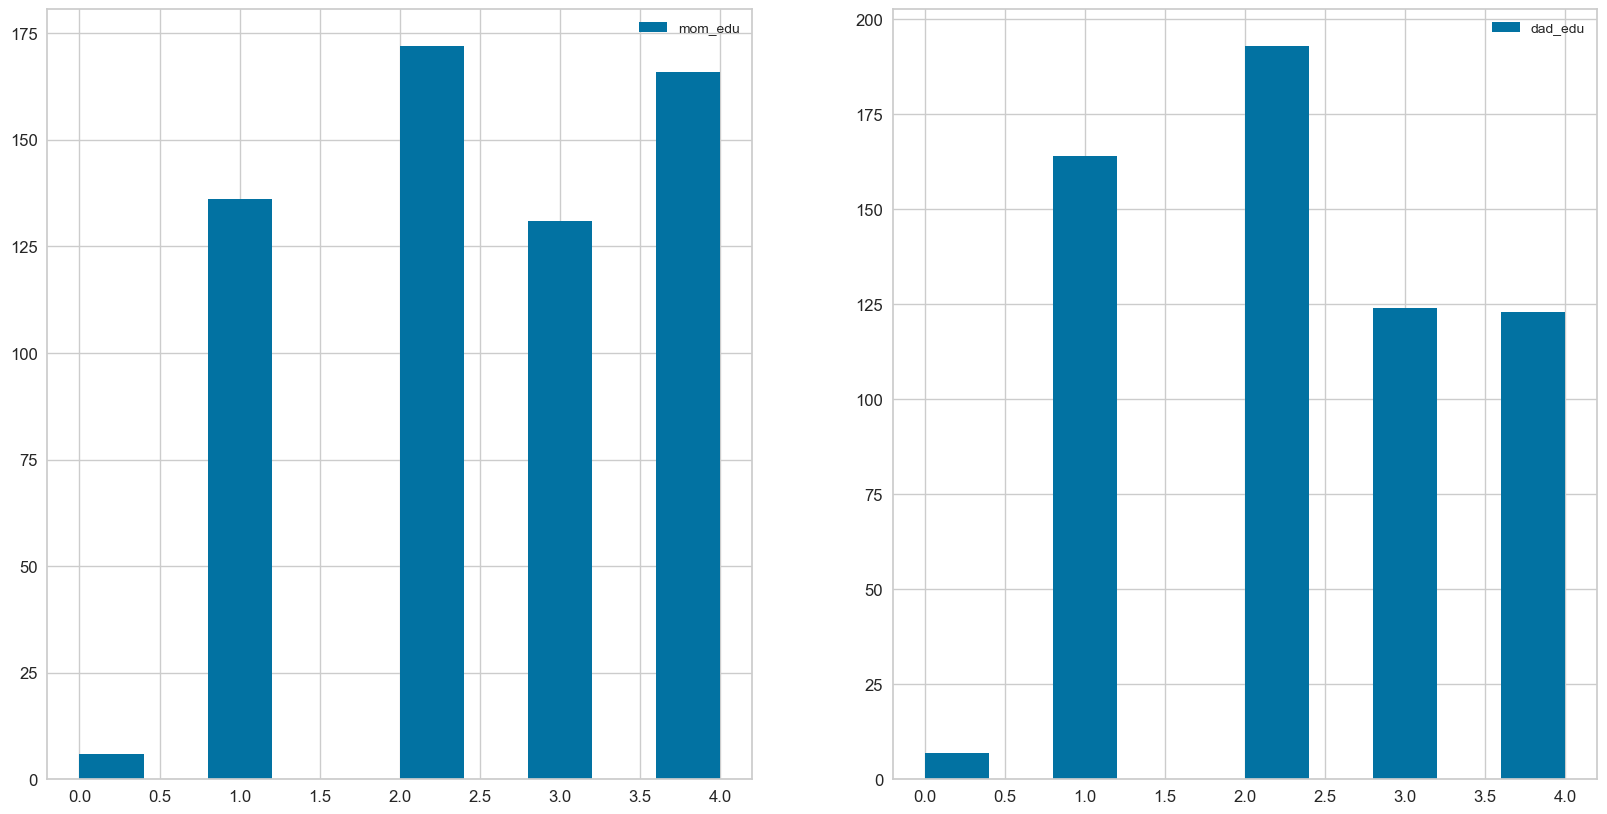

In [577]:
# To plot a histogram for visualizing and comparing mother's and father's education
fig, axes = plt.subplots(1, 2)
data4["mom_edu"].hist(legend='True', ax=axes[0], figsize=(20,10))
data4["dad_edu"].hist(legend='True', ax=axes[1], figsize=(20,10))
plt.show()

In [578]:
# counts the occurences of values of each unique value in the column 'mom_job'
data4['mom_job'].value_counts()
# counts the occurences of values of each unique value in the column 'dad_job'
data4['dad_job'].value_counts()

other       348
services    169
at_home      39
teacher      32
health       23
Name: dad_job, dtype: int64

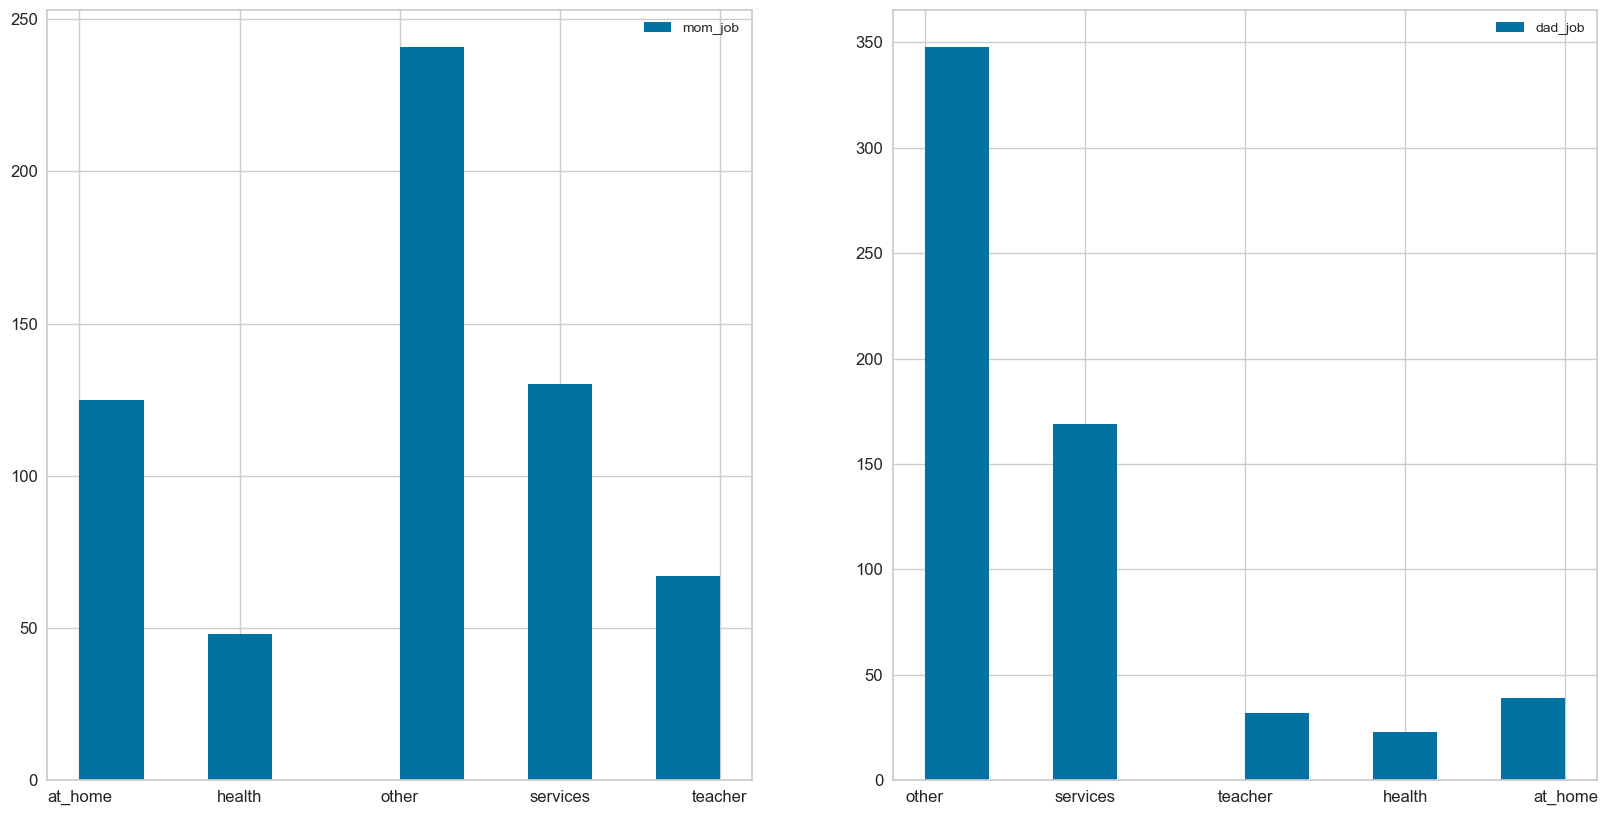

In [579]:
# To visualize the values of the mother's job and father's jobs
fig, axes = plt.subplots(1, 2)
data4["mom_job"].hist(legend='True', ax=axes[0], figsize=(20,10))
data4["dad_job"].hist(legend='True', ax=axes[1], figsize=(20,10))
plt.show()

<AxesSubplot:xlabel='address'>

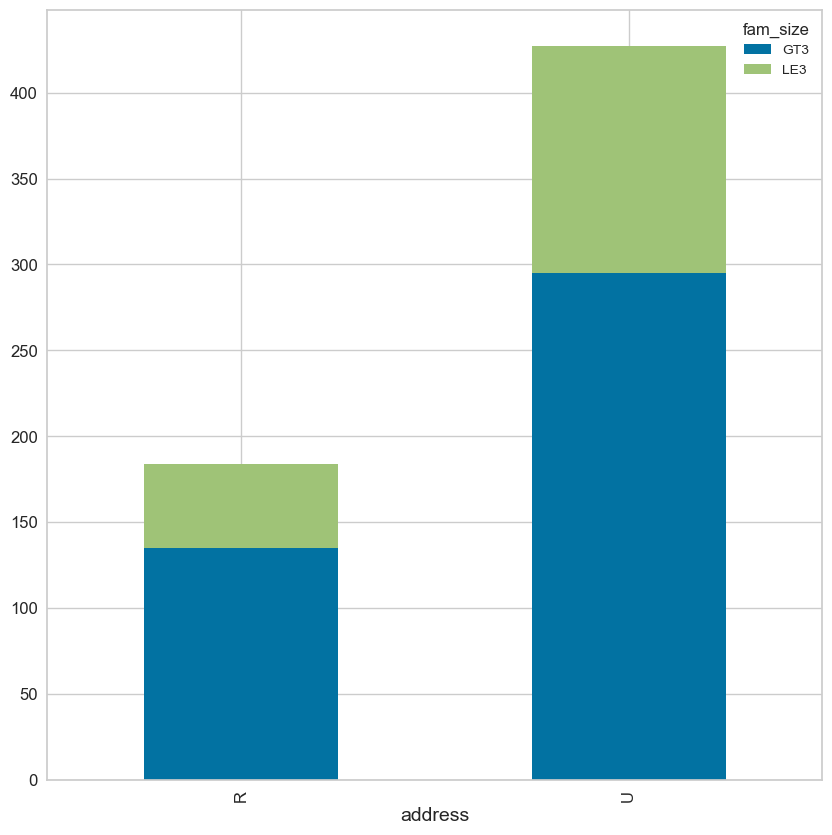

In [580]:
# Reference- https://stats.stackexchange.com/questions/520731/how-to-plot-binary-vs-categorical-nominal-data
# To visualize the relation between family size and the type of the address (urban(U) or rural(R))
pd.crosstab(data4['address'],data4['fam_size']).plot.bar(stacked=True, figsize=(10,10))

<AxesSubplot:xlabel='fam_relations'>

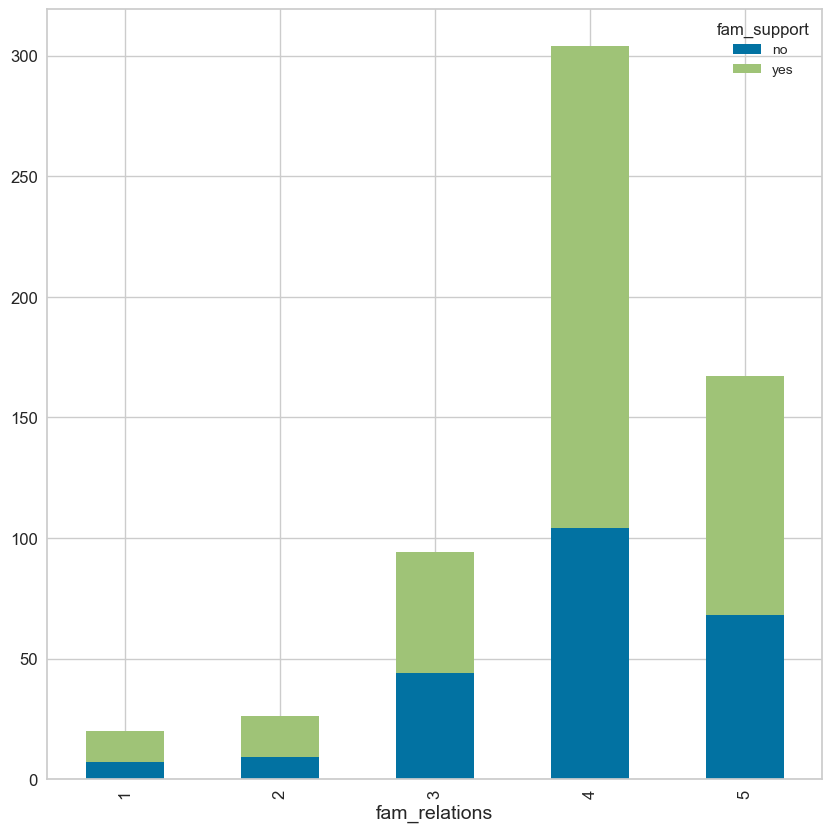

In [581]:
# To visualize the relation between level of family relation and the support from family
pd.crosstab(data4['fam_relations'],data4['fam_support']).plot.bar(stacked=True, figsize=(10,10))

<AxesSubplot:xlabel='reason'>

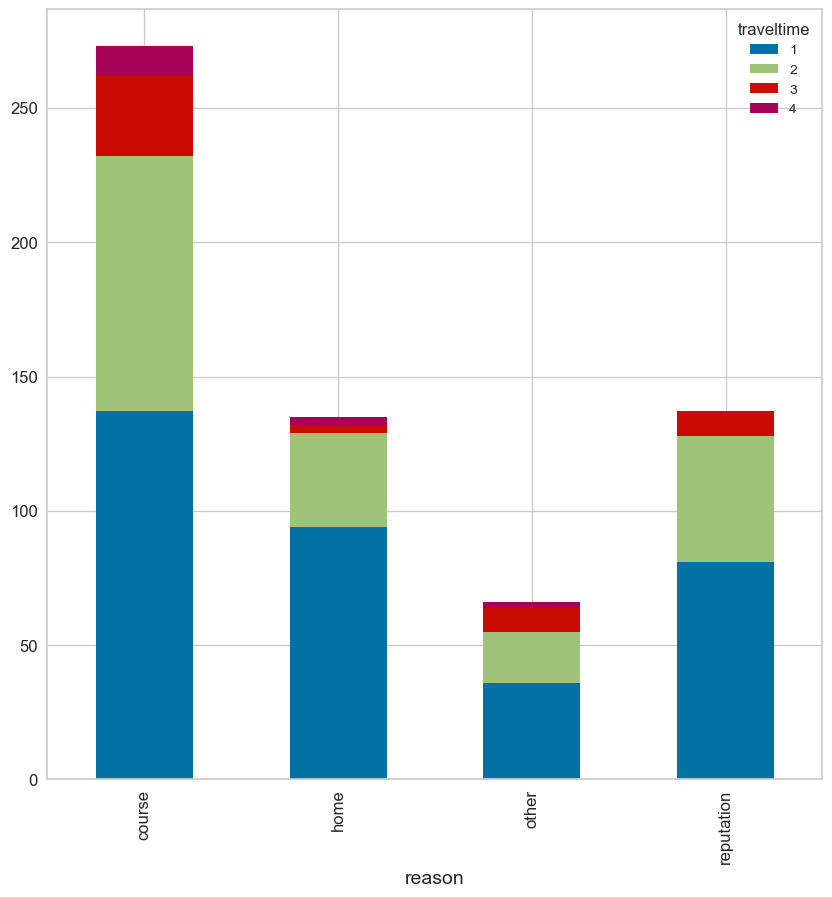

In [582]:
# To outline the relation between the reason for choosing the school v/s the travel time
pd.crosstab(data4['reason'],data4['traveltime']).plot.bar(stacked=True, figsize=(10,10))

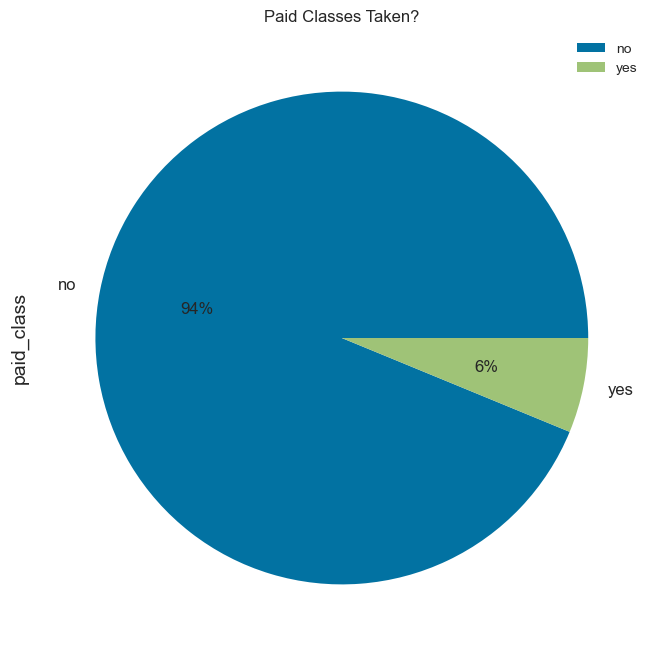

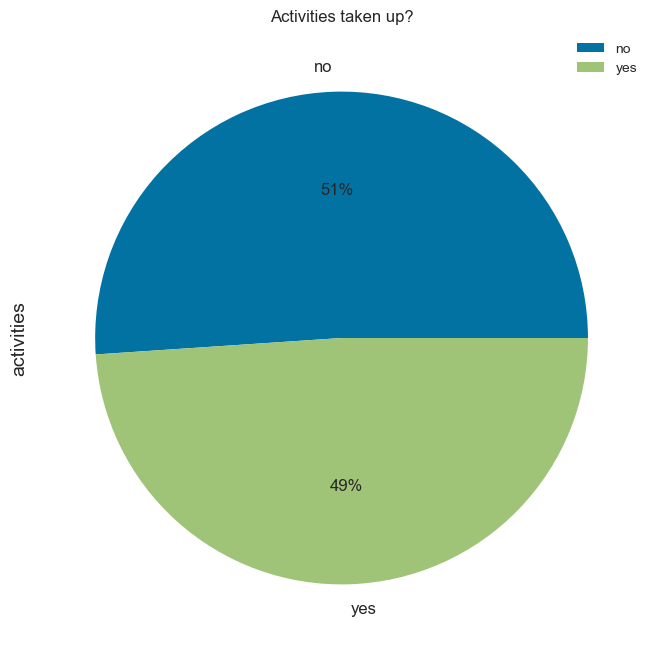

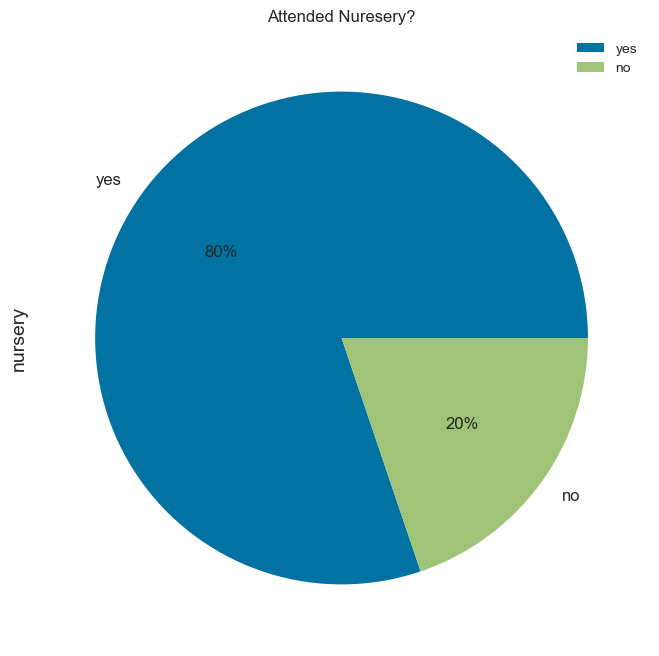

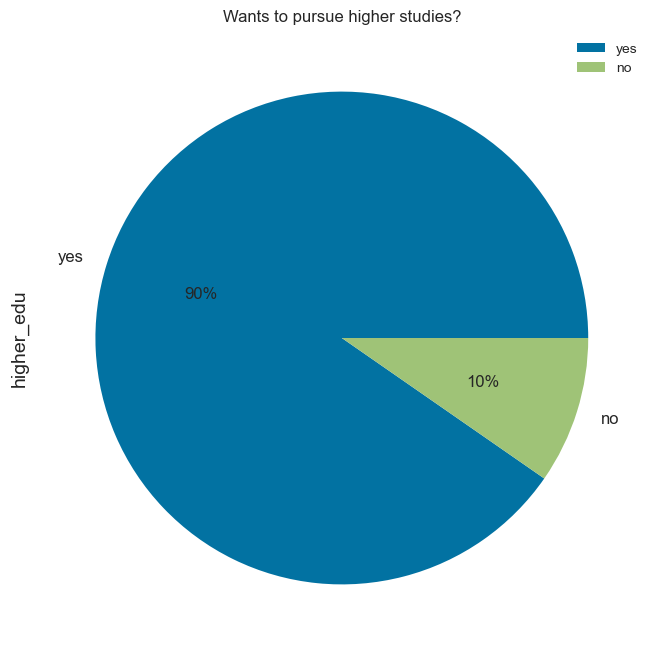

In [583]:
# To have pie charts with some attributes taking binary values
# paid classes for Math or Portuguese
plt.figure(figsize=(10, 8))
data4.paid_class.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Paid Classes Taken?')
plt.legend()

# takes part in other activities 
plt.figure(figsize=(10, 8))
data4.activities.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Activities taken up?')
plt.legend()

# attended nursery school (binary: yes or no)
plt.figure(figsize=(10, 8))
data4.nursery.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Attended Nuresery?')
plt.legend()

# higher - wants to take higher education (binary: yes or no)
plt.figure(figsize=(10, 8))
data4.higher_edu.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Wants to pursue higher studies?')
plt.legend()


In [584]:
# counts the occurences of values of each unique value in the column 'internet'- has access to or not
print(data4['internet'].value_counts())

# counts the occurences of values of each unique value in the column 'romantic_relations'- if they are in a romantic relationship or not
print(data4['romantic_relations'].value_counts())

# counts the occurences of values of each unique value in the column 'outings'- frequency of going out with friends
print(data4['outings'].value_counts())

yes    469
no     142
Name: internet, dtype: int64
no     392
yes    219
Name: romantic_relations, dtype: int64
3    196
2    140
4    133
5    100
1     42
Name: outings, dtype: int64


<AxesSubplot:xlabel='weekend_alcohol'>

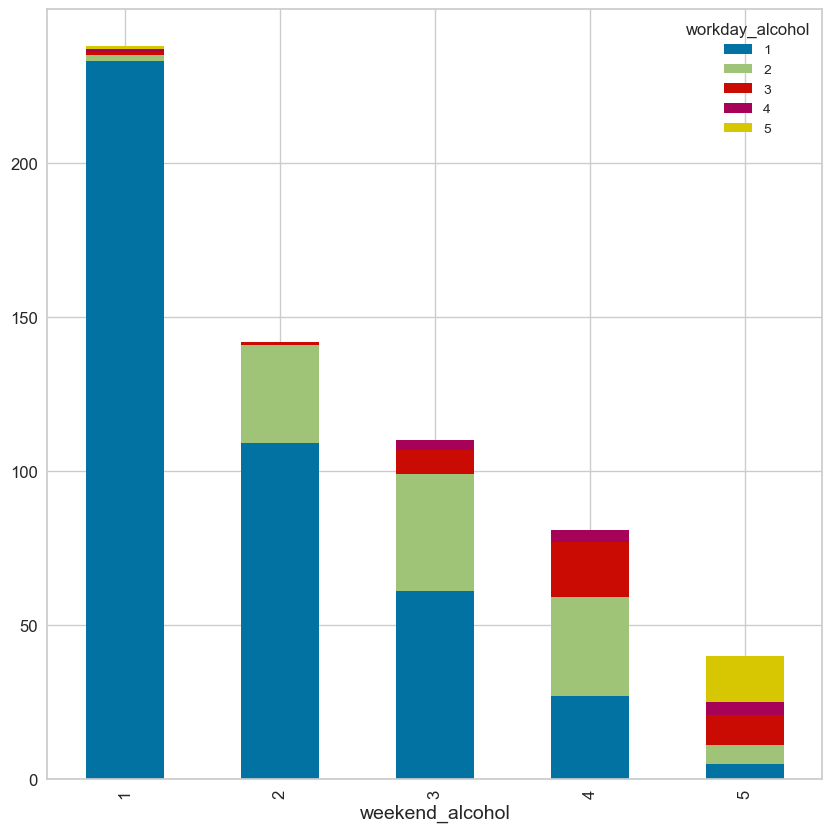

In [585]:
# To showcase the weekday and weekend alcohol consumption
pd.crosstab(data4['weekend_alcohol'],data4['workday_alcohol']).plot.bar(stacked=True, figsize=(10,10))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='absences', ylabel='G3'>

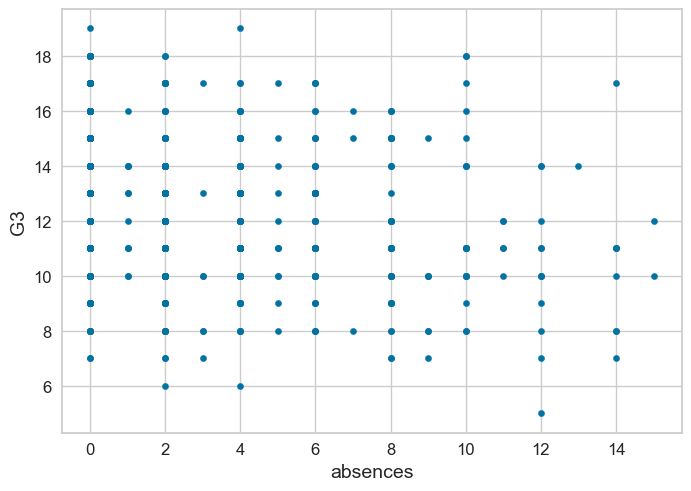

In [586]:
# To find a possible relationship between absences and final grade, before calculating the correlation matrix
data4.plot(kind="scatter", x="absences", y="G3")

The Exploratory Data Analysis (EDA) conducted gave valuable insights on the Student Peformance data, data was cleaned and pre-processed, outliers were filtered and certain areas of improvement were recognized. Continuous variables were converted into dicrete form through the process of dicretization. Normalization was performed on datasets with numerical features with widely disparate ranges, and the numerical summaries of attributes were generated and reported as observed.

# Lab 3. Feature Selection
We start this lab by feature engineering, a process of selecting a subset of relevant features from all the features used to make model building.
The standard correlation coefficient (Pearson’s r) method and the Chi-squared method for feature selection for categorical values was used in the following cells.

In [587]:
data4['avg_grade'] = (data4['G1']+data4['G2']+data4['G3'])/3 # to add an extra attribute- the average final grade
data4.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_4756\3837693695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['avg_grade'] = (data4['G1']+data4['G2']+data4['G3'])/3 # to add an extra attribute- the average final grade


school sex  age address fam_size parent_status  mom_edu  dad_edu   mom_job  \
1     GP   F   17       U      GT3             T        1        1   at_home   
2     GP   F   15       U      LE3             T        1        1   at_home   
3     GP   F   15       U      GT3             T        4        2    health   
4     GP   F   16       U      GT3             T        3        3     other   
5     GP   M   16       U      LE3             T        4        3  services   

    dad_job  ... outings workday_alcohol  weekend_alcohol  health  absences  \
1     other  ...       3               1                1       3         2   
2     other  ...       2               2                3       3         6   
3  services  ...       2               1                1       5         0   
4     other  ...       2               1                2       5         0   
5     other  ...       2               1                2       5         6   

   G1  G2  G3    zscore  avg_grade  
1   9  11  11 -0.345841  10.333333  
2  12  13  12 -0.012481  12.333333  
3  14  14  14  0.654237  14.000000  
4  11  13  13  0.320878  12.333333  
5  12  12  13  0.320878  12.333333  

[5 rows x 35 columns]

In [588]:
#Data was sorted into categorical bins of grades (A,B,C,D,E) accordingly
data4.sort_values(by=['avg_grade'])
bin_labels_5 = ['E', 'D', 'C', 'B', 'A']
data4['final_grade'] = pd.cut(x = data4['avg_grade'],
                              bins=[0, 11, 13, 15, 17, 20],
                              labels=bin_labels_5)
data4.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_4756\2023745238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['final_grade'] = pd.cut(x = data4['avg_grade'],


school sex  age address fam_size parent_status  mom_edu  dad_edu   mom_job  \
1     GP   F   17       U      GT3             T        1        1   at_home   
2     GP   F   15       U      LE3             T        1        1   at_home   
3     GP   F   15       U      GT3             T        4        2    health   
4     GP   F   16       U      GT3             T        3        3     other   
5     GP   M   16       U      LE3             T        4        3  services   

    dad_job  ... workday_alcohol weekend_alcohol  health  absences  G1  G2  \
1     other  ...               1               1       3         2   9  11   
2     other  ...               2               3       3         6  12  13   
3  services  ...               1               1       5         0  14  14   
4     other  ...               1               2       5         0  11  13   
5     other  ...               1               2       5         6  12  12   

   G3    zscore  avg_grade final_grade  
1  11 -0.345841  10.333333           E  
2  12 -0.012481  12.333333           D  
3  14  0.654237  14.000000           C  
4  13  0.320878  12.333333           D  
5  13  0.320878  12.333333           D  

[5 rows x 36 columns]

## Correlations

In [589]:
data4.drop(['zscore'], axis = 1, inplace = True) # dropping the z-scores calculated earlier before finding any correlations

C:\Users\HP\AppData\Local\Temp\ipykernel_4756\1468635189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4.drop(['zscore'], axis = 1, inplace = True) # dropping the z-scores calculated earlier before finding any correlations


In [590]:
# numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# df = data4.select_dtypes(include=numerics)
# df.columns

# df["parent_edu"] = (df['mom_edu']+df['dad_edu'])/2 # to add an extra attribute
# df["alcohol_consump"] = (df['workday_alcohol']+df['weekend_alcohol'])/2 # to add an extra attribute

In [591]:
# Encoding categorical data using ordinal encoding
columns = data4.select_dtypes(include=['object']).columns
ordinal_encoder = OrdinalEncoder()
data4[columns] = ordinal_encoder.fit_transform(data4[columns])

C:\Users\HP\AppData\Local\Temp\ipykernel_4756\3492055340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4[columns] = ordinal_encoder.fit_transform(data4[columns])


In [592]:
data4.head()
df = data4.copy()

In [593]:
# dropping redundant columns
df.drop(['G1','G2','G3','avg_grade'], axis = 1, inplace = True)
df.head()

school  sex  age  address  fam_size  parent_status  mom_edu  dad_edu  \
1     0.0  0.0   17      1.0       0.0            1.0        1        1   
2     0.0  0.0   15      1.0       1.0            1.0        1        1   
3     0.0  0.0   15      1.0       0.0            1.0        4        2   
4     0.0  0.0   16      1.0       0.0            1.0        3        3   
5     0.0  1.0   16      1.0       1.0            1.0        4        3   

   mom_job  dad_job  ...  internet  romantic_relations  fam_relations  \
1      0.0      2.0  ...       1.0                 0.0              5   
2      0.0      2.0  ...       1.0                 0.0              4   
3      1.0      3.0  ...       1.0                 1.0              3   
4      2.0      2.0  ...       0.0                 0.0              4   
5      3.0      2.0  ...       1.0                 0.0              5   

   freetime  outings  workday_alcohol  weekend_alcohol  health  absences  \
1         3        3                1                1       3         2   
2         3        2                2                3       3         6   
3         2        2                1                1       5         0   
4         3        2                1                2       5         0   
5         4        2                1                2       5         6   

   final_grade  
1            E  
2            D  
3            C  
4            D  
5            D  

[5 rows x 31 columns]

In [594]:
from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# # df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)


In [595]:
df.index = data4.index
df['final_grade'] = data4['final_grade']
df.head()

school  sex  age  address  fam_size  parent_status  mom_edu  dad_edu  \
1     0.0  0.0   17      1.0       0.0            1.0        1        1   
2     0.0  0.0   15      1.0       1.0            1.0        1        1   
3     0.0  0.0   15      1.0       0.0            1.0        4        2   
4     0.0  0.0   16      1.0       0.0            1.0        3        3   
5     0.0  1.0   16      1.0       1.0            1.0        4        3   

   mom_job  dad_job  ...  internet  romantic_relations  fam_relations  \
1      0.0      2.0  ...       1.0                 0.0              5   
2      0.0      2.0  ...       1.0                 0.0              4   
3      1.0      3.0  ...       1.0                 1.0              3   
4      2.0      2.0  ...       0.0                 0.0              4   
5      3.0      2.0  ...       1.0                 0.0              5   

   freetime  outings  workday_alcohol  weekend_alcohol  health  absences  \
1         3        3                1                1       3         2   
2         3        2                2                3       3         6   
3         2        2                1                1       5         0   
4         3        2                1                2       5         0   
5         4        2                1                2       5         6   

   final_grade  
1            E  
2            D  
3            C  
4            D  
5            D  

[5 rows x 31 columns]

In [596]:
# To find the most correlated features to class A, we replace all output labels 
#for class A with 1 and all other labels for classes B,C,D & E with 0.
df1 = df.copy()
df1['final_grade'] = df1['final_grade'].replace(['A'],1)
df1['final_grade'] = df1['final_grade'].replace(['B', 'C', 'D', 'E'],0)
df1['final_grade'] = df1['final_grade'].astype(float)
# df1.head()

corr_matrix = df1.corr()
corr_matrix["final_grade"].sort_values(ascending = False)

final_grade           1.000000
studytime             0.110850
mom_edu               0.101036
age                   0.068041
reason                0.062210
higher_edu            0.058570
address               0.055941
dad_job               0.053935
mom_job               0.038361
parent_status         0.035538
internet              0.031604
fam_size              0.007672
dad_edu               0.000251
health               -0.001506
fam_relations        -0.007877
workday_alcohol      -0.009388
school               -0.011736
weekend_alcohol      -0.013230
fam_support          -0.015263
school_support       -0.031232
outings              -0.035693
activities           -0.043343
freetime             -0.045681
paid_class           -0.046135
traveltime           -0.046965
sex                  -0.052072
failures             -0.062794
guardian             -0.065210
romantic_relations   -0.074917
nursery              -0.076595
absences             -0.086915
Name: final_grade, dtype: float64

<AxesSubplot:>

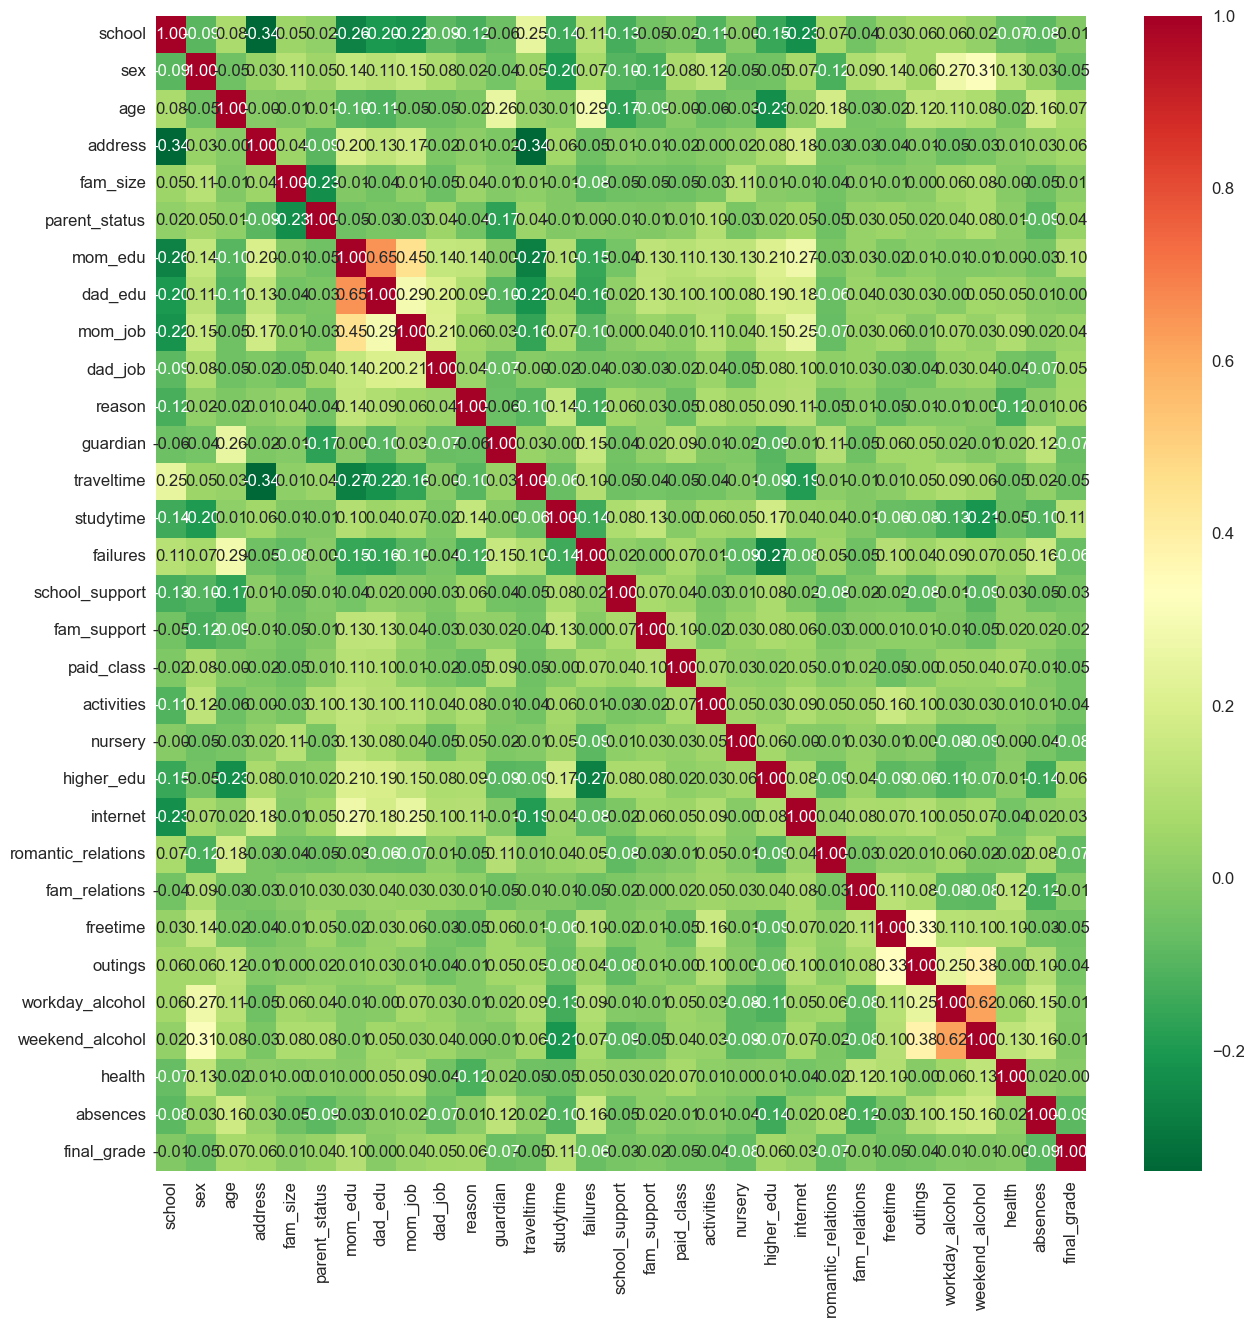

In [597]:
# plotting a heatmap to show the correlation
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df1.corr(), cmap = "RdYlGn_r", annot = True, fmt = '.2f')

In [598]:
# To find the most correlated features to class B, we replace all output labels 
#for class A with 1 and all other labels for classes A,C,D & E with 0.
df1 = df.copy()
df1['final_grade'] = df1['final_grade'].replace(['B'],1)
df1['final_grade'] = df1['final_grade'].replace(['A', 'C', 'D', 'E'],0)
df1['final_grade'] = df1['final_grade'].astype(float)
# df1.head()

corr_matrix = df1.corr()
corr_matrix["final_grade"].sort_values(ascending = False)

final_grade           1.000000
mom_edu               0.166827
dad_edu               0.138489
studytime             0.113783
higher_edu            0.100757
reason                0.092992
fam_relations         0.076416
dad_job               0.071685
nursery               0.065601
mom_job               0.065254
activities            0.047273
age                   0.042847
internet              0.031906
romantic_relations    0.024292
fam_support           0.013472
address               0.012178
fam_size              0.003814
guardian             -0.004211
outings              -0.022341
paid_class           -0.031211
parent_status        -0.033410
sex                  -0.041591
freetime             -0.047826
school               -0.053623
traveltime           -0.061736
health               -0.062528
absences             -0.065018
workday_alcohol      -0.082990
weekend_alcohol      -0.092853
school_support       -0.106336
failures             -0.108024
Name: final_grade, dtype: float64

<AxesSubplot:>

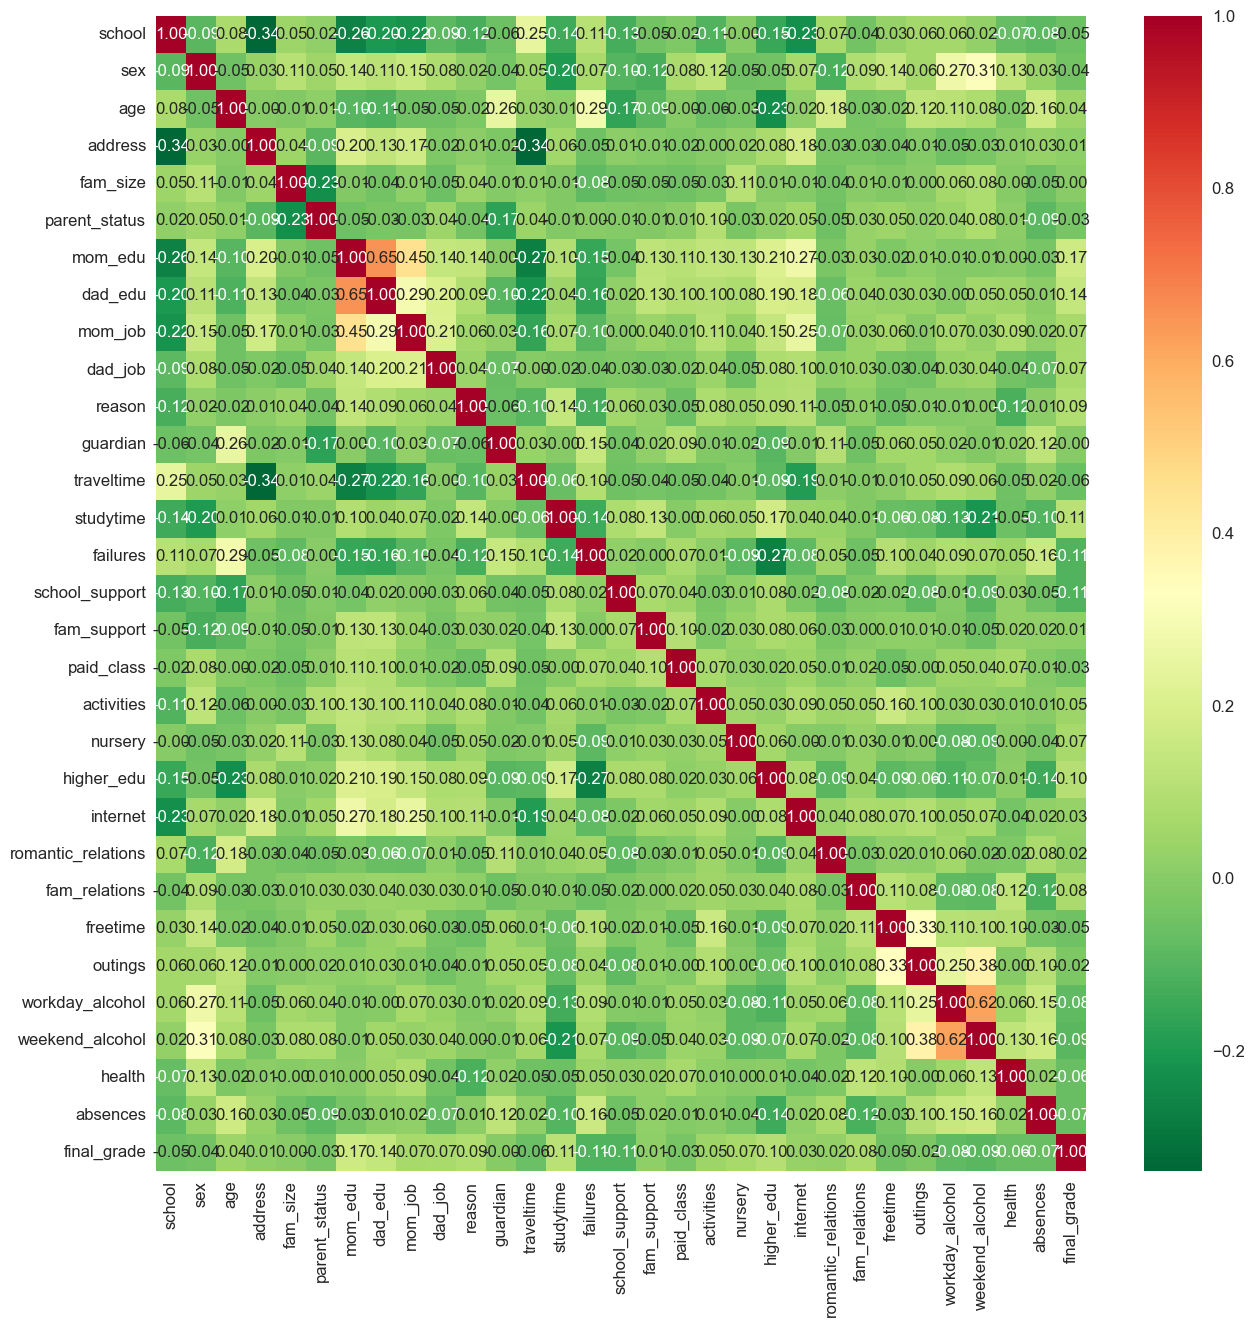

In [599]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df1.corr(), cmap = "RdYlGn_r", annot = True, fmt = '.2f')

In [600]:
# To find the most correlated features to class c, we replace all output labels 
#for class A with 1 and all other labels for classes A,B,D & E with 0.
df1 = df.copy()
df1['final_grade'] = df1['final_grade'].replace(['C'],1)
df1['final_grade'] = df1['final_grade'].replace(['A', 'B', 'D', 'E'],0)
df1['final_grade'] = df1['final_grade'].astype(float)
# df1.head()

corr_matrix = df1.corr()
corr_matrix["final_grade"].sort_values(ascending = False)

final_grade           1.000000
higher_edu            0.135150
mom_edu               0.122770
mom_job               0.117867
studytime             0.117668
dad_edu               0.104286
internet              0.098597
nursery               0.097521
address               0.084053
activities            0.070274
reason                0.048184
dad_job               0.030807
freetime              0.014964
fam_relations        -0.001074
fam_size             -0.003796
guardian             -0.006260
romantic_relations   -0.008954
parent_status        -0.009205
outings              -0.033211
fam_support          -0.033408
sex                  -0.053026
paid_class           -0.064293
absences             -0.070028
health               -0.072015
school_support       -0.073968
age                  -0.076271
traveltime           -0.086048
weekend_alcohol      -0.097352
school               -0.116034
workday_alcohol      -0.118555
failures             -0.145656
Name: final_grade, dtype: float64

<AxesSubplot:>

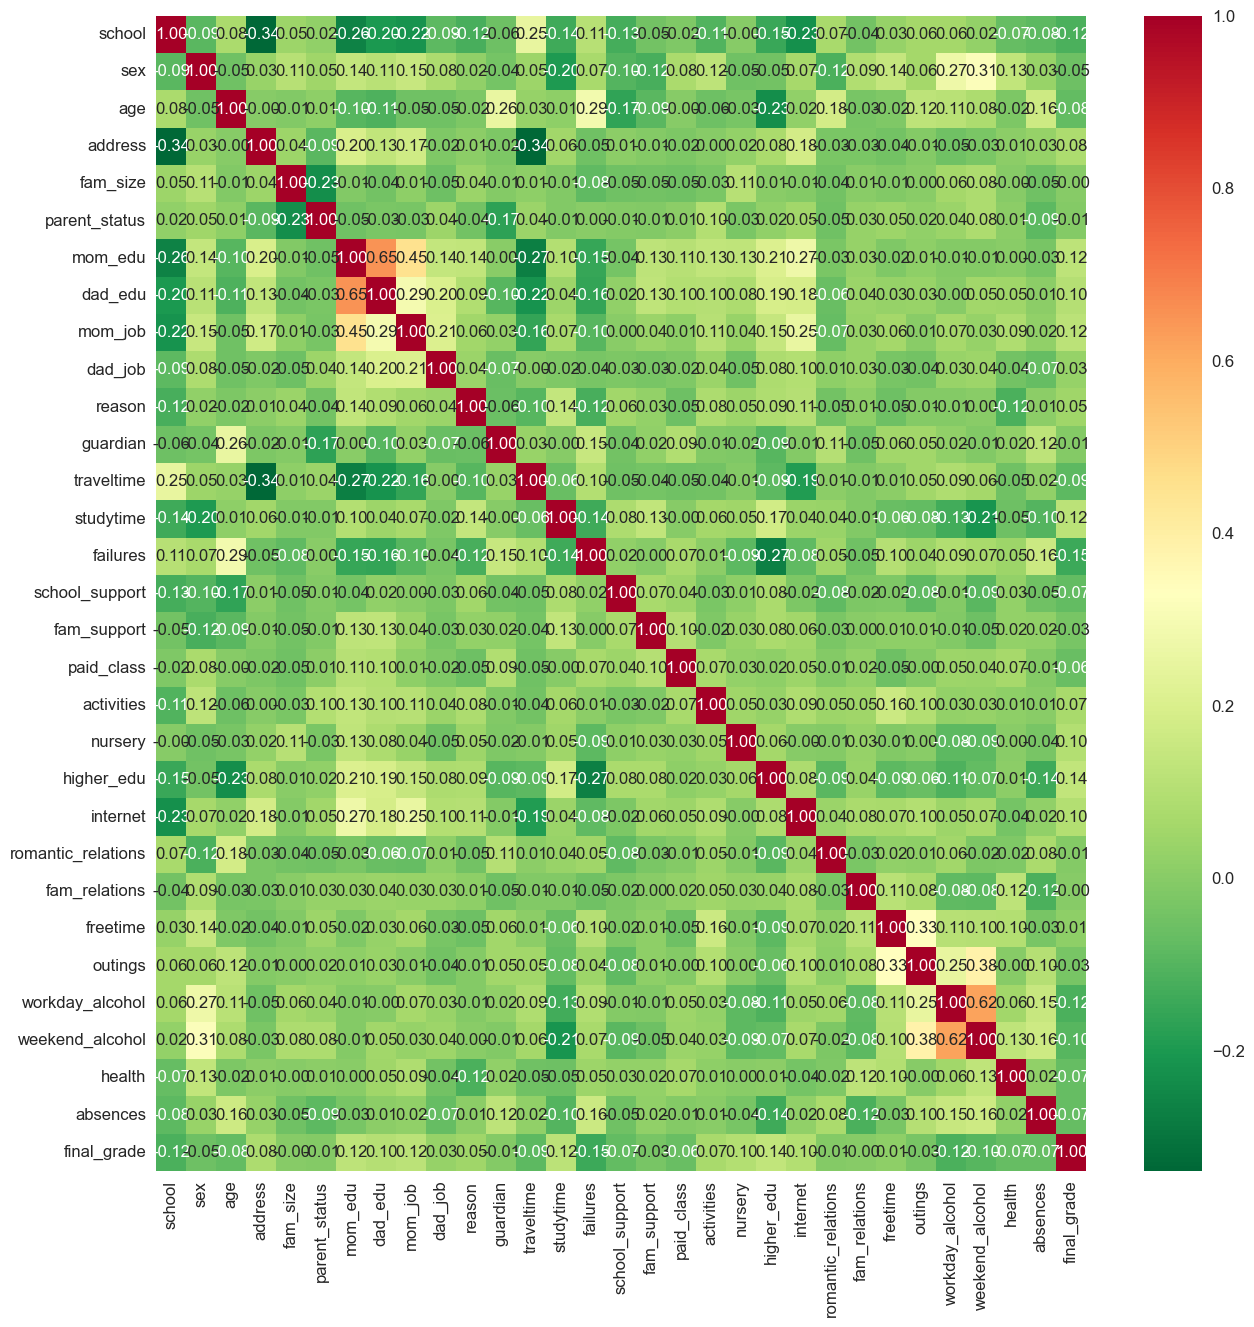

In [601]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df1.corr(), cmap = "RdYlGn_r", annot = True, fmt = '.2f')

In [602]:
# To find the most correlated features to class D, we replace all output labels 
#for class A with 1 and all other labels for classes A,B,C & E with 0.
df1 = df.copy()
df1['final_grade'] = df1['final_grade'].replace(['D'],1)
df1['final_grade'] = df1['final_grade'].replace(['A', 'C', 'B', 'E'],0)
df1['final_grade'] = df1['final_grade'].astype(float)
# df1.head()

corr_matrix = df1.corr()
corr_matrix["final_grade"].sort_values(ascending = False)

final_grade           1.000000
higher_edu            0.152606
address               0.110810
school_support        0.095187
paid_class            0.068015
mom_job               0.063002
fam_support           0.054057
dad_edu               0.049262
fam_relations         0.041886
activities            0.038777
internet              0.037047
mom_edu               0.028502
reason                0.025822
health                0.017724
studytime             0.007603
nursery               0.004298
dad_job               0.002092
fam_size             -0.008525
romantic_relations   -0.019643
parent_status        -0.026964
sex                  -0.034242
weekend_alcohol      -0.039017
outings              -0.044645
workday_alcohol      -0.057510
absences             -0.070543
freetime             -0.075141
traveltime           -0.076119
guardian             -0.080570
age                  -0.137878
failures             -0.178821
school               -0.204757
Name: final_grade, dtype: float64

<AxesSubplot:>

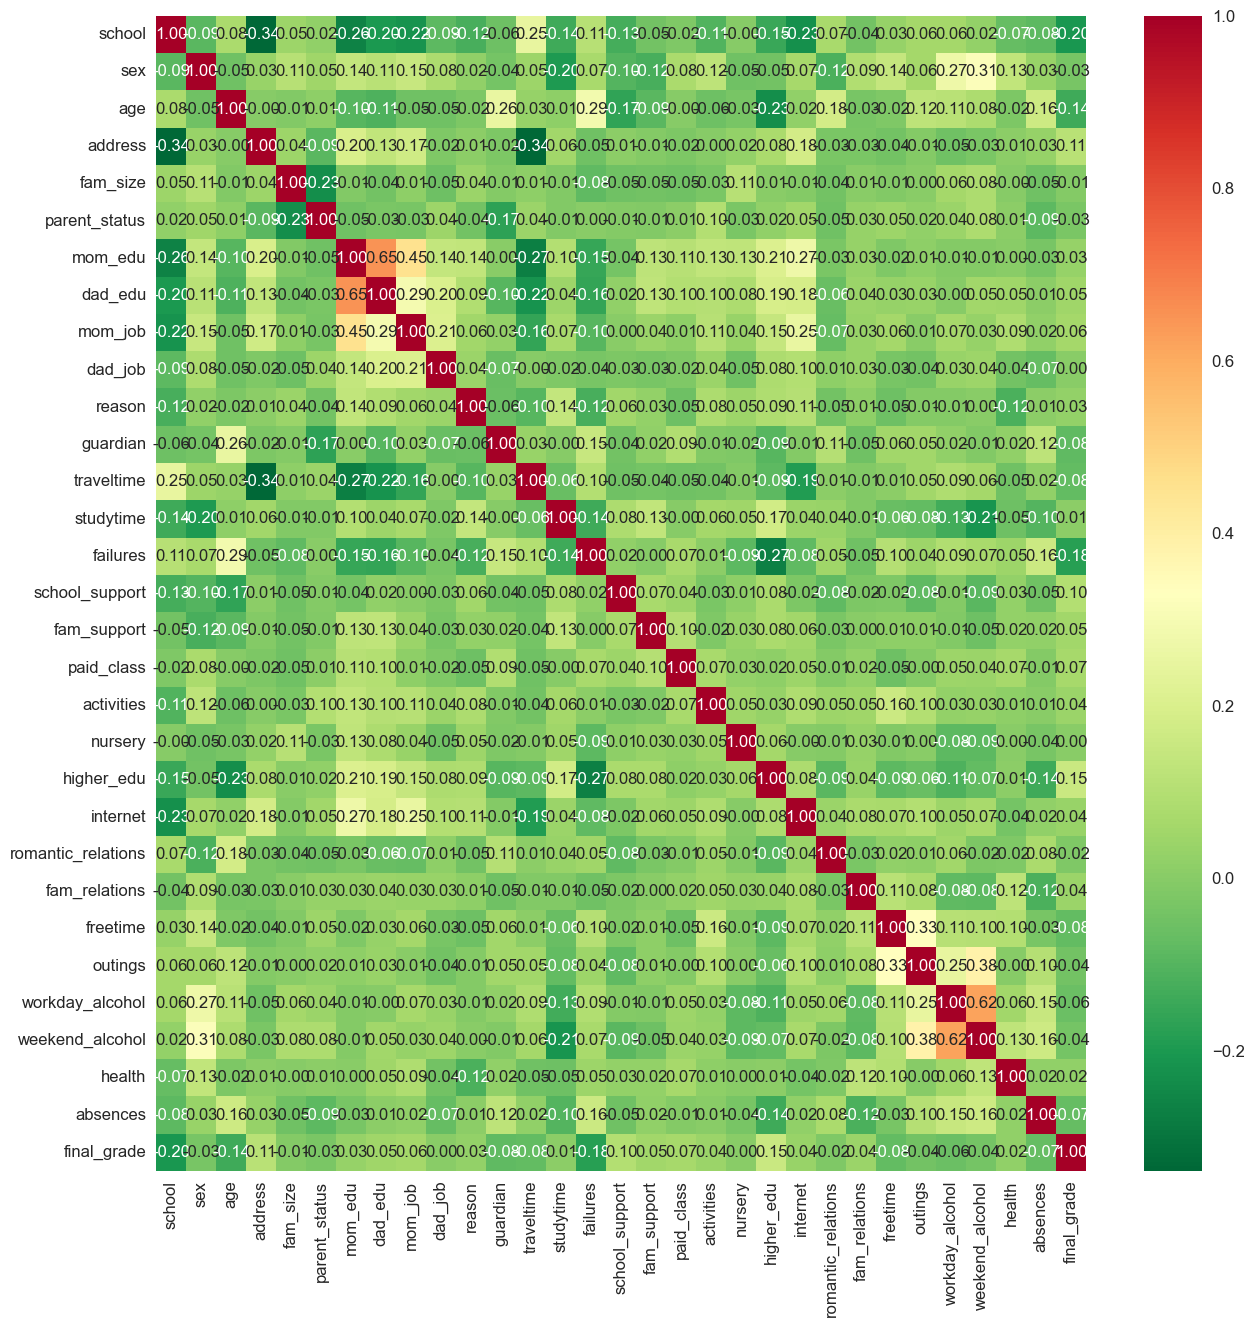

In [603]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df1.corr(), cmap = "RdYlGn_r", annot = True, fmt = '.2f')

In [604]:
# To find the most correlated features to class E, we replace all output labels 
#for class A with 1 and all other labels for classes A,B,C,D with 0.
df1 = df.copy()
df1['final_grade'] = df1['final_grade'].replace(['E'],1)
df1['final_grade'] = df1['final_grade'].replace(['A', 'C', 'D', 'B'],0)
df1['final_grade'] = df1['final_grade'].astype(float)
df1.head()

corr_matrix = df1.corr()
corr_matrix["final_grade"].sort_values(ascending = False)

final_grade           1.000000
failures              0.356198
school                0.308174
workday_alcohol       0.193000
traveltime            0.186046
absences              0.184628
weekend_alcohol       0.167043
age                   0.134620
sex                   0.113332
guardian              0.102782
freetime              0.099595
outings               0.090902
health                0.075100
school_support        0.041951
parent_status         0.037915
romantic_relations    0.037032
paid_class            0.021629
fam_size              0.005744
fam_support          -0.025582
fam_relations        -0.077661
dad_job              -0.085068
nursery              -0.088862
activities           -0.100407
reason               -0.134786
internet             -0.138026
address              -0.190835
mom_job              -0.197509
studytime            -0.200305
dad_edu              -0.202977
mom_edu              -0.249778
higher_edu           -0.318886
Name: final_grade, dtype: float64

<AxesSubplot:>

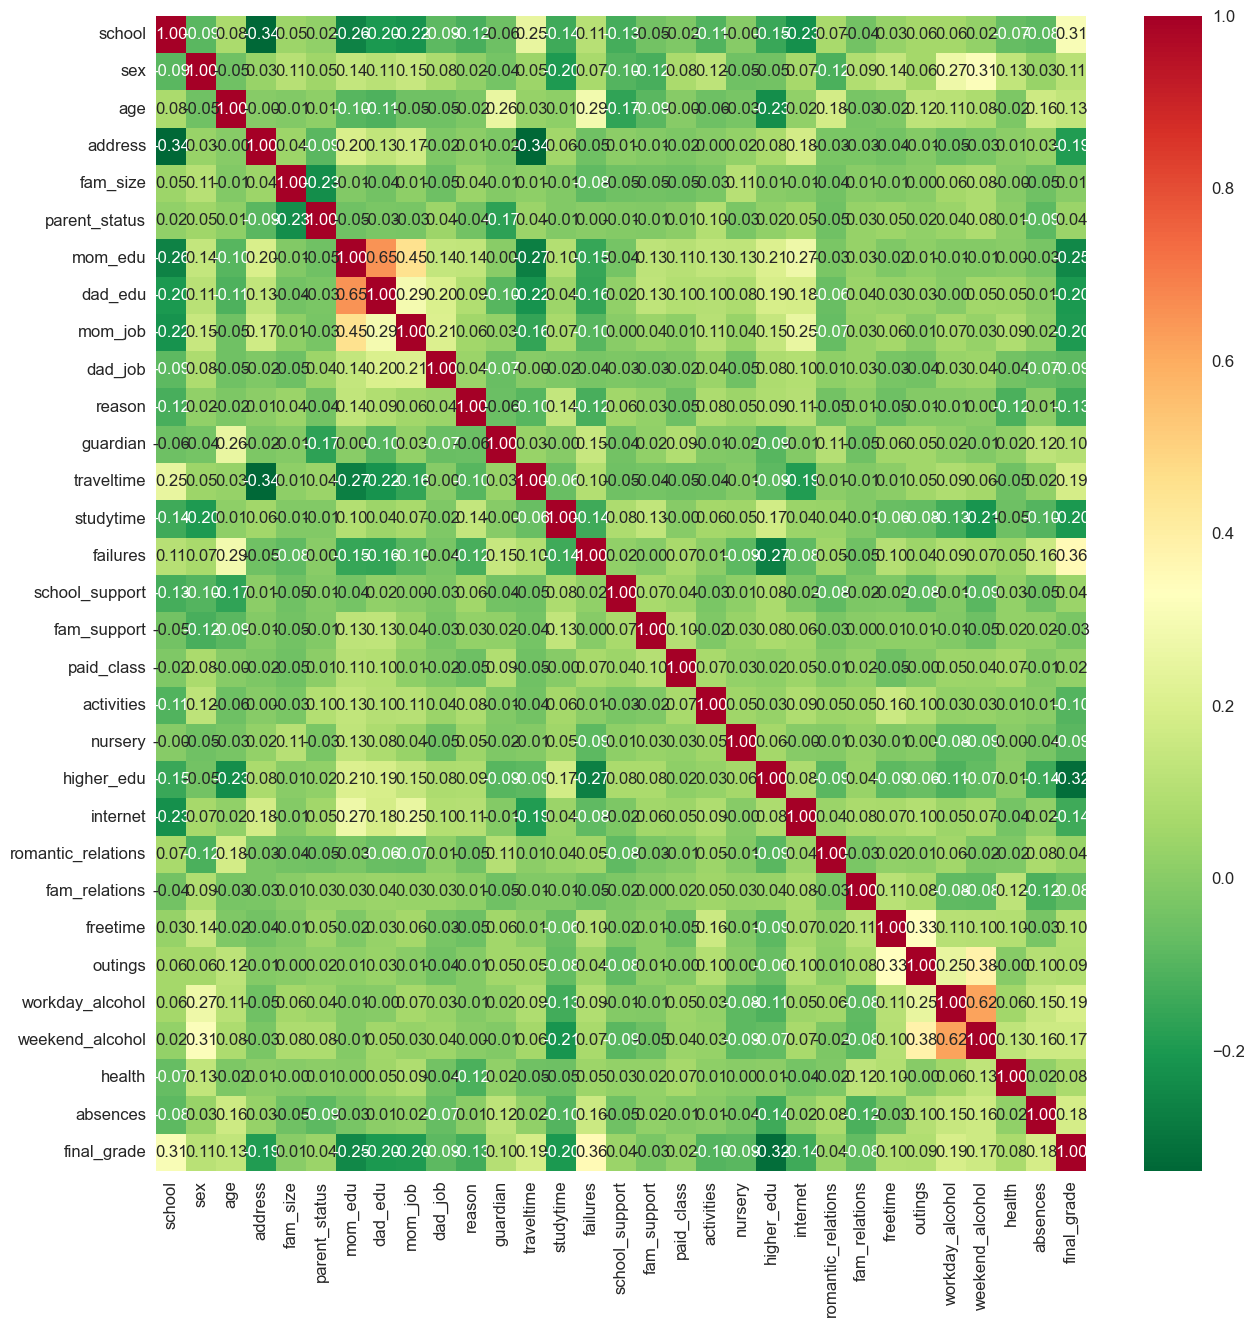

In [605]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df1.corr(), cmap = "RdYlGn_r", annot = True, fmt = '.2f')

In [606]:
#Creating the table with top 2 correlating features
df_2 = df[['studytime','mom_edu','dad_edu','higher_edu','address','failures','school']]
df_2.head()

studytime  mom_edu  dad_edu  higher_edu  address  failures  school
1          2        1        1         1.0      1.0         0     0.0
2          2        1        1         1.0      1.0         0     0.0
3          3        4        2         1.0      1.0         0     0.0
4          2        3        3         1.0      1.0         0     0.0
5          2        4        3         1.0      1.0         0     0.0

In [607]:
#Creating the table with top 5 correlating features
df_5 = df[['studytime','mom_edu','dad_edu','age','reason','higher_edu','reason','mom_job','school_support','address','failures','paid_class','workday_alcohol','traveltime','absences']]
df_5.head()

studytime  mom_edu  dad_edu  age  reason  higher_edu  reason  mom_job  \
1          2        1        1   17     0.0         1.0     0.0      0.0   
2          2        1        1   15     2.0         1.0     2.0      0.0   
3          3        4        2   15     1.0         1.0     1.0      1.0   
4          2        3        3   16     1.0         1.0     1.0      2.0   
5          2        4        3   16     3.0         1.0     3.0      3.0   

   school_support  address  failures  paid_class  workday_alcohol  traveltime  \
1             0.0      1.0         0         0.0                1           1   
2             1.0      1.0         0         0.0                2           1   
3             0.0      1.0         0         0.0                1           1   
4             0.0      1.0         0         0.0                1           1   
5             0.0      1.0         0         0.0                1           1   

   absences  
1         2  
2         6  
3         0  
4         0  
5         6

In [608]:
#Creating the table with top 10 correlating features
df_10 = df[['studytime','mom_edu','dad_edu','age','sex','guardian','reason','higher_edu','reason','mom_job','dad_job','parent_status','internet','nursery','school','school_support','failures','address','paid_class','workday_alcohol','weekend_alcohol','traveltime','absences']]
df_10.head()

studytime  mom_edu  dad_edu  age  sex  guardian  reason  higher_edu  \
1          2        1        1   17  0.0       0.0     0.0         1.0   
2          2        1        1   15  0.0       1.0     2.0         1.0   
3          3        4        2   15  0.0       1.0     1.0         1.0   
4          2        3        3   16  0.0       0.0     1.0         1.0   
5          2        4        3   16  1.0       1.0     3.0         1.0   

   reason  mom_job  ...  nursery  school  school_support  failures  address  \
1     0.0      0.0  ...      0.0     0.0             0.0         0      1.0   
2     2.0      0.0  ...      1.0     0.0             1.0         0      1.0   
3     1.0      1.0  ...      1.0     0.0             0.0         0      1.0   
4     1.0      2.0  ...      1.0     0.0             0.0         0      1.0   
5     3.0      3.0  ...      1.0     0.0             0.0         0      1.0   

   paid_class  workday_alcohol  weekend_alcohol  traveltime  absences  
1         0.0                1                1           1         2  
2         0.0                2                3           1         6  
3         0.0                1                1           1         0  
4         0.0                1                2           1         0  
5         0.0                1                2           1         6  

[5 rows x 23 columns]

## Prepare Data for Classifier
We used ordinal encoder for binary values and one hot encoder for nominal values. 
Standard scalar was also used to normalize the numerical variables. 
We then encoded the target class and separated the features from the target column for all the top features. 

In [609]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

"""A function that applies transformer pipeline"""

# Use transformer pipline to apply normalization and encode the categorical variables
def transformer(df,numerical_columns, nominal_columns, binary_ordinal_columns):
    transformers = [('numerical', StandardScaler(), numerical_columns), #standardScalar() is used to normalize all the numerical features in the dataframe 
                  ('nominal', OneHotEncoder(), nominal_columns),    #OneHotEncoder() allows the non-binary/ feature that do not follow an order to be encoded
                  ('binary_ordinal', OrdinalEncoder(), binary_ordinal_columns)]    #OrdinalEncoder() is used to encode the binar/ordinal features
    transformer_pipeline = ColumnTransformer(transformers, remainder='passthrough')
    df = pd.DataFrame(transformer_pipeline.fit_transform(df))
    return df
#We specifically don’t apply the OrdinalEncoder() to encode such methods because the ordinal encoder may force the model to assume an ordering between the values of this category, potentially resulting in poor performance.  


In [610]:

# 1. Prepare df for training - All features

df = data4 
#reference: https://www.kaggle.com/code/scratchpad/notebooke88af56e04/edit


#represent variables that are ordinal or binary - better suited to OrdinalEncoder()
binary_ordinal_columns = ['school', 'sex', 'address', 'fam_size', 'parent_status', 'school_support', 'fam_support',
       'paid_class', 'activities', 'nursery', 'higher_edu', 'internet', 'romantic_relations'] 

#represent variables that are nominal and not oridnal- better suited to OneHotEncoder()
nominal_columns = ['mom_job', 'dad_job', 'reason', 'guardian']

#represent numerical varibles (with mean and variance) - Normalize using StandardScalar()
numerical_columns = ['age','absences']

# Use transformer pipline to apply normalization and encode the categorical variables
new_df = transformer(df,numerical_columns, nominal_columns, binary_ordinal_columns)


#encode target class
le = LabelEncoder()
new_df[47] = le.fit_transform(new_df[47]) #final grade column 


#seperate features from target column
new_X = new_df.drop(columns=[47])
new_Y = new_df[47]

In [611]:
from sklearn.model_selection import train_test_split

# create a test - train split
X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size=0.25)

In [612]:
# 2. Prepare df2 - dataset with top 2 correlated features
df2 = data4[['studytime','mom_edu','dad_edu','higher_edu','address','failures','school']]

binary_ordinal_columns = ['school', 'address', 'higher_edu'] 

nominal_columns = []

numerical_columns = []

# Use transformer pipline to apply normalization and encode the categorical variables
new_df = transformer(df,numerical_columns, nominal_columns, binary_ordinal_columns)


#encode target class
le = LabelEncoder()
new_df[34] = le.fit_transform(new_df[34]) #final grade column 


#seperate features from target column
X_df2 = new_df.drop(columns=[34])
Y_df2 = new_df[34]

In [613]:
# create a test - train split for df2
df2_X_train, df2_X_test, df2_Y_train, df2_Y_test = train_test_split(X_df2, Y_df2, test_size=0.25)

In [614]:
# 3. Prepare df5 - data set with top 5 correlated features
df5 = data4[['studytime','mom_edu','dad_edu','age','reason','higher_edu','mom_job','school_support',
             'address','failures','paid_class','workday_alcohol','traveltime','absences']]

binary_ordinal_columns = ['address', 'school_support', 'paid_class', 'higher_edu'] 

nominal_columns = ['mom_job', 'reason',]

numerical_columns = ['age','absences']

# Use transformer pipline to apply normalization and encode the categorical variables
new_df = transformer(df,numerical_columns, nominal_columns, binary_ordinal_columns)

#encode target class
le = LabelEncoder()
new_df[41] = le.fit_transform(new_df[41]) #final grade column 


#seperate features from target column
X_df5 = new_df.drop(columns=[41])
Y_df5 = new_df[41]

In [615]:
# create a test - train split for df5
df5_X_train, df5_X_test, df5_Y_train, df5_Y_test = train_test_split(X_df5, Y_df5, test_size=0.25)

In [616]:
# 4. Use df 10 dataframe with 10 correlated features
df10 = data4 [['studytime','mom_edu','dad_edu','age','sex','guardian','reason','higher_edu','mom_job',
               'dad_job','parent_status','internet','nursery','school','school_support','failures','address','paid_class','workday_alcohol','weekend_alcohol','traveltime','absences']]


binary_ordinal_columns = ['school', 'sex', 'address', 'parent_status', 'school_support',
       'paid_class', 'nursery', 'higher_edu', 'internet'] 

nominal_columns = ['mom_job', 'dad_job', 'reason', 'guardian']

numerical_columns = ['age','absences']

new_df = transformer(df,numerical_columns, nominal_columns, binary_ordinal_columns)

le = LabelEncoder()
new_df[47] = le.fit_transform(new_df[47])  

#seperate features from target column
X_df10 = new_df.drop(columns=[47])
Y_df10 = new_df[47]

In [617]:
# create a test - train split for df10
df10_X_train, df10_X_test, df10_Y_train, df10_Y_test = train_test_split(X_df10, Y_df10, test_size=0.25)

## Train and Test the Classifier
We created an array of classifiers: Decision Tree, KNearestNeighbours, Random Forest Classifier, and trained the data on these models accordingly.

In [618]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

#Create an array of classifiers: Decision Tree, KNearestNeighbours, Random Forest Classifier
models = []

modelA = tree.DecisionTreeClassifier()
models.append(modelA)
modelB = RandomForestClassifier()
models.append(modelB)
modelC = KNeighborsClassifier()
models.append(modelC)

In [619]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import yellowbrick.classifier
from yellowbrick.classifier import ROCAUC

#train and test dataframe on the different models


def train_test_models(X_train, Y_train, X_test, Y_test):

    accuracies = []
    for model in models:

        #train model on data
        model.fit(X_train, Y_train)

        #find accuracy score
        y_pred = model.predict(X_test)
        acc = accuracy_score(Y_test, y_pred)
        print("Accuracy of %s is %s" % (model, acc))

        accuracies.append(acc)
#Macro Average computes the metric for each class and then takes the average.
#Micro averaging gives equal weight to each sample. Thus, all these values would be the same as the Accuracy score. 

        precision = precision_score(Y_test, y_pred, average='micro')
        print(f"Micro Average Precision Score of the classifier %s is %s" %
              (model, precision))

        precision = precision_score(Y_test, y_pred, average='macro')
        print(f"Macro Average Precision Score of the classifier %s is %s" %
              (model, precision))

        recall = recall_score(Y_test, y_pred, average='micro')
        print(f"Micro Average Recall Score of the classifier %s is %s" %
              (model, recall))

        recall = recall_score(Y_test, y_pred, average='macro')
        print(f"Macro Average Recall Score of the classifier %s is %s" %
              (model, recall))

        fscore = f1_score(Y_test, y_pred, average='micro')
        print(f"Micro Average F1 Score of the classifier %s is %s" %
              (model, fscore))

        fscore = f1_score(Y_test, y_pred, average='macro')
        print(f"Macro Average F1 Score of the classifier %s is %s" %
              (model, fscore))

        #find confusion matrix
        cm = confusion_matrix(Y_test, y_pred)
        print("Confusion Matrix of %s is \n %s" % (model, cm))
        print('True positive = ', cm[0][0])
        print('False positive = ', cm[0][1])
        print('False negative = ', cm[1][0])
        print('True negative = ', cm[1][1])

        sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
        print('Sensitivity Score of the classifier is: ', sensitivity)

        specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
        print('Specificity Score of the classifier is: ', specificity)

        print('\n')

    return accuracies  # a list of every models accuracy on the current dataset

##### Generating Evaluation Metrics (Accuracy, Precision, Recall, F1 Scores) and Confusion Matrices

RESULTS FOR DF -- THE ENTIRE DATASET 

Accuracy of DecisionTreeClassifier() is 1.0
Micro Average Precision Score of the classifier DecisionTreeClassifier() is 1.0
Macro Average Precision Score of the classifier DecisionTreeClassifier() is 1.0
Micro Average Recall Score of the classifier DecisionTreeClassifier() is 1.0
Macro Average Recall Score of the classifier DecisionTreeClassifier() is 1.0
Micro Average F1 Score of the classifier DecisionTreeClassifier() is 1.0
Macro Average F1 Score of the classifier DecisionTreeClassifier() is 1.0
Confusion Matrix of DecisionTreeClassifier() is 
 [[ 4  0  0  0  0]
 [ 0 12  0  0  0]
 [ 0  0 18  0  0]
 [ 0  0  0 43  0]
 [ 0  0  0  0 76]]
True positive =  4
False positive =  0
False negative =  0
True negative =  12
Sensitivity Score of the classifier is:  1.0
Specificity Score of the classifier is:  1.0


Accuracy of RandomForestClassifier() is 0.9738562091503268
Micro Average Precision Score of the classifier RandomForestClassifier() is 0.97385620

C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.2857142857142857, 0.9, 'X[46] <= 11.167\ngini = 0.71\nsamples = 458\nvalue = [15, 41, 88, 126, 188]'),
 Text(0.14285714285714285, 0.7, 'gini = 0.0\nsamples = 188\nvalue = [0, 0, 0, 0, 188]'),
 Text(0.42857142857142855, 0.7, 'X[46] <= 13.167\ngini = 0.65\nsamples = 270\nvalue = [15, 41, 88, 126, 0]'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 126\nvalue = [0, 0, 0, 126, 0]'),
 Text(0.5714285714285714, 0.5, 'X[46] <= 15.167\ngini = 0.535\nsamples = 144\nvalue = [15, 41, 88, 0, 0]'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 88\nvalue = [0, 0, 88, 0, 0]'),
 Text(0.7142857142857143, 0.3, 'X[46] <= 17.167\ngini = 0.392\nsamples = 56\nvalue = [15, 41, 0, 0, 0]'),
 Text(0.5714285714285714, 0.1, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0, 0, 0]'),
 Text(0.8571428571428571, 0.1, 'gini = 0.0\nsamples = 15\nvalue = [15, 0, 0, 0, 0]')]

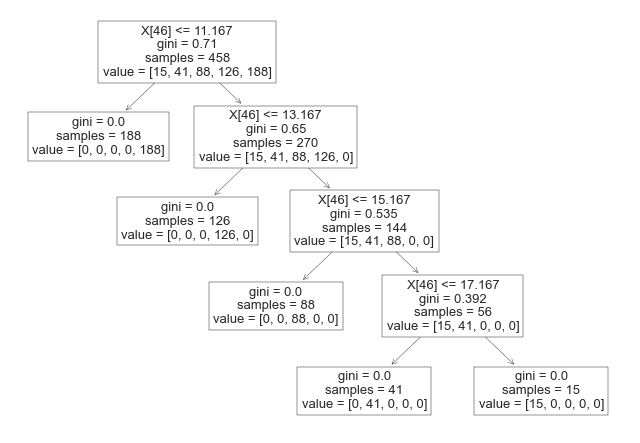

In [620]:
#train and model on all the dataframes

#1. df
print("RESULTS FOR DF -- THE ENTIRE DATASET \n")
df_acc = train_test_models(X_train, Y_train, X_test, Y_test)

tree.plot_tree(modelA) # plotting the decision tree
# A node’s gini attribute measures its impurity: a node is “pure” (gini=0) if all training instances it applies to belong to the same class.

RESULTS FOR DF2 -- TOP2 CORRELATED 

Accuracy of DecisionTreeClassifier() is 1.0
Micro Average Precision Score of the classifier DecisionTreeClassifier() is 1.0
Macro Average Precision Score of the classifier DecisionTreeClassifier() is 1.0
Micro Average Recall Score of the classifier DecisionTreeClassifier() is 1.0
Macro Average Recall Score of the classifier DecisionTreeClassifier() is 1.0
Micro Average F1 Score of the classifier DecisionTreeClassifier() is 1.0
Macro Average F1 Score of the classifier DecisionTreeClassifier() is 1.0
Confusion Matrix of DecisionTreeClassifier() is 
 [[ 2  0  0  0  0]
 [ 0 14  0  0  0]
 [ 0  0 26  0  0]
 [ 0  0  0 38  0]
 [ 0  0  0  0 73]]
True positive =  2
False positive =  0
False negative =  0
True negative =  14
Sensitivity Score of the classifier is:  1.0
Specificity Score of the classifier is:  1.0


Accuracy of RandomForestClassifier() is 0.9934640522875817
Micro Average Precision Score of the classifier RandomForestClassifier() is 0.9934640522

[Text(0.2857142857142857, 0.9, 'X[46] <= 11.167\ngini = 0.691\nsamples = 458\nvalue = [13, 38, 79, 124, 204]'),
 Text(0.14285714285714285, 0.7, 'gini = 0.0\nsamples = 204\nvalue = [0, 0, 0, 0, 204]'),
 Text(0.42857142857142855, 0.7, 'X[46] <= 13.167\ngini = 0.64\nsamples = 254\nvalue = [13, 38, 79, 124, 0]'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 124\nvalue = [0, 0, 0, 124, 0]'),
 Text(0.5714285714285714, 0.5, 'X[46] <= 15.167\ngini = 0.535\nsamples = 130\nvalue = [13, 38, 79, 0, 0]'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 79\nvalue = [0, 0, 79, 0, 0]'),
 Text(0.7142857142857143, 0.3, 'X[46] <= 17.167\ngini = 0.38\nsamples = 51\nvalue = [13, 38, 0, 0, 0]'),
 Text(0.5714285714285714, 0.1, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0, 0, 0]'),
 Text(0.8571428571428571, 0.1, 'gini = 0.0\nsamples = 13\nvalue = [13, 0, 0, 0, 0]')]

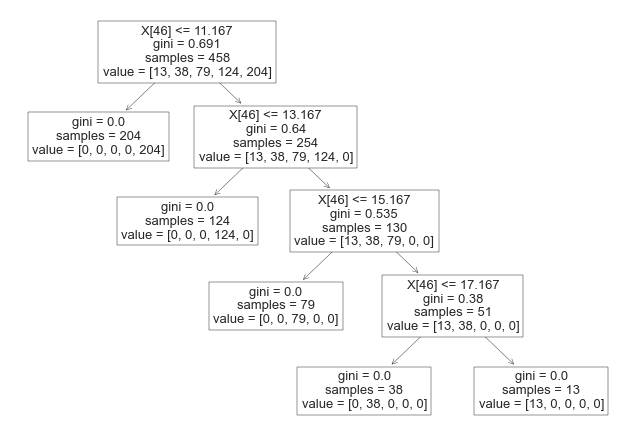

In [621]:
#2. df2
print("RESULTS FOR DF2 -- TOP2 CORRELATED \n")
df2_acc = train_test_models(df2_X_train, df2_Y_train, df2_X_test, df2_Y_test)
tree.plot_tree(modelA) # plotting the decision tree

#3. df5
print("RESULTS FOR DF5 -- TOP 5 CORRELATED \n")
df5_acc = train_test_models(df5_X_train, df5_Y_train, df5_X_test, df5_Y_test)
tree.plot_tree(modelA) # plotting the decision tree 

#4. df10
print("RESULTS FOR DF10 -- TOP 10 CORRELATED \n")
df10_acc = train_test_models(df10_X_train, df10_Y_train, df10_X_test, df10_Y_test)
tree.plot_tree(modelA) # plotting the decision tree

##### Generating Evaluation Metrics (Multi-class ROCAUC Curves)

In [622]:
# The Yellowbrick library was imported to plot ROC AUC Curves for multiclass data
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import yellowbrick.classifier
from yellowbrick.classifier import ROCAUC

#train and test dataframe on the different models


def train_test_models(X_train, Y_train, X_test, Y_test):

    accuracies = []
    for model in models:

        #train model on data
        model.fit(X_train, Y_train)

        visualizer = ROCAUC(model, classes=["A", "B", "C", "D", "E"])
        visualizer.fit(X_train,
                       Y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
        visualizer.show()  # Finalize and render the figure

    return accuracies  # a list of every models accuracy on the current dataset

RESULTS FOR DF -- THE ENTIRE DATASET 



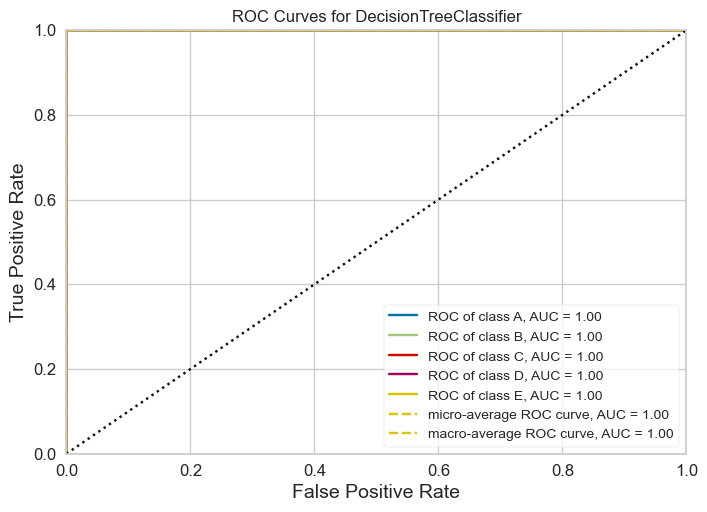

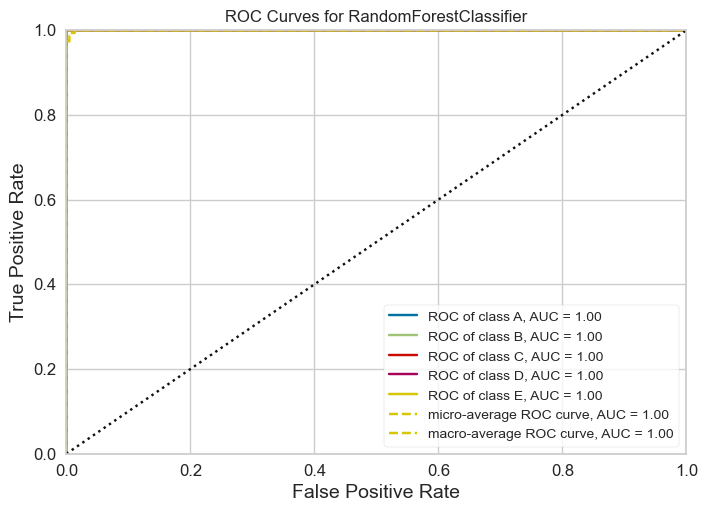

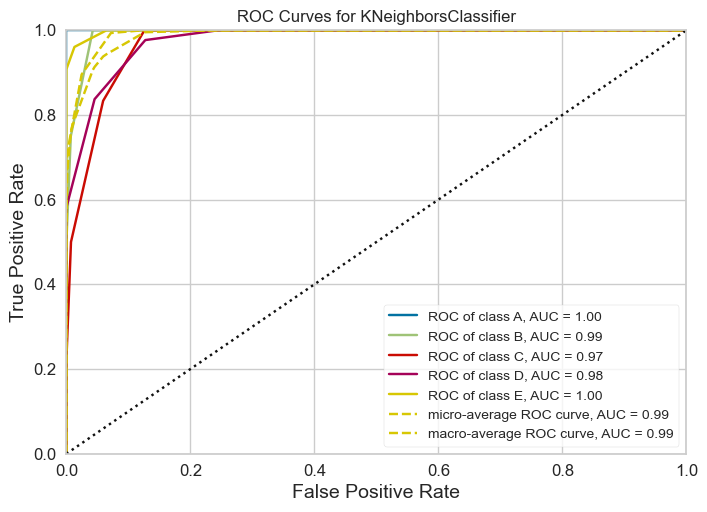

RESULTS FOR DF2 -- TOP2 CORRELATED 



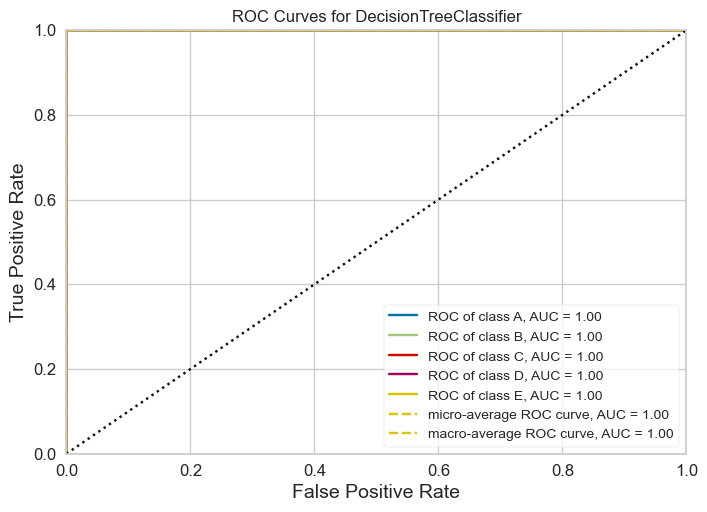

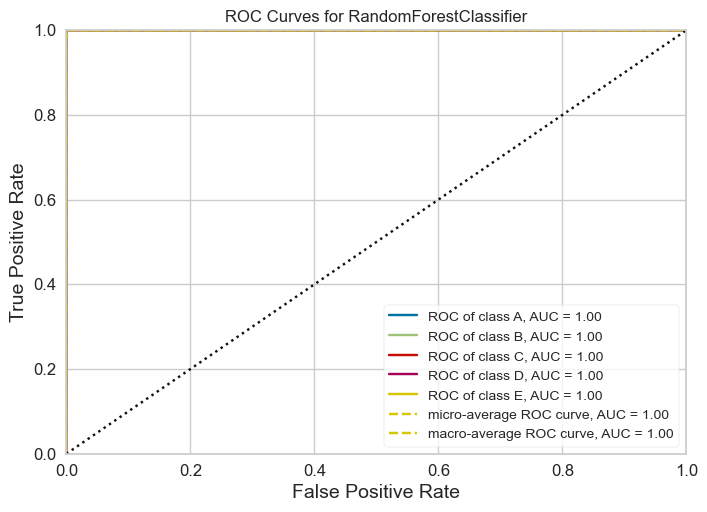

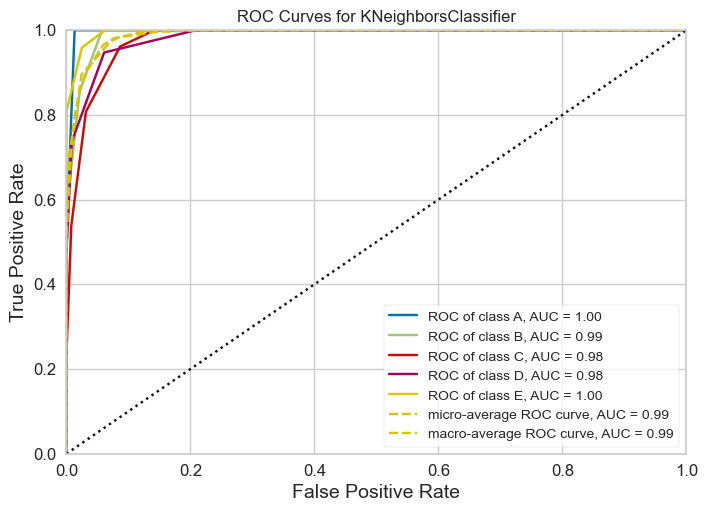

RESULTS FOR DF5 -- TOP 5 CORRELATED 



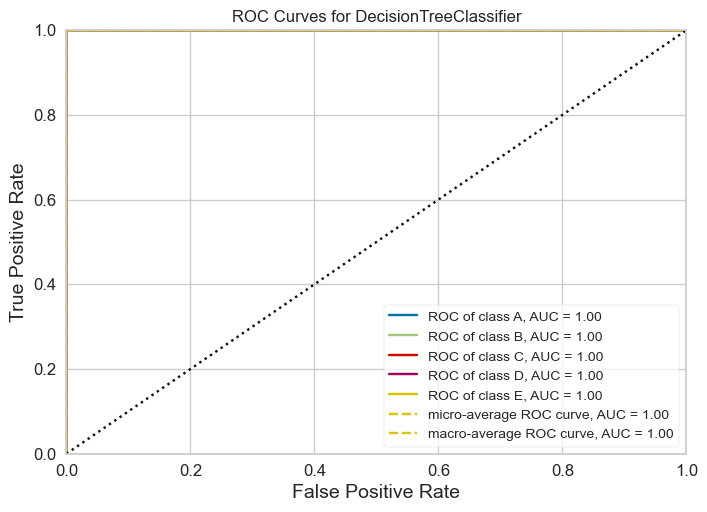

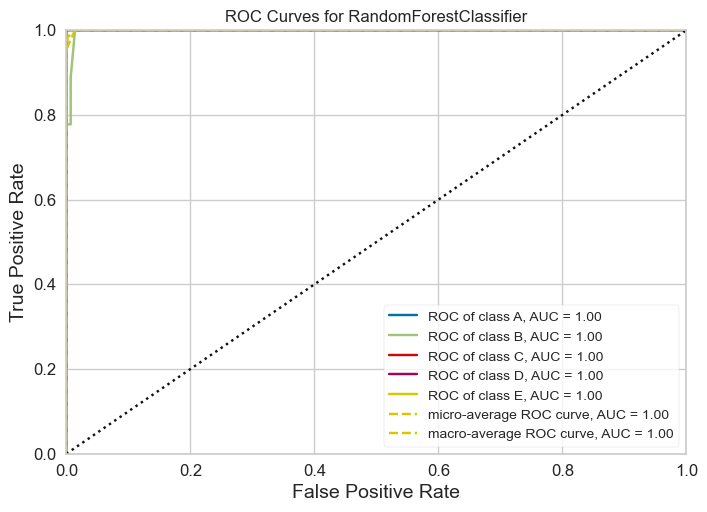

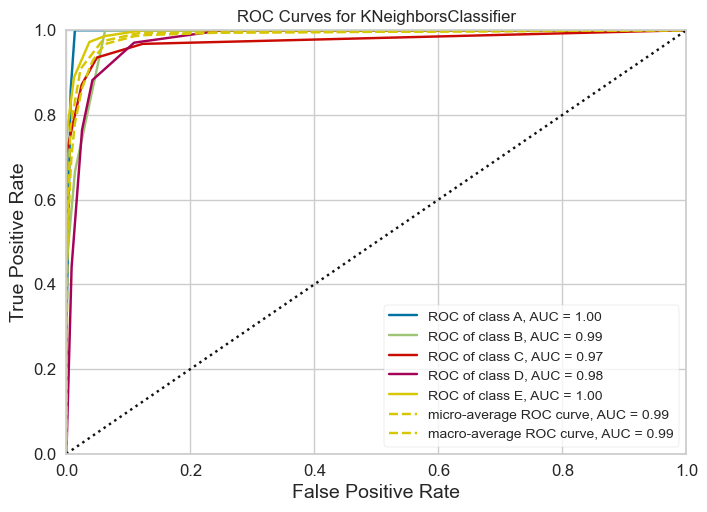

RESULTS FOR DF10 -- TOP 10 CORRELATED 



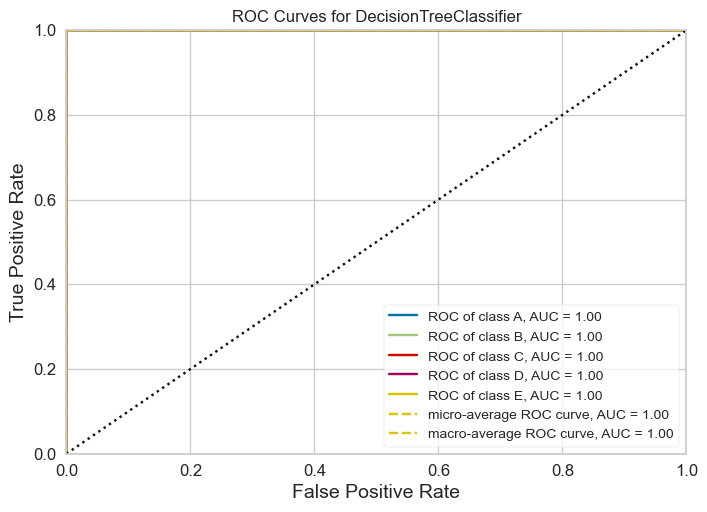

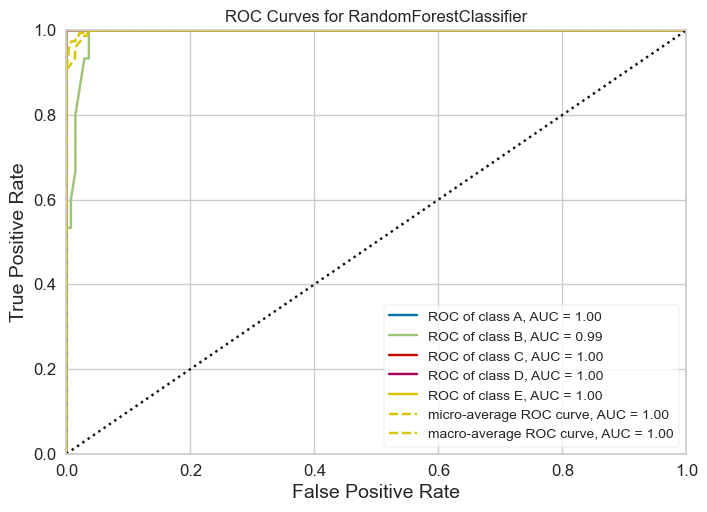

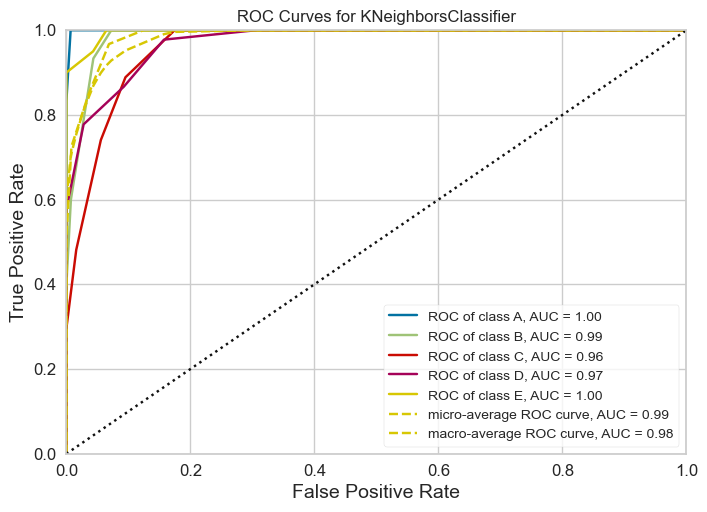

In [623]:
#train and model on all the dataframes

#1. df
print("RESULTS FOR DF -- THE ENTIRE DATASET \n")
df_acc = train_test_models(X_train, Y_train, X_test, Y_test)

#2. df2
print("RESULTS FOR DF2 -- TOP2 CORRELATED \n")
df2_acc = train_test_models(df2_X_train, df2_Y_train, df2_X_test, df2_Y_test)

#3. df5
print("RESULTS FOR DF5 -- TOP 5 CORRELATED \n")
df5_acc = train_test_models(df5_X_train, df5_Y_train, df5_X_test, df5_Y_test)

#4. df10
print("RESULTS FOR DF10 -- TOP 10 CORRELATED \n")
df10_acc = train_test_models(df10_X_train, df10_Y_train, df10_X_test, df10_Y_test)

##### Plotting an Overview/Comparison of Model Performance

In [624]:
# model1_accs = [df_acc[0], df2_acc[0], df5_acc[0], df10_acc[0]]
# model2_accs = [df_acc[1], df2_acc[1], df5_acc[1], df10_acc[1]]
# model3_accs = [df_acc[2], df2_acc[2], df5_acc[2], df10_acc[2]]

# plotdata = pd.DataFrame({
#     "Decision_Tree":model1_accs,
#     "Random_Forest":model2_accs,
#     "KNN":model3_accs
#     }, 
#     index=["df", "df2", "df5", "df10"]
# )
# plotdata.plot(kind="bar")
# plt.title("Test Accuracy of the Models on Different Datasets")
# plt.xlabel("Dataset")
# plt.ylabel("Test Accuracy")

In [625]:
columns = data4.select_dtypes(include=['object']).columns
ordinal_encoder = OrdinalEncoder()
data4[columns] = ordinal_encoder.fit_transform(data4[columns])
print(data4)

     school  sex  age  address  fam_size  parent_status  mom_edu  dad_edu  \
1       0.0  0.0   17      1.0       0.0            1.0        1        1   
2       0.0  0.0   15      1.0       1.0            1.0        1        1   
3       0.0  0.0   15      1.0       0.0            1.0        4        2   
4       0.0  0.0   16      1.0       0.0            1.0        3        3   
5       0.0  1.0   16      1.0       1.0            1.0        4        3   
..      ...  ...  ...      ...       ...            ...      ...      ...   
644     1.0  0.0   19      0.0       0.0            1.0        2        3   
645     1.0  0.0   18      1.0       1.0            1.0        3        1   
646     1.0  0.0   18      1.0       0.0            1.0        1        1   
647     1.0  1.0   17      1.0       1.0            1.0        3        1   
648     1.0  1.0   18      0.0       1.0            1.0        3        2   

     mom_job  dad_job  ...  outings  workday_alcohol  weekend_alcohol  heal

In [626]:
# Chi-sqared feature selection was used to check for the top correlated features
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

new_X = data4.drop(columns=['final_grade'])
new_Y = data4[['final_grade']]
# create a test - train split
X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size=0.25)


# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
print(X_train)
print(X_train.columns)

Feature 0: 38.842837
Feature 1: 4.811006
Feature 2: 0.988153
Feature 3: 8.196239
Feature 4: 0.681062
Feature 5: 0.189429
Feature 6: 19.898841
Feature 7: 11.201693
Feature 8: 19.771857
Feature 9: 1.390509
Feature 10: 16.229735
Feature 11: 1.303949
Feature 12: 7.400072
Feature 13: 10.373800
Feature 14: 86.542972
Feature 15: 9.110022
Feature 16: 1.731717
Feature 17: 5.590938
Feature 18: 3.594092
Feature 19: 1.431781
Feature 20: 5.461290
Feature 21: 3.628207
Feature 22: 2.741319
Feature 23: 2.163727
Feature 24: 3.148012
Feature 25: 2.440465
Feature 26: 9.796642
Feature 27: 12.468865
Feature 28: 3.921397
Feature 29: 74.309542
Feature 30: 213.650719
Feature 31: 223.085051
Feature 32: 217.709894
Feature 33: 217.880523
     school  sex  age  address  fam_size  parent_status  mom_edu  dad_edu  \
539     1.0  0.0   16      1.0       1.0            1.0        4        1   
332     0.0  0.0   18      1.0       0.0            1.0        2        2   
412     0.0  0.0   18      1.0       1.0        

Results for new df using Chi Classifier -- top3 correlated
     0  1  2
0    3  2  E
1    3  2  D
2    5  3  C
3    5  2  D
4    5  2  D
..  .. .. ..
606  5  3  E
607  1  2  B
608  5  2  E
609  2  1  E
610  5  1  E

[611 rows x 3 columns]


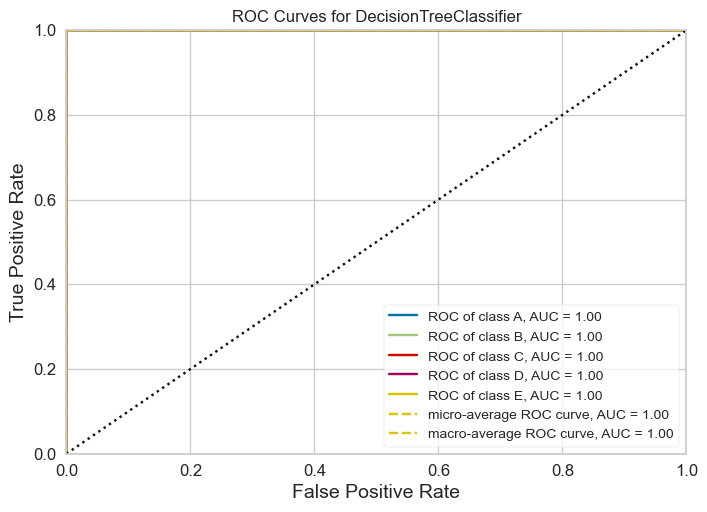

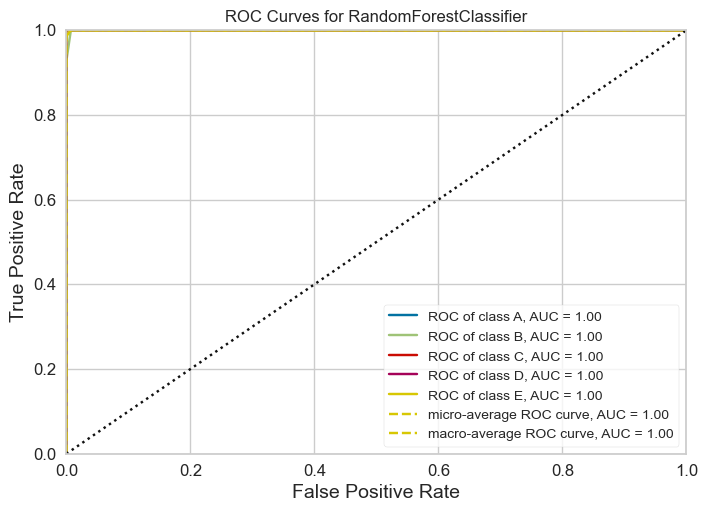

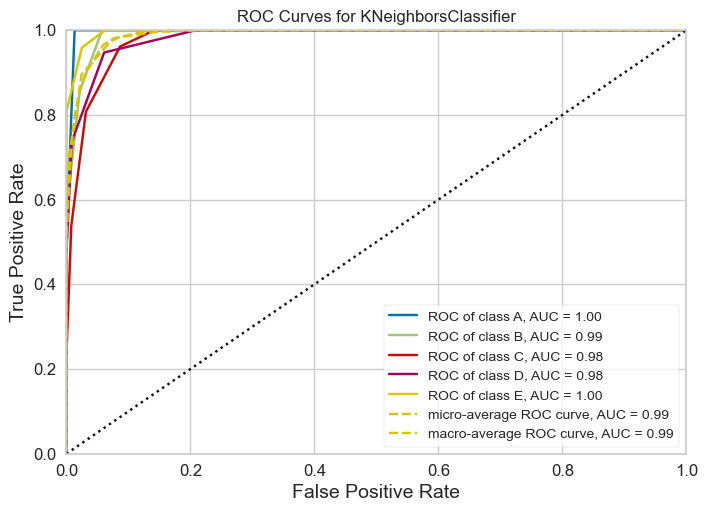

In [627]:
# CHI CLASSIFIER TOP FEATURES
print("Results for new df using Chi Classifier -- top3 correlated")
df2 = data4[['health','studytime','final_grade']]

binary_ordinal_columns = []

nominal_columns = []

numerical_columns = []

new_df = transformer(df2,numerical_columns, nominal_columns, binary_ordinal_columns)
print(new_df)

le = LabelEncoder()
new_df[0] = le.fit_transform(new_df[0])  

#seperate features from target column
X_df10 = new_df.drop(columns=[0])
Y_df10 = new_df[0]
X_df10, Y_df10

df2_acc = train_test_models(df2_X_train, df2_Y_train, df2_X_test, df2_Y_test)

## Evaluation using cross-validation

In [628]:
from yellowbrick.model_selection import ValidationCurve,LearningCurve, CVScores, FeatureImportances, RFECV  
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_predict

# creating a function to run all the models at once and calculate accuracy, precision, recall and F1 score
def cross_validation_eval(new_X,new_Y):
    for model in models:
        print("%s\n"%model)
        scores = cross_val_score(model, new_X, new_Y, cv=10) # using the stratified ten-fold cross-validation method
        acc = scores.mean()
        print("Accuracy of %s is %s"%(model,acc))
        precision = cross_val_score(model, new_X, new_Y, scoring='precision_macro', cv=10)
        print("Precision of %s is %s"%(model,precision.mean()))
        recall = cross_val_score(model, new_X, new_Y, scoring='recall_macro', cv=10)
        print("Recall of %s is %s"%(model,recall.mean()))
        f1 = cross_val_score(model, new_X, new_Y, scoring='f1_macro', cv=10)
        print("F1 score of %s is %s\n"%(model,f1.mean()))
        
        visualizer = CVScores(model, cv=10, scoring='f1_weighted', color='g')
        visualizer.fit(new_X, new_Y)        # Fit the data to the visualizer
        visualizer.show()           # Finalize and render the figure
        
        y_pred = cross_val_predict(model, new_X, new_Y, cv=10)
        cm = confusion_matrix(new_Y, y_pred)
        print("Confusion Matrix of %s is \n %s" % (model, cm))
        print('True positive = ', cm[0][0])
        print('False positive = ', cm[0][1])
        print('False negative = ', cm[1][0])
        print('True negative = ', cm[1][1])
        
        #Each of these subsets serves as a test set, while the remaining k-1 subsets serve as training sets

In [629]:
#1. Prepare df for training - All features

df = data4 
#reference: https://www.kaggle.com/code/scratchpad/notebooke88af56e04/edit


#represent variables that are ordinal or binary - better suited to OrdinalEncoder()
binary_ordinal_columns = ['school', 'sex', 'address', 'fam_size', 'parent_status', 'school_support', 'fam_support', 'paid_class', 'activities', 'nursery', 'higher_edu', 'internet', 'romantic_relations'] 

#represent variables that are nominal and not oridnal- better suited to OneHotEncoder()
nominal_columns = ['mom_job', 'dad_job', 'reason', 'guardian']

#represent numerical varibles (with mean and variance) - Normalize using StandardScalar()
numerical_columns = ['age','absences']

# Use transformer pipline to apply normalization and encode the categorical variables
new_df = transformer(df,numerical_columns, nominal_columns, binary_ordinal_columns)
# print(new_df)



#encode target class
le = LabelEncoder()
new_df[47] = le.fit_transform(new_df[47]) #final grade column 


#seperate features from target column
new_X = new_df.drop(columns=[47]) # data set with all the attributes except the target attribute
new_Y = new_df[47] # target attribute 

# Cross-validation optimizes the dataset so that there is enough training data rather than creating a new validation set and decreasing the size of the training set. 

DecisionTreeClassifier()

Accuracy of DecisionTreeClassifier() is 1.0
Precision of DecisionTreeClassifier() is 1.0
Recall of DecisionTreeClassifier() is 1.0
F1 score of DecisionTreeClassifier() is 1.0



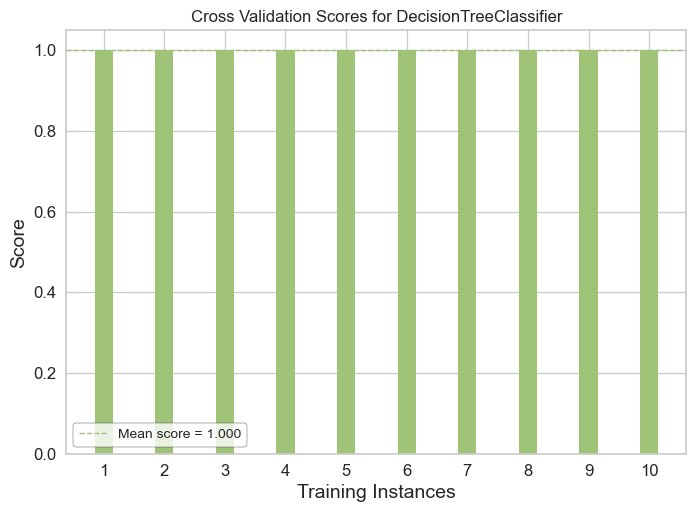

Confusion Matrix of DecisionTreeClassifier() is 
 [[ 19   0   0   0   0]
 [  0  53   0   0   0]
 [  0   0 106   0   0]
 [  0   0   0 169   0]
 [  0   0   0   0 264]]
True positive =  19
False positive =  0
False negative =  0
True negative =  53
RandomForestClassifier()

Accuracy of RandomForestClassifier() is 0.9918297197250132


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision of RandomForestClassifier() is 0.9576666666666667
Recall of RandomForestClassifier() is 0.9593333333333334
F1 score of RandomForestClassifier() is 0.9427359307359306



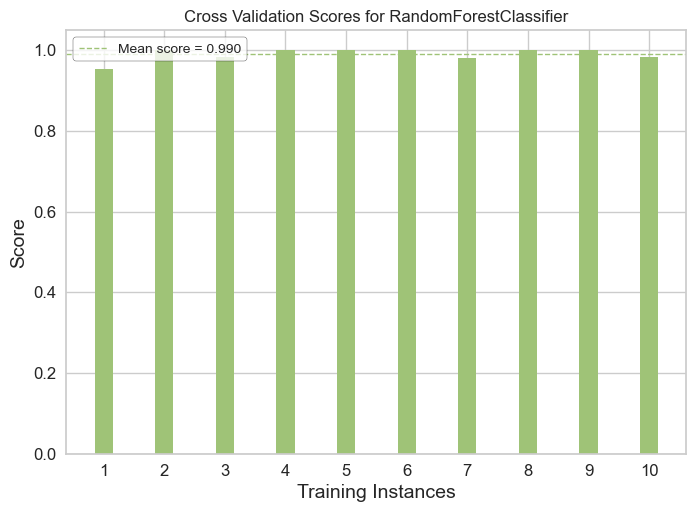

Confusion Matrix of RandomForestClassifier() is 
 [[ 17   2   0   0   0]
 [  0  49   4   0   0]
 [  0   0 106   0   0]
 [  0   0   0 169   0]
 [  0   0   0   0 264]]
True positive =  17
False positive =  2
False negative =  0
True negative =  49
KNeighborsClassifier()

Accuracy of KNeighborsClassifier() is 0.9083553675304072
Precision of KNeighborsClassifier() is 0.9215187708653281
Recall of KNeighborsClassifier() is 0.8910740359858007
F1 score of KNeighborsClassifier() is 0.8995264870152744



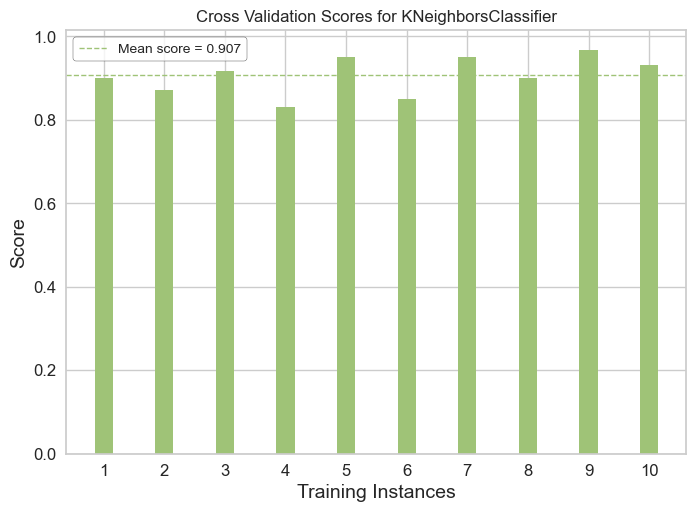

Confusion Matrix of KNeighborsClassifier() is 
 [[ 18   1   0   0   0]
 [  1  42  10   0   0]
 [  0   1  93  12   0]
 [  0   0   6 147  16]
 [  0   0   0   9 255]]
True positive =  18
False positive =  1
False negative =  1
True negative =  42


In [630]:
cross_validation_eval(new_X,new_Y)

# Lab 5. Bayesian Learning and Bayes Nets
In this lab, we looked into the various Bayes Net algorithms, namely Multinomial Naive Bayes, Gaussian Naive Bayes, Complement Naive Bayes, Bernoulli Naive Bayes and Categorical Naive Bayes.

### Naive Bayes

In [631]:
# from sklearn.naive_bayes import MultinomialNB
# MNBclf = MultinomialNB(alpha = 1.0, class_prior = None)
# model.fit(X, Y)

# print((MNBclf.predict(X[4:5])))

In [632]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB, CategoricalNB, GaussianNB
#Create an array of classifiers
models1 = []

modelA = MultinomialNB(alpha = 1.0)
models1.append(modelA)
modelB = ComplementNB(alpha = 1.0)
models1.append(modelB)
modelC = CategoricalNB(alpha = 1.0)
models1.append(modelC)
# modelD = GaussianNB()
# models1.append(modelD)

In [633]:
#train and test dataframe on the different models

def train_test_models1(X_train, Y_train, X_test, Y_test):

    accuracies = []
    for model in models1:

        #train model on data
        model.fit(X_train, Y_train)

        #find accuracy score
        y_pred = model.predict(X_test)
        acc = accuracy_score(Y_test, y_pred)
        print("Accuracy of %s is %s" % (model, acc))

        accuracies.append(acc)

        precision = precision_score(Y_test, y_pred, average='micro')
        print(f"Micro Average Precision Score of the classifier %s is %s" %
              (model, precision))

        precision = precision_score(Y_test, y_pred, average='macro')
        print(f"Macro Average Precision Score of the classifier %s is %s" %
              (model, precision))

        recall = recall_score(Y_test, y_pred, average='micro')
        print(f"Micro Average Recall Score of the classifier %s is %s" %
              (model, recall))

        recall = recall_score(Y_test, y_pred, average='macro')
        print(f"Macro Average Recall Score of the classifier %s is %s" %
              (model, recall))

        fscore = f1_score(Y_test, y_pred, average='micro')
        print(f"Micro Average F1 Score of the classifier %s is %s" %
              (model, fscore))

        fscore = f1_score(Y_test, y_pred, average='macro')
        print(f"Macro Average F1 Score of the classifier %s is %s" %
              (model, fscore))

        #find confusion matrix
        cm = confusion_matrix(Y_test, y_pred)
        print("Confusion Matrix of %s is \n %s" % (model, cm))
        print('True positive = ', cm[0][0])
        print('False positive = ', cm[0][1])
        print('False negative = ', cm[1][0])
        print('True negative = ', cm[1][1])

        sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
        print('Sensitivity Score of the classifier is: ', sensitivity)

        specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
        print('Specificity Score of the classifier is: ', specificity)
        
        visualizer = ROCAUC(model, classes=["A", "B", "C", "D", "E"])
        visualizer.fit(X_train,
                       Y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
        visualizer.show()  # Finalize and render the figure

        print('\n')
        print('\n')


    return accuracies  # a list of every models accuracy on the current dataset

Accuracy of MultinomialNB() is 0.5555555555555556
Micro Average Precision Score of the classifier MultinomialNB() is 0.5555555555555556
Macro Average Precision Score of the classifier MultinomialNB() is 0.375015873015873
Micro Average Recall Score of the classifier MultinomialNB() is 0.5555555555555556
Macro Average Recall Score of the classifier MultinomialNB() is 0.3372399423966664
Micro Average F1 Score of the classifier MultinomialNB() is 0.5555555555555556
Macro Average F1 Score of the classifier MultinomialNB() is 0.3386507936507937
Confusion Matrix of MultinomialNB() is 
 [[ 0  1  3  2  0]
 [ 0  2  5  4  0]
 [ 0  1  4 16  3]
 [ 0  0  6 22 15]
 [ 0  0  0 12 57]]
True positive =  0
False positive =  1
False negative =  0
True negative =  2
Sensitivity Score of the classifier is:  0.0
Specificity Score of the classifier is:  1.0


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


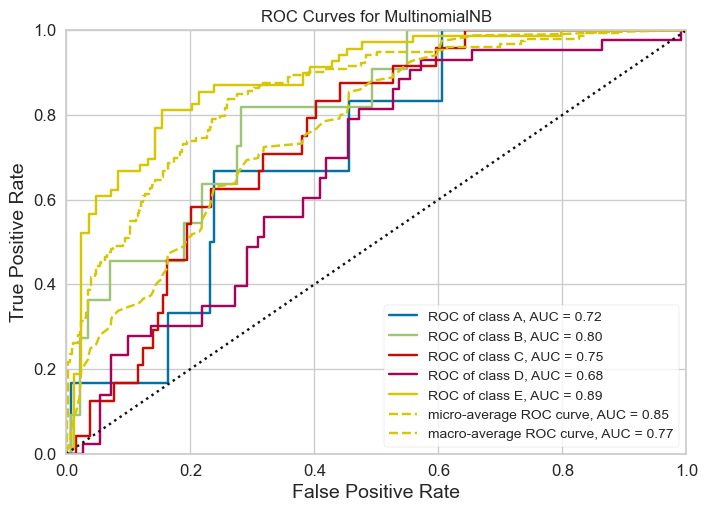





Accuracy of ComplementNB() is 0.5228758169934641
Micro Average Precision Score of the classifier ComplementNB() is 0.5228758169934641
Macro Average Precision Score of the classifier ComplementNB() is 0.31388888888888894
Micro Average Recall Score of the classifier ComplementNB() is 0.5228758169934641
Macro Average Recall Score of the classifier ComplementNB() is 0.326783252137145
Micro Average F1 Score of the classifier ComplementNB() is 0.5228758169934641
Macro Average F1 Score of the classifier ComplementNB() is 0.31793932230102445
Confusion Matrix of ComplementNB() is 
 [[ 0  2  4  0  0]
 [ 0  2  5  4  0]
 [ 0  6  7  9  2]
 [ 0  6  8 15 14]
 [ 0  3  0 10 56]]
True positive =  0
False positive =  2
False negative =  0
True negative =  2
Sensitivity Score of the classifier is:  0.0
Specificity Score of the classifier is:  1.0


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


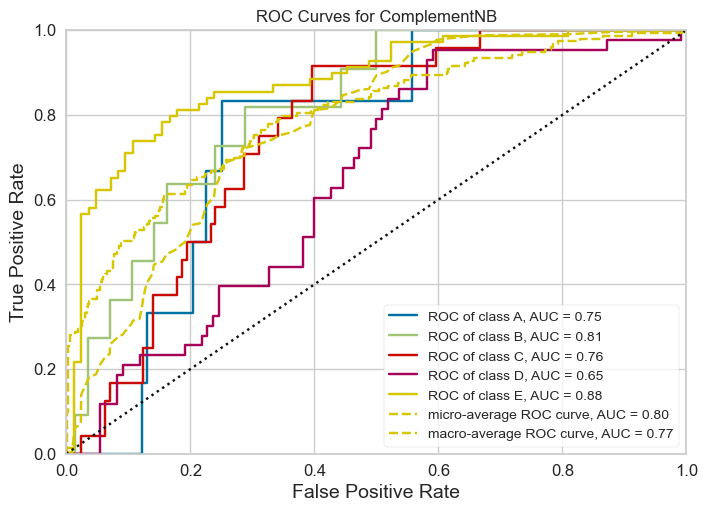





Accuracy of CategoricalNB() is 0.45751633986928103
Micro Average Precision Score of the classifier CategoricalNB() is 0.45751633986928103
Macro Average Precision Score of the classifier CategoricalNB() is 0.29459189371329547
Micro Average Recall Score of the classifier CategoricalNB() is 0.45751633986928103
Macro Average Recall Score of the classifier CategoricalNB() is 0.30939884180531296
Micro Average F1 Score of the classifier CategoricalNB() is 0.45751633986928103
Macro Average F1 Score of the classifier CategoricalNB() is 0.30147756426171435
Confusion Matrix of CategoricalNB() is 
 [[ 0  2  2  1  1]
 [ 0  3  3  4  1]
 [ 0  2  6 12  4]
 [ 0  3  7 16 17]
 [ 0  3  7 14 45]]
True positive =  0
False positive =  2
False negative =  0
True negative =  3
Sensitivity Score of the classifier is:  0.0
Specificity Score of the classifier is:  1.0


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


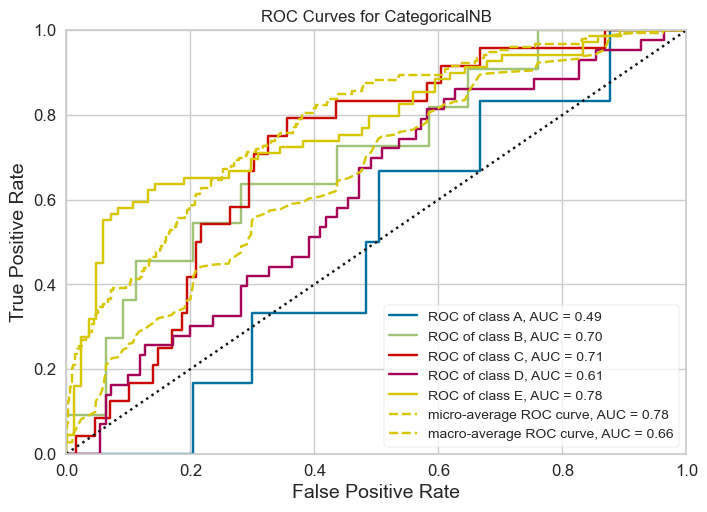

In [634]:
from sklearn.preprocessing import MinMaxScaler

df = data4

#represent variables that are ordinal or binary - better suited to OrdinalEncoder()
binary_ordinal_columns = ['school', 'sex', 'address', 'fam_size', 'parent_status', 'school_support', 'fam_support', 'paid_class', 'activities', 'nursery', 'higher_edu', 'internet', 'romantic_relations'] 

#represent variables that are nominal and not oridnal- better suited to OneHotEncoder()
nominal_columns = ['mom_job', 'dad_job', 'reason', 'guardian']

#represent numerical varibles (with mean and variance) - Normalize using StandardScalar()
numerical_columns = ['age','absences']

new_df = transformer(df,numerical_columns, nominal_columns, binary_ordinal_columns)

le = LabelEncoder()
new_df[47] = le.fit_transform(new_df[47])  

 

#seperate features from target column
X_d = new_df.drop(columns=[47])
Y_d = new_df[47]

 

X_train, X_test, Y_train, Y_test = train_test_split(X_d, Y_d, test_size=0.25)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

df_acc = train_test_models1(X_train, Y_train, X_test, Y_test)

Accuracy of MultinomialNB() is 0.5611353711790393
Micro Average Precision Score of the classifier MultinomialNB() is 0.5611353711790393
Macro Average Precision Score of the classifier MultinomialNB() is 0.6097394496720844
Micro Average Recall Score of the classifier MultinomialNB() is 0.5611353711790393
Macro Average Recall Score of the classifier MultinomialNB() is 0.387754846779237
Micro Average F1 Score of the classifier MultinomialNB() is 0.5611353711790393
Macro Average F1 Score of the classifier MultinomialNB() is 0.4041097921346816
Confusion Matrix of MultinomialNB() is 
 [[  1   2   2   6   2]
 [  0  11   6  18   7]
 [  0   5  20  36  21]
 [  0   2  11  72  41]
 [  0   4   3  35 153]]
True positive =  1
False positive =  2
False negative =  0
True negative =  11
Sensitivity Score of the classifier is:  0.3333333333333333
Specificity Score of the classifier is:  1.0


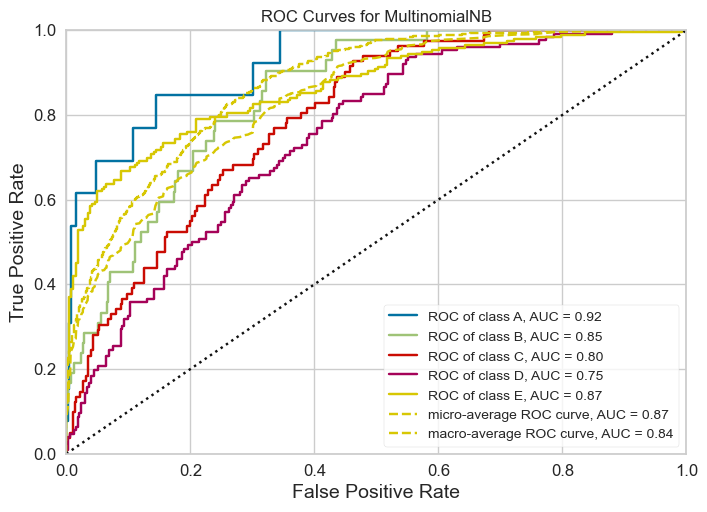





Accuracy of ComplementNB() is 0.5545851528384279
Micro Average Precision Score of the classifier ComplementNB() is 0.5545851528384279
Macro Average Precision Score of the classifier ComplementNB() is 0.3871295819868613
Micro Average Recall Score of the classifier ComplementNB() is 0.5545851528384279
Macro Average Recall Score of the classifier ComplementNB() is 0.40156228595252985
Micro Average F1 Score of the classifier ComplementNB() is 0.5545851528384279
Macro Average F1 Score of the classifier ComplementNB() is 0.39346764052405325
Confusion Matrix of ComplementNB() is 
 [[  0   3   4   4   2]
 [  0  17  12   7   6]
 [  0   7  33  24  18]
 [  0  13  20  55  38]
 [  0   9   9  28 149]]
True positive =  0
False positive =  3
False negative =  0
True negative =  17
Sensitivity Score of the classifier is:  0.0
Specificity Score of the classifier is:  1.0


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


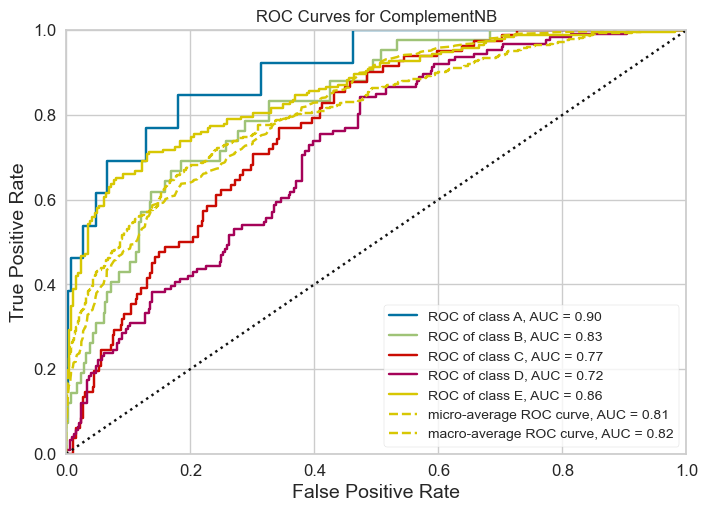





Accuracy of CategoricalNB() is 0.5349344978165939
Micro Average Precision Score of the classifier CategoricalNB() is 0.5349344978165939
Macro Average Precision Score of the classifier CategoricalNB() is 0.48153026438941204
Micro Average Recall Score of the classifier CategoricalNB() is 0.5349344978165939
Macro Average Recall Score of the classifier CategoricalNB() is 0.4088293278537181
Micro Average F1 Score of the classifier CategoricalNB() is 0.5349344978165939
Macro Average F1 Score of the classifier CategoricalNB() is 0.42489047532312557
Confusion Matrix of CategoricalNB() is 
 [[  3   2   2   4   2]
 [  0  13   4  14  11]
 [  1  11  20  23  27]
 [  0   9  14  67  36]
 [  1  11  12  29 142]]
True positive =  3
False positive =  2
False negative =  0
True negative =  13
Sensitivity Score of the classifier is:  0.6
Specificity Score of the classifier is:  1.0


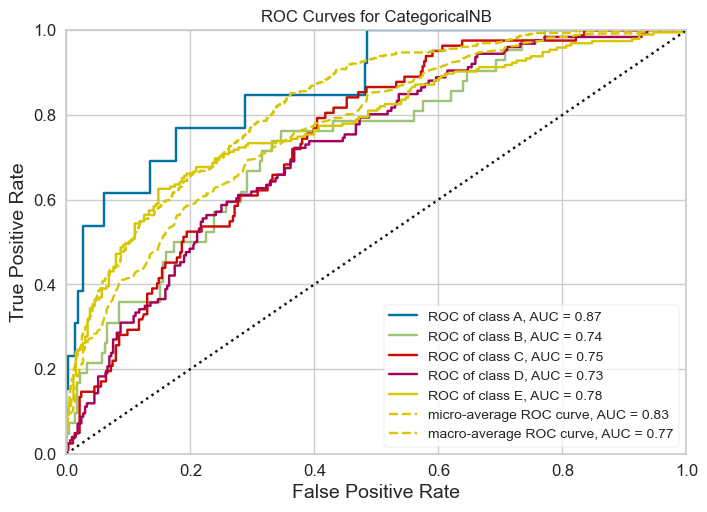

In [635]:
train_acc = train_test_models1(X_train, Y_train, X_train, Y_train)

#### Results 
We implemented the multinomial, categorical and complement Naive Bayes algorithms. It was found that the results of our observations record low evaluation metrics and accuracy values. This is because our model is overfitting and underfitting. A way to solve underfitting is by adding more features to the train test model, but all the features in the dataset are being used. Similarly, overfitting can be solved by adding more samples to the model, but all the samples are being used to give the current results. Thus, no improvement can be observed in the metrics. Note that we did not implement Bernoulli Naïve Bayes algorithm since it is primarily used for data with Bernoulli distributions, i.e., features with more than two outcomes. This will not work on data that is not binary-valued, so we would have to binarize our data to make it work. 

# Lab 7. Clustering
In this lab we implemented k-means clustering as well as other hard and soft clustering algorithms specifically Gaussian Mixture Model and Hierarchical clustering. We also implemented the elbow method as well as the Silhouette Method to find the optimal number of clusters.

### K means

In [636]:
y = np.array(Y_train)
y_t = np.array(Y_test)

In [637]:
from sklearn.cluster import KMeans 

In [638]:
scaler = MinMaxScaler()
X_s = scaler.fit_transform(X_train)
X_t = scaler.fit_transform(X_test)
# kmeans.fit(X_s)
kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=5, n_init=30, random_state=None)
kmeans.fit(X_s)

C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(algorithm='auto', max_iter=500, n_clusters=5, n_init=30)

In [639]:
# correct = 0
# for i in range(len(X_t)):
#     X_array = np.array(X_t[i].astype(float))
#     X_array = X_array.reshape(-1, len(X_array))
#     prediction = kmeans.predict(X_array)
#     if prediction[0] == y_t[i]:
#         correct += 1

# print(correct/len(X_t)) # accuracy

In [640]:
y_pred = kmeans.fit_predict(X_t)
y

C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([3, 1, 4, 4, 4, 1, 3, 4, 3, 3, 4, 3, 3, 4, 4, 3, 2, 3, 2, 4, 4, 3,
       1, 2, 2, 3, 1, 4, 4, 4, 4, 2, 1, 4, 1, 4, 2, 2, 4, 4, 3, 2, 4, 3,
       4, 3, 4, 4, 4, 2, 2, 0, 3, 3, 1, 4, 3, 3, 3, 2, 4, 2, 4, 4, 1, 4,
       3, 4, 3, 2, 4, 1, 3, 2, 2, 4, 4, 4, 4, 4, 2, 3, 4, 3, 2, 0, 2, 1,
       2, 4, 3, 3, 2, 3, 4, 1, 3, 2, 3, 4, 4, 3, 3, 4, 1, 4, 3, 4, 4, 4,
       3, 3, 3, 3, 2, 2, 2, 4, 2, 4, 1, 1, 4, 3, 4, 2, 3, 1, 4, 2, 2, 2,
       1, 4, 4, 4, 4, 3, 2, 4, 2, 4, 4, 1, 0, 0, 4, 2, 3, 4, 4, 4, 4, 4,
       2, 2, 4, 1, 4, 3, 4, 3, 2, 2, 4, 4, 3, 2, 3, 4, 3, 3, 4, 1, 3, 3,
       1, 4, 3, 4, 1, 4, 3, 3, 4, 2, 2, 3, 2, 1, 2, 4, 2, 4, 1, 2, 4, 3,
       3, 0, 2, 3, 4, 4, 3, 4, 3, 2, 3, 4, 3, 1, 4, 4, 3, 3, 4, 4, 4, 4,
       2, 4, 3, 3, 4, 4, 3, 3, 4, 4, 4, 2, 1, 4, 3, 4, 4, 4, 0, 4, 4, 3,
       2, 3, 3, 4, 2, 4, 4, 4, 1, 4, 2, 4, 4, 4, 3, 4, 3, 3, 2, 2, 1, 4,
       4, 3, 3, 4, 1, 3, 3, 3, 4, 3, 3, 2, 3, 4, 3, 4, 3, 3, 3, 3, 2, 4,
       1, 4, 3, 4, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 2,

In [641]:
l = kmeans.labels_
l

array([1, 2, 1, 4, 4, 2, 3, 0, 0, 3, 3, 3, 4, 0, 1, 4, 0, 2, 4, 1, 1, 1,
       4, 1, 1, 2, 2, 2, 3, 1, 3, 3, 3, 4, 4, 1, 2, 3, 0, 1, 2, 1, 3, 1,
       4, 3, 1, 4, 4, 2, 3, 2, 2, 3, 1, 1, 1, 4, 4, 0, 0, 3, 3, 3, 2, 2,
       1, 1, 4, 1, 1, 1, 0, 1, 1, 2, 3, 3, 2, 0, 0, 1, 3, 0, 1, 1, 4, 0,
       2, 1, 0, 2, 2, 0, 3, 2, 4, 4, 1, 3, 2, 0, 1, 0, 4, 4, 4, 3, 2, 3,
       1, 0, 1, 1, 2, 2, 0, 2, 2, 2, 0, 1, 4, 0, 3, 1, 4, 1, 2, 4, 1, 1,
       2, 4, 1, 0, 1, 1, 2, 2, 3, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 4])

In [642]:
y_t

array([4, 4, 4, 3, 4, 4, 3, 4, 4, 3, 4, 1, 3, 2, 4, 4, 0, 4, 4, 3, 4, 1,
       4, 1, 3, 0, 2, 3, 2, 4, 4, 4, 4, 2, 2, 4, 4, 3, 2, 2, 4, 0, 1, 3,
       3, 2, 4, 3, 2, 4, 1, 3, 4, 3, 3, 3, 3, 4, 2, 2, 3, 3, 3, 2, 2, 2,
       4, 4, 4, 2, 4, 4, 3, 3, 4, 0, 3, 4, 3, 3, 1, 4, 2, 4, 4, 3, 3, 1,
       4, 4, 3, 3, 3, 0, 4, 4, 1, 2, 1, 2, 4, 0, 3, 2, 4, 3, 1, 2, 4, 4,
       4, 2, 3, 4, 3, 4, 3, 4, 4, 3, 4, 4, 2, 1, 4, 4, 4, 3, 4, 4, 3, 4,
       4, 3, 4, 3, 4, 2, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 4, 2, 4, 4, 3])

In [643]:
# print(np.sum(l==y)/len(l))
acc = sklearn.metrics.accuracy_score(y_t,y_pred) 
print(acc)

0.17647058823529413


In [644]:
kmeans.cluster_centers_

array([[ 2.38095238e-01,  2.14285714e-01,  1.11022302e-16,
         0.00000000e+00, -1.11022302e-16,  9.52380952e-02,
         9.04761905e-01,  9.52380952e-02,  9.52380952e-02,
         4.76190476e-01,  4.76190476e-02,  2.85714286e-01,
         3.80952381e-01,  3.33333333e-01,  4.76190476e-02,
         2.38095238e-01,  4.76190476e-02,  8.57142857e-01,
         9.52380952e-02,  9.52380952e-02,  6.19047619e-01,
         8.57142857e-01,  2.85714286e-01,  9.04761905e-01,
         9.52380952e-02,  7.61904762e-01,  4.76190476e-02,
         6.19047619e-01,  8.57142857e-01,  1.00000000e+00,
         8.57142857e-01,  3.80952381e-01,  1.00000000e+00,
         7.97619048e-01,  9.52380952e-02,  3.17460317e-01,
         1.58730159e-02,  6.54761905e-01,  6.30952381e-01,
         5.35714286e-01,  1.66666667e-01,  2.97619048e-01,
         5.95238095e-01,  5.95238095e-01,  6.48351648e-01,
         6.23376623e-01,  5.88744589e-01],
       [ 3.43750000e-01,  2.67857143e-01,  3.12500000e-01,
         6.25

## Finding the Optimal Number of Clusters for K-Means Clustering

#### Elbow Method

In [645]:
#perform wss analyses for k-means against 1-10 number of clusters
wss = []
acc = []
kmeansmodels = []
for k in range(1,10):
    kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=k, n_init=30, random_state=42)
    kmeansmodels.append(kmeans)
    kmeans = kmeans.fit(X_s)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
    acc.append(sklearn.metrics.accuracy_score(y_t,kmeans.fit_predict(X_t)))

# plot wss against number of clusters
centroids = pd.DataFrame({'Clusters' : range(1,10), 'WSS' : wss})
centroids



C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\

C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters          WSS
0         1  2660.561992
1         2  2474.950568
2         3  2349.430175
3         4  2251.841410
4         5  2189.828890
5         6  2139.545683
6         7  2100.330039
7         8  2059.392299
8         9  2025.855707

<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

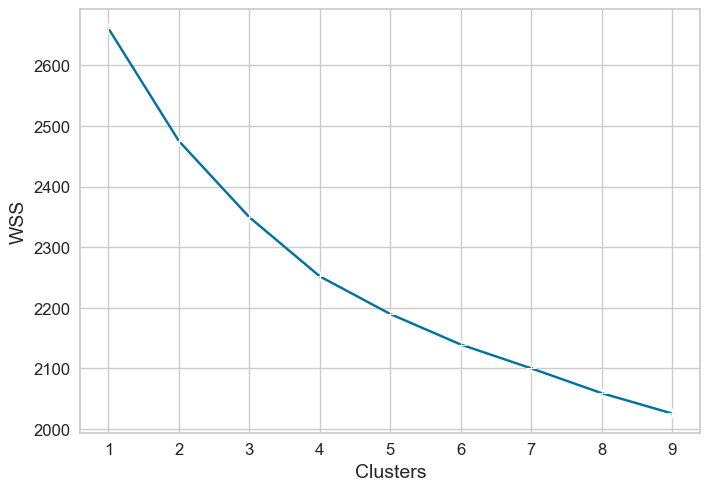

In [646]:
sns.lineplot(x = 'Clusters', y = 'WSS', data = centroids, marker="+")

Optimal number of clusters according to the elbow method = 5

#### Silhouette Methods

In [647]:
from sklearn import metrics

SK = range(2,10)
print(kmeansmodels)
sil_score = []
for i in SK:
    labels = kmeansmodels[i-1].fit(X_s).labels_
    score = metrics.silhouette_score(X_s,labels,metric="euclidean")
    sil_score.append(score)


[KMeans(algorithm='auto', max_iter=500, n_clusters=1, n_init=30, random_state=42), KMeans(algorithm='auto', max_iter=500, n_clusters=2, n_init=30, random_state=42), KMeans(algorithm='auto', max_iter=500, n_clusters=3, n_init=30, random_state=42), KMeans(algorithm='auto', max_iter=500, n_clusters=4, n_init=30, random_state=42), KMeans(algorithm='auto', max_iter=500, n_clusters=5, n_init=30, random_state=42), KMeans(algorithm='auto', max_iter=500, n_clusters=6, n_init=30, random_state=42), KMeans(algorithm='auto', max_iter=500, n_clusters=7, n_init=30, random_state=42), KMeans(algorithm='auto', max_iter=500, n_init=30, random_state=42), KMeans(algorithm='auto', max_iter=500, n_clusters=9, n_init=30, random_state=42)]


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HP\

In [648]:
sil_centers = pd.DataFrame({'Clusters' : SK, 'Sil Score' : sil_score})
sil_centers

Clusters  Sil Score
0         2   0.073296
1         3   0.070926
2         4   0.069077
3         5   0.056549
4         6   0.058659
5         7   0.055483
6         8   0.052564
7         9   0.056766

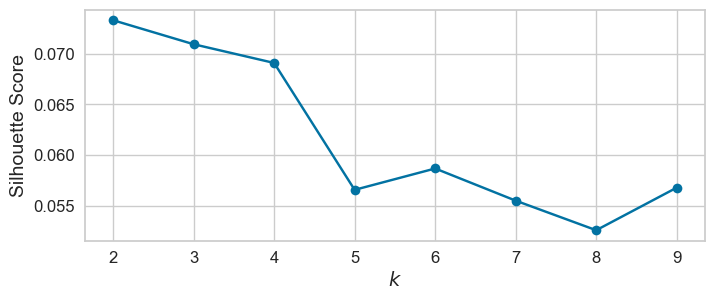

In [649]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), sil_score, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.show()

optimal number of clusters = 2 (max silhouette score)

#### Accuracies for Different k values

In [650]:
# plot wss against number of clusters
myaccs = pd.DataFrame({'Clusters' : range(1,10), 'accuracy' : acc})
print(myaccs)

   Clusters  accuracy
0         1  0.039216
1         2  0.039216
2         3  0.078431
3         4  0.163399
4         5  0.169935
5         6  0.248366
6         7  0.163399
7         8  0.143791
8         9  0.176471


Results: Elbow method works best for our data. 5 clusters shows the best accuracy. 

In [651]:
y = np.array(Y_train)
y_t = np.array(Y_test)
X_s = np.array(X_train[:,0:2])
X_t = np.array(X_test[:,0:2])

In [652]:
#perform wss analyses for k-means against 1-10 number of clusters
wss = []
acc = []
kmeansmodels = []
for k in range(1,10):
    kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=k, n_init=30, random_state=42)
    kmeansmodels.append(kmeans)
    kmeans = kmeans.fit(X_s)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
    acc.append(sklearn.metrics.accuracy_score(y_t,kmeans.fit_predict(X_t)))

# plot wss against number of clusters
centroids = pd.DataFrame({'Clusters' : range(1,10), 'WSS' : wss})
centroids


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\

C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters        WSS
0         1  38.938557
1         2  19.844283
2         3  13.192095
3         4   9.665123
4         5   7.579298
5         6   6.304544
6         7   5.416223
7         8   4.705416
8         9   4.008175

<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

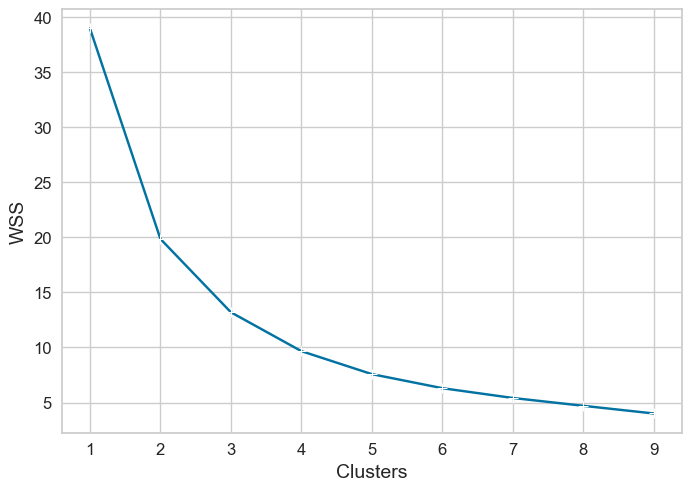

In [653]:
sns.lineplot(x = 'Clusters', y = 'WSS', data = centroids, marker="+")

In [654]:
from sklearn import metrics

SK = range(2,10)
sil_score = []
for i in SK:
    labels = kmeansmodels[i-1].fit(X_s).labels_
    print(kmeansmodels[i-1])
    score = metrics.silhouette_score(X_s,labels,metric="euclidean")
    print(score)
    sil_score.append(score)

C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(algorithm='auto', max_iter=500, n_clusters=2, n_init=30, random_state=42)
0.49209260551247813


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(algorithm='auto', max_iter=500, n_clusters=3, n_init=30, random_state=42)
0.4275731932705697


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(algorithm='auto', max_iter=500, n_clusters=4, n_init=30, random_state=42)
0.45567112039913793


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(algorithm='auto', max_iter=500, n_clusters=5, n_init=30, random_state=42)
0.4719116348236407


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(algorithm='auto', max_iter=500, n_clusters=6, n_init=30, random_state=42)
0.4795358695707186


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(algorithm='auto', max_iter=500, n_clusters=7, n_init=30, random_state=42)
0.47764962116728504


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(algorithm='auto', max_iter=500, n_init=30, random_state=42)
0.5290390831876928


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(algorithm='auto', max_iter=500, n_clusters=9, n_init=30, random_state=42)
0.5357991071680884


In [655]:
sil_centers = pd.DataFrame({'Clusters' : SK, 'Sil Score' : sil_score})
sil_centers

Clusters  Sil Score
0         2   0.492093
1         3   0.427573
2         4   0.455671
3         5   0.471912
4         6   0.479536
5         7   0.477650
6         8   0.529039
7         9   0.535799

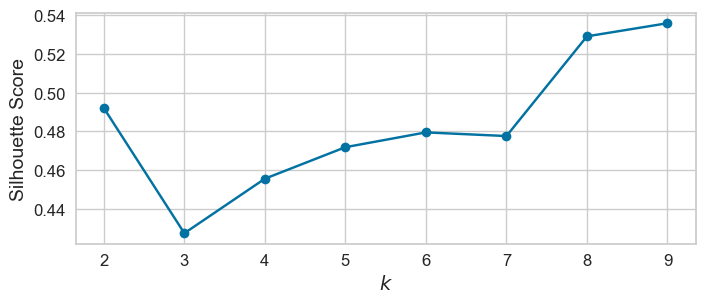

In [656]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), sil_score, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.show()

### Gaussian Mixture Model

In [657]:
y = np.array(Y_train)
y_t = np.array(Y_test)

scaler = MinMaxScaler()
X_s = scaler.fit_transform(X_train)
X_t = scaler.fit_transform(X_test)

In [658]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(X_s) #setting the number of mixture components to be 5
labels = gmm.fit_predict(X_t)
labels

C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([3, 4, 3, 0, 2, 1, 3, 4, 4, 0, 3, 0, 2, 1, 0, 2, 1, 2, 0, 0, 2, 4,
       2, 0, 2, 1, 4, 1, 0, 3, 0, 3, 3, 4, 0, 3, 4, 1, 4, 0, 1, 0, 0, 4,
       2, 0, 3, 0, 0, 4, 1, 0, 1, 1, 3, 0, 0, 2, 2, 4, 4, 3, 0, 0, 1, 4,
       3, 3, 2, 3, 3, 0, 1, 4, 0, 1, 4, 3, 4, 1, 4, 4, 0, 2, 3, 2, 0, 1,
       3, 3, 1, 2, 4, 4, 3, 1, 0, 2, 0, 0, 4, 1, 3, 4, 0, 2, 0, 0, 3, 3,
       3, 1, 4, 3, 2, 1, 4, 3, 3, 1, 2, 0, 0, 4, 3, 0, 0, 0, 4, 0, 2, 3,
       4, 2, 4, 4, 3, 1, 2, 2, 2, 3, 0, 3, 0, 3, 3, 0, 3, 1, 3, 2, 0],
      dtype=int64)

In [659]:
gmm.converged_

True

In [660]:
gmm.n_iter_ #number of iterations for the model to converge

2

In [661]:
p = gmm.predict_proba(X_t) #printing the class probabilities for each data point
p

array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000

In [662]:
acc = sklearn.metrics.accuracy_score(y_t,labels) #calculating the accuracy 
print(acc)

0.12418300653594772


In [663]:
# from sklearn.metrics import pairwise_distances

sil_score = metrics.silhouette_score(X_t,labels, metric="euclidean") #calculating the silhoutte score
sil_score

0.0449076667007035

In [664]:
from sklearn.manifold import TSNE
# using T-SNE for dimensionality reduction to reduce the dataframe to two features to be able to plot a scatter plot 
newm = TSNE(learning_rate = 50)

new_features = newm.fit_transform(X_t) 
new_features[1:4,:]

C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


array([[ 2.1287508 , -1.6118463 ],
       [ 0.28652555,  3.7945745 ],
       [-3.471531  , -0.80695593]], dtype=float32)

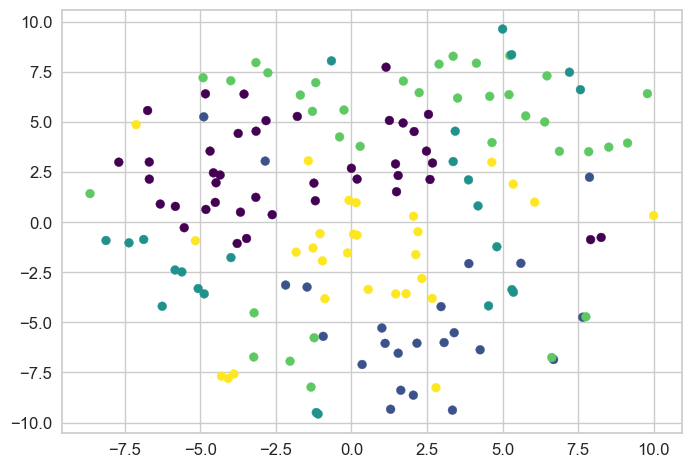

In [667]:
plt.scatter(new_features[:,0], new_features[:,1], c=labels, s=40, cmap='viridis');

## Hierarchical Clustering

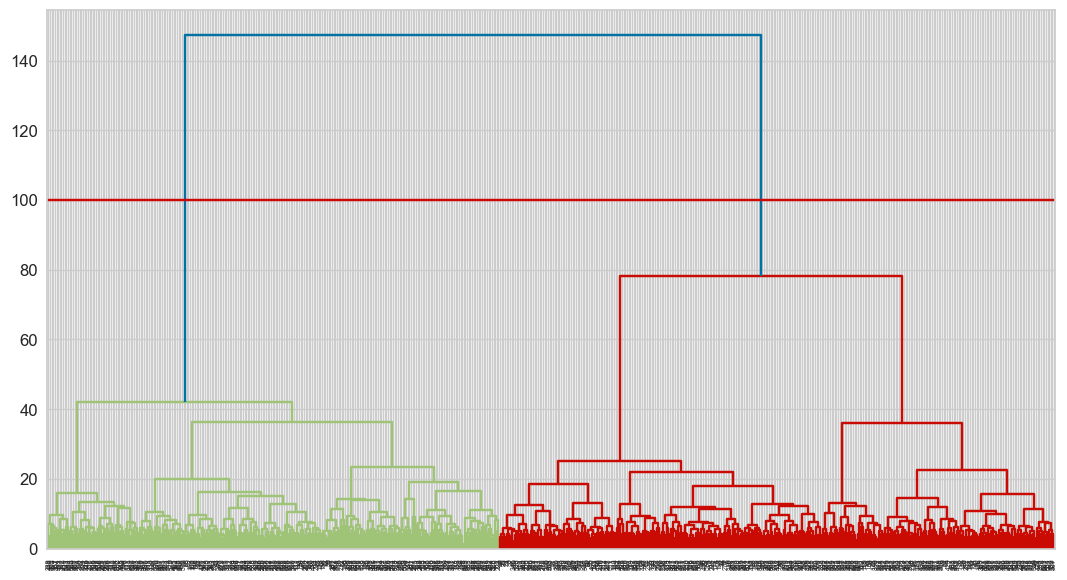

In [668]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage


# data = list(zip(X_d, Y_d))

# linkage_data = linkage(data, method='ward', metric='euclidean')
# dendrogram(linkage_data)

# # The vertical line with maximum distance is the blue line, so the threshold is 70
# plt.axhline(y=70, color='b', linestyle='--')

# plt.show()

plt.figure(figsize=(13, 7))

clusters = shc.linkage(new_df, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)

# The vertical line with maximum distance is the blue line, so the threshold is 100

plt.axhline(y = 100, color = 'r', linestyle = '-')

In [669]:
# After locating the horizontal line, we count how many times our vertical lines were crossed by it - 2 times
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(new_df)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


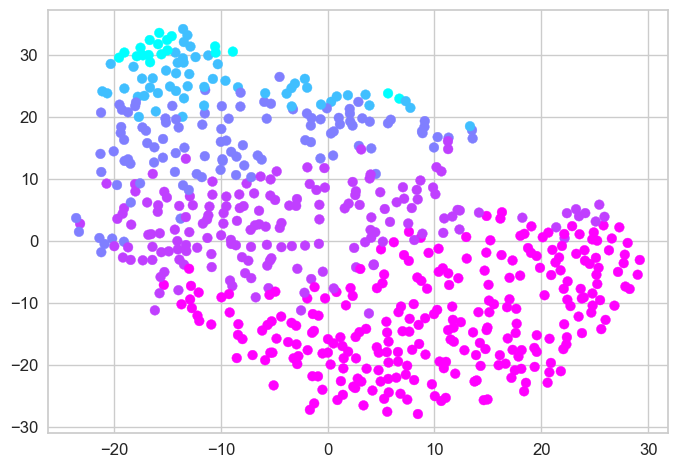

In [670]:
samples = df.iloc[:, :-1].values
variety_numbers = df.iloc[:, -1].values
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:, 0]

# Select the 1st feature: ys
ys = tsne_features[:, 1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=new_df[47], cmap='cool');

### Results on clustering algorithms
It was found that the clustering algorithms did not perform well on our data with a 17% accuracy for k-means algorithm and a 12% accuracy for GMM. When comparing the accuracy values, we observed that the Naive Bayes algorithms performed better on our dataset. 
We used the elbow method and the silhouette method to find the optimal number of clusters to improve the performance of the k-means algorithm over all the features of the dataset. 
- Using the elbow method, we applied k-means clustering to the dataset using 1- 9 clusters values and computed the weighted sum of the square distances (WSS) between each point and the center of its cluster for each value of k. We plotted the graph of the WSS against different cluster values but the results show there was no clear ‘elbow’ in the graph of WSS against different number of clusters that we could use as the optimal number of clusters.   
- Using the silhoutte score method, the k value with the maximum silhouette score was 2, signifying that according to this measure, data points lies best within their cluster when we only use 2 clusters (also the minimum number of clusters). 
- We also found the accuracies for different k-values (k values ranging from 1-9) to validate the performance of the Silhouette method and Elbow method. Considering that our accuracy is best with k = 5, i.e., 5 clusters, neither methods measure the best number of clusters for our data.

Upon further exploration and visualisation using T-SNE, we found that the clustering improved when using only true numeric features I.e., the age and absences feature columns. Hence, we extended the process of finding optimal clusters using the elbow and silhouette methods on a new dataset containing only the age and absences feature columns.  
- We plotted the graph of WSS against different cluster values with this new dataset. This time we could find an ‘elbow’ in the graph when the WSS = 10, this suggests that the optimal number of clusters is 4. Although this is not in line with the number of classes in our dataset, it is inline with the visualisation of the clusters where we observe 4 clear clusters, the 5th cluster does not seem to have a clear boundary.  
- The silhouette method suggests 9 to be the optimal number of clusters for our data set. The silhouette method did not report satisfactory results for our data even while restricting the data set to only 2 numeric features. We concluded that the silhouette method does not work well with our dataset.  


## Week 8: Decision Trees

In [671]:
model = tree.DecisionTreeClassifier(max_depth=5, random_state=42) # spliting criteria is best to choose the best split
# all features are considered when looking for thr best split
# max depth of the tree is set to 5 after referring to previous run of this classifier
model.fit(X_train, y)

DecisionTreeClassifier(max_depth=5, random_state=42)

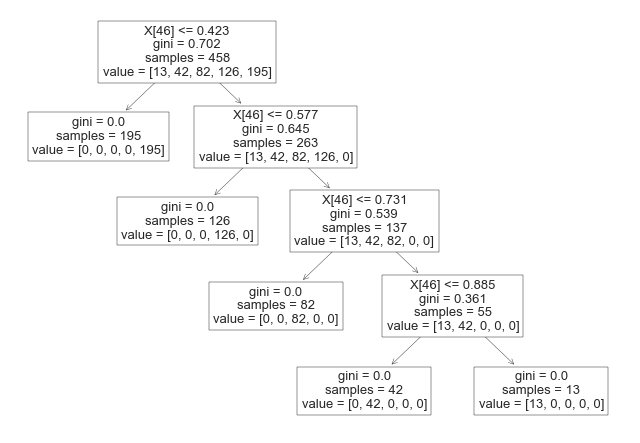

In [672]:
from sklearn.tree import plot_tree
plot_tree(model);

In [673]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [674]:
# define search space
params =  {
    'criterion':['gini','entropy'],
    'splitter' : ["best", "random"],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
    'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
}

# define search
search = GridSearchCV(model, params, scoring='accuracy', cv=10, verbose = 3)
# execute search
result = search.fit(X_train, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_) # entropy scores are lower

Fitting 10 folds for each of 720 candidates, totalling 7200 fits
[CV 1/10] END criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=4, min_samples_

[CV 7/10] END criterion=gini, max_depth=4, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=4, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=4, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=4, min_samples_leaf=5, splitter=random;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, min_samples_leaf=5, splitter=random;, score=0.913 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, min_samples_leaf=5, splitter=random;, score=0.913 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s

[CV 9/10] END criterion=gini, max_depth=4, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=4, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=4, min_samples_leaf=9, splitter=random;, score=0.935 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, min_samples_leaf=9, splitter=random;, score=0.870 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, min_samples_leaf=9, splitter=random;, score=0.978 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, min_samples_leaf=9, splitter=random;, score=0.935 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, min_samples_leaf=9, splitter=random;, score=0.978 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, min_samples_leaf=9, splitter=random;, score=0.913 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, min_samples_leaf=9, splitter=random;, score=0.804 total time=   

[CV 10/10] END criterion=gini, max_depth=5, min_samples_leaf=3, splitter=random;, score=0.956 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=5, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=5, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=5, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=5, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=5, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=5, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=5, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=5, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 9/1

[CV 2/10] END criterion=gini, max_depth=6, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=6, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=6, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=6, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=6, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=6, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=6, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=6, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=6, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10]

[CV 9/10] END criterion=gini, max_depth=6, min_samples_leaf=5, splitter=random;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=6, min_samples_leaf=5, splitter=random;, score=0.933 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=6, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=6, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=6, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=6, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=6, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=6, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=6, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 8

[CV 3/10] END criterion=gini, max_depth=6, min_samples_leaf=10, splitter=random;, score=0.957 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=6, min_samples_leaf=10, splitter=random;, score=0.957 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=6, min_samples_leaf=10, splitter=random;, score=0.913 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=6, min_samples_leaf=10, splitter=random;, score=0.870 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=6, min_samples_leaf=10, splitter=random;, score=0.935 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=6, min_samples_leaf=10, splitter=random;, score=0.957 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=6, min_samples_leaf=10, splitter=random;, score=0.889 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=6, min_samples_leaf=10, splitter=random;, score=0.978 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=7, min_samples_leaf=1, splitter=best;, score=1.000 tota

[CV 9/10] END criterion=gini, max_depth=7, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=7, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=7, min_samples_leaf=4, splitter=random;, score=0.978 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=7, min_samples_leaf=4, splitter=random;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=7, min_samples_leaf=4, splitter=random;, score=0.913 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=7, min_samples_leaf=4, splitter=random;, score=0.913 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=7, min_samples_leaf=4, splitter=random;, score=0.957 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=7, min_samples_leaf=4, splitter=random;, score=0.891 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=7, min_samples_leaf=4, splitter=random;, score=0.978 total time=   

[CV 2/10] END criterion=gini, max_depth=7, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=7, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=7, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=7, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=7, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=7, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=7, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=7, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=7, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s


[CV 1/10] END criterion=gini, max_depth=8, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10]

[CV 7/10] END criterion=gini, max_depth=9, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=9, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=9, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=9, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=9, min_samples_leaf=3, splitter=random;, score=0.957 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=9, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=9, min_samples_leaf=3, splitter=random;, score=0.935 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=9, min_samples_leaf=3, splitter=random;, score=0.913 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=9, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s

[CV 7/10] END criterion=gini, max_depth=9, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=9, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=9, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=9, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=9, min_samples_leaf=7, splitter=random;, score=0.957 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=9, min_samples_leaf=7, splitter=random;, score=0.957 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=9, min_samples_leaf=7, splitter=random;, score=0.957 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=9, min_samples_leaf=7, splitter=random;, score=0.935 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=9, min_samples_leaf=7, splitter=random;, score=0.913 total time=   0.0s

[CV 6/10] END criterion=gini, max_depth=10, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, min_samples_leaf=2, splitter=random;, score=0.978 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, min_samples_leaf=2, splitter=random;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, min_samples_leaf=2, splitter=random;, score=0.978 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, min_samples_leaf=2, splitter=random;, score=0.913 total time=

[CV 1/10] END criterion=gini, max_depth=10, min_samples_leaf=6, splitter=random;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, min_samples_leaf=6, splitter=random;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, min_samples_leaf=6, splitter=random;, score=0.957 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, min_samples_leaf=6, splitter=random;, score=0.978 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, min_samples_leaf=6, splitter=random;, score=0.913 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, min_samples_leaf=6, splitter=random;, score=0.935 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, min_samples_leaf=6, splitter=random;, score=0.957 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, min_samples_leaf=6, splitter=random;, score=0.870 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, min_samples_leaf=6, splitter=random;, score=1.000 to

[CV 4/10] END criterion=gini, max_depth=11, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=11, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=11, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=11, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=11, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=11, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=11, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=11, min_samples_leaf=1, splitter=random;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=11, min_samples_leaf=1, splitter=random;, score=0.913 total time=   0

[CV 10/10] END criterion=gini, max_depth=11, min_samples_leaf=5, splitter=random;, score=0.911 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=11, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=11, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=11, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=11, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=11, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=11, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=11, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=11, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0

[CV 2/10] END criterion=gini, max_depth=12, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=12, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=12, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=12, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=12, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=12, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=12, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=12, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=12, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s


[CV 4/10] END criterion=gini, max_depth=12, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=12, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=12, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=12, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=12, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=12, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=12, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=12, min_samples_leaf=7, splitter=random;, score=0.957 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=12, min_samples_leaf=7, splitter=random;, score=0.957 total time=   0

[CV 9/10] END criterion=gini, max_depth=12, min_samples_leaf=10, splitter=random;, score=0.889 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=12, min_samples_leaf=10, splitter=random;, score=0.933 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=15, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=15, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=15, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=15, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=15, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=15, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=15, min_samples_leaf=1, splitter=best;, score=1.000 total time=  

[CV 7/10] END criterion=gini, max_depth=15, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=15, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=15, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=15, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=15, min_samples_leaf=5, splitter=random;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=15, min_samples_leaf=5, splitter=random;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=15, min_samples_leaf=5, splitter=random;, score=0.957 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=15, min_samples_leaf=5, splitter=random;, score=0.891 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=15, min_samples_leaf=5, splitter=random;, score=0.957 total tim

[CV 6/10] END criterion=gini, max_depth=15, min_samples_leaf=9, splitter=random;, score=0.891 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=15, min_samples_leaf=9, splitter=random;, score=0.870 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=15, min_samples_leaf=9, splitter=random;, score=0.957 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=15, min_samples_leaf=9, splitter=random;, score=0.978 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=15, min_samples_leaf=9, splitter=random;, score=0.956 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=15, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=15, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=15, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=15, min_samples_leaf=10, splitter=best;, score=1.000 total

[CV 5/10] END criterion=gini, max_depth=20, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=20, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=20, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=20, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=20, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=20, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=20, min_samples_leaf=4, splitter=random;, score=0.978 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=20, min_samples_leaf=4, splitter=random;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=20, min_samples_leaf=4, splitter=random;, score=0.935 total time=  

[CV 9/10] END criterion=gini, max_depth=30, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=30, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=30, min_samples_leaf=1, splitter=random;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=30, min_samples_leaf=1, splitter=random;, score=0.913 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=30, min_samples_leaf=1, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=30, min_samples_leaf=1, splitter=random;, score=0.957 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=30, min_samples_leaf=1, splitter=random;, score=0.957 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=30, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=30, min_samples_leaf=1, splitter=random;, score=0.957 total

[CV 2/10] END criterion=gini, max_depth=30, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=30, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=30, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=30, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=30, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=30, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=30, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=30, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=30, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s


[CV 8/10] END criterion=gini, max_depth=40, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=40, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=40, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=40, min_samples_leaf=4, splitter=random;, score=0.978 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=40, min_samples_leaf=4, splitter=random;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=40, min_samples_leaf=4, splitter=random;, score=0.935 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=40, min_samples_leaf=4, splitter=random;, score=0.870 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=40, min_samples_leaf=4, splitter=random;, score=0.957 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=40, min_samples_leaf=4, splitter=random;, score=0.891 total t

[CV 3/10] END criterion=gini, max_depth=40, min_samples_leaf=10, splitter=random;, score=0.957 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=40, min_samples_leaf=10, splitter=random;, score=0.957 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=40, min_samples_leaf=10, splitter=random;, score=0.913 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=40, min_samples_leaf=10, splitter=random;, score=0.870 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=40, min_samples_leaf=10, splitter=random;, score=0.935 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=40, min_samples_leaf=10, splitter=random;, score=0.957 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=40, min_samples_leaf=10, splitter=random;, score=0.889 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=40, min_samples_leaf=10, splitter=random;, score=0.933 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=50, min_samples_leaf=1, splitter=best;, score=1

[CV 8/10] END criterion=gini, max_depth=50, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=50, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=50, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=50, min_samples_leaf=4, splitter=random;, score=0.978 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=50, min_samples_leaf=4, splitter=random;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=50, min_samples_leaf=4, splitter=random;, score=0.935 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=50, min_samples_leaf=4, splitter=random;, score=0.870 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=50, min_samples_leaf=4, splitter=random;, score=0.957 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=50, min_samples_leaf=4, splitter=random;, score=0.891 total t

[CV 4/10] END criterion=gini, max_depth=50, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=50, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=50, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=50, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=50, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=50, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=50, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=50, min_samples_leaf=10, splitter=random;, score=0.935 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=50, min_samples_leaf=10, splitter=random;, score=0.957 total 

[CV 10/10] END criterion=gini, max_depth=70, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=70, min_samples_leaf=5, splitter=random;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=70, min_samples_leaf=5, splitter=random;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=70, min_samples_leaf=5, splitter=random;, score=0.957 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=70, min_samples_leaf=5, splitter=random;, score=0.891 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=70, min_samples_leaf=5, splitter=random;, score=0.957 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=70, min_samples_leaf=5, splitter=random;, score=0.891 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=70, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=70, min_samples_leaf=5, splitter=random;, score=0.957 tot

[CV 5/10] END criterion=gini, max_depth=70, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=70, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=70, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=70, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=70, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=70, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=70, min_samples_leaf=9, splitter=random;, score=0.891 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=70, min_samples_leaf=9, splitter=random;, score=0.957 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=70, min_samples_leaf=9, splitter=random;, score=0.913 total time=  

[CV 3/10] END criterion=gini, max_depth=90, min_samples_leaf=3, splitter=random;, score=0.935 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=90, min_samples_leaf=3, splitter=random;, score=0.913 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=90, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=90, min_samples_leaf=3, splitter=random;, score=0.891 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=90, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=90, min_samples_leaf=3, splitter=random;, score=0.935 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=90, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=90, min_samples_leaf=3, splitter=random;, score=0.933 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=90, min_samples_leaf=4, splitter=best;, score=1.000 tot

[CV 6/10] END criterion=gini, max_depth=90, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=90, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=90, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=90, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=90, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=90, min_samples_leaf=8, splitter=random;, score=0.957 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=90, min_samples_leaf=8, splitter=random;, score=0.913 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=90, min_samples_leaf=8, splitter=random;, score=0.978 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=90, min_samples_leaf=8, splitter=random;, score=0.935 total time=

[CV 10/10] END criterion=gini, max_depth=120, min_samples_leaf=1, splitter=random;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=120, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=120, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=120, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=120, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=120, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=120, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=120, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=120, min_samples_leaf=2, splitter=best;, score=1.000 total ti

[CV 1/10] END criterion=gini, max_depth=120, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=120, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=120, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=120, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=120, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=120, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=120, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=120, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=120, min_samples_leaf=6, splitter=best;, score=1.000 total time=

[CV 6/10] END criterion=gini, max_depth=120, min_samples_leaf=9, splitter=random;, score=0.891 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=120, min_samples_leaf=9, splitter=random;, score=0.870 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=120, min_samples_leaf=9, splitter=random;, score=0.957 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=120, min_samples_leaf=9, splitter=random;, score=0.978 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=120, min_samples_leaf=9, splitter=random;, score=0.956 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=120, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=120, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=120, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=120, min_samples_leaf=10, splitter=best;, score=1.

[CV 10/10] END criterion=gini, max_depth=150, min_samples_leaf=4, splitter=random;, score=0.911 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=150, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=150, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=150, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=150, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=150, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=150, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=150, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=150, min_samples_leaf=5, splitter=best;, score=1.000 total ti

[CV 5/10] END criterion=gini, max_depth=150, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=150, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=150, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=150, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=150, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=150, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=150, min_samples_leaf=9, splitter=random;, score=0.891 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=150, min_samples_leaf=9, splitter=random;, score=0.957 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=150, min_samples_leaf=9, splitter=random;, score=0.913 tota

[CV 3/10] END criterion=entropy, max_depth=4, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=4, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, min_samples_leaf=3, splitter=random;, score=0.870

[CV 4/10] END criterion=entropy, max_depth=4, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, min_samples_leaf=7, splitter=random;, score=0.870 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, min_samples_leaf=7, splitter=random;, score=0.8

[CV 6/10] END criterion=entropy, max_depth=5, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=5, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=5, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=5, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=5, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=5, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=5, min_samples_leaf=1, splitter=random;, score=0.957 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=5, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=5, min_samples_leaf=1, splitter=random;, score

[CV 5/10] END criterion=entropy, max_depth=5, min_samples_leaf=5, splitter=random;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=5, min_samples_leaf=5, splitter=random;, score=0.891 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=5, min_samples_leaf=5, splitter=random;, score=0.870 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=5, min_samples_leaf=5, splitter=random;, score=0.848 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=5, min_samples_leaf=5, splitter=random;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=5, min_samples_leaf=5, splitter=random;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=5, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=5, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=5, min_samples_leaf=6, splitter=best;, s

[CV 8/10] END criterion=entropy, max_depth=5, min_samples_leaf=9, splitter=random;, score=0.870 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=5, min_samples_leaf=9, splitter=random;, score=0.933 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=5, min_samples_leaf=9, splitter=random;, score=0.933 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=5, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=5, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=5, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=5, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=5, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=5, min_samples_leaf=10, splitter=best;, s

[CV 5/10] END criterion=entropy, max_depth=6, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=6, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=6, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=6, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=6, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=6, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=6, min_samples_leaf=7, splitter=random;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=6, min_samples_leaf=7, splitter=random;, score=0.957 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=6, min_samples_leaf=7, splitter=random;, score=0

[CV 6/10] END criterion=entropy, max_depth=7, min_samples_leaf=1, splitter=random;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=7, min_samples_leaf=1, splitter=random;, score=0.957 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=7, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=7, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=7, min_samples_leaf=1, splitter=random;, score=0.956 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=7, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=7, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=7, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=7, min_samples_leaf=2, splitter=best;, sco

[CV 10/10] END criterion=entropy, max_depth=7, min_samples_leaf=6, splitter=random;, score=0.978 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=7, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=7, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=7, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=7, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=7, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=7, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=7, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=7, min_samples_leaf=7, splitter=best;, score=1.000

[CV 7/10] END criterion=entropy, max_depth=7, min_samples_leaf=10, splitter=random;, score=0.935 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=7, min_samples_leaf=10, splitter=random;, score=0.957 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=7, min_samples_leaf=10, splitter=random;, score=0.933 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=7, min_samples_leaf=10, splitter=random;, score=0.956 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=8, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=8, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, min_samples_leaf=1, splitter=best;, s

[CV 6/10] END criterion=entropy, max_depth=8, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=8, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=8, min_samples_leaf=5, splitter=random;, score=0.935 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=8, min_samples_leaf=5, splitter=random;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, min_samples_leaf=5, splitter=random;, score

[CV 3/10] END criterion=entropy, max_depth=8, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=8, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=8, min_samples_leaf=9, splitter=random;, score=1.000

[CV 6/10] END criterion=entropy, max_depth=9, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=9, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=9, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=9, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=9, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=9, min_samples_leaf=6, splitter=random;, score=0.935 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=9, min_samples_leaf=6, splitter=random;, score=0.957 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=9, min_samples_leaf=6, splitter=random;, score=0.978 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=9, min_samples_leaf=6, splitter=random;, score

[CV 4/10] END criterion=entropy, max_depth=9, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=9, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=9, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=9, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=9, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=9, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=9, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=9, min_samples_leaf=10, splitter=random;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=9, min_samples_leaf=10, splitter=random;, 

[CV 7/10] END criterion=entropy, max_depth=10, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, min_samples_leaf=4, splitter=random;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, min_samples_leaf=4, splitter=random;, score=0.957 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, min_samples_leaf=4, splitter=random;, score=0.978 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, min_samples_leaf=4, splitter=random;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, min_samples_leaf=4, splitter=ran

[CV 4/10] END criterion=entropy, max_depth=10, min_samples_leaf=8, splitter=random;, score=0.957 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, min_samples_leaf=8, splitter=random;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, min_samples_leaf=8, splitter=random;, score=0.891 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, min_samples_leaf=8, splitter=random;, score=0.891 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, min_samples_leaf=8, splitter=random;, score=0.935 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, min_samples_leaf=8, splitter=random;, score=0.978 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, min_samples_leaf=8, splitter=random;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, min_samples_leaf=9, splitt

[CV 1/10] END criterion=entropy, max_depth=11, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=11, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=11, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=11, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=11, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=11, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=11, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=11, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=11, min_samples_leaf=3, splitter=best;, score

[CV 8/10] END criterion=entropy, max_depth=11, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=11, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=11, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=11, min_samples_leaf=8, splitter=random;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=11, min_samples_leaf=8, splitter=random;, score=0.957 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=11, min_samples_leaf=8, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=11, min_samples_leaf=8, splitter=random;, score=0.957 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=11, min_samples_leaf=8, splitter=random;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=11, min_samples_leaf=8, splitter=r

[CV 9/10] END criterion=entropy, max_depth=12, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=12, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=12, min_samples_leaf=2, splitter=random;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=12, min_samples_leaf=2, splitter=random;, score=0.957 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=12, min_samples_leaf=2, splitter=random;, score=0.978 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=12, min_samples_leaf=2, splitter=random;, score=0.957 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=12, min_samples_leaf=2, splitter=random;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=12, min_samples_leaf=2, splitter=random;, score=0.957 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=12, min_samples_leaf=2, splitter

[CV 2/10] END criterion=entropy, max_depth=12, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=12, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=12, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=12, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=12, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=12, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=12, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=12, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=12, min_samples_leaf=7, splitter=best;, scor

[CV 5/10] END criterion=entropy, max_depth=15, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=15, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=15, min_samples_leaf=1, splitter=random;, score=0.957 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=15, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=15, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=15, min_samples_leaf=1, splitter=random;, score=0.956 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=15, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=15, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=15, min_samples_leaf=2, splitter

[CV 10/10] END criterion=entropy, max_depth=15, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=15, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=15, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=15, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=15, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=15, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=15, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=15, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=15, min_samples_leaf=6, splitter=best;, sc

[CV 3/10] END criterion=entropy, max_depth=15, min_samples_leaf=9, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=15, min_samples_leaf=9, splitter=random;, score=0.957 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=15, min_samples_leaf=9, splitter=random;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=15, min_samples_leaf=9, splitter=random;, score=0.891 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=15, min_samples_leaf=9, splitter=random;, score=0.891 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=15, min_samples_leaf=9, splitter=random;, score=0.957 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=15, min_samples_leaf=9, splitter=random;, score=0.933 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=15, min_samples_leaf=9, splitter=random;, score=0.933 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=15, min_samples_leaf=10, spl

[CV 5/10] END criterion=entropy, max_depth=20, min_samples_leaf=3, splitter=random;, score=0.957 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=20, min_samples_leaf=3, splitter=random;, score=0.891 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=20, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=20, min_samples_leaf=3, splitter=random;, score=0.913 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=20, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=20, min_samples_leaf=3, splitter=random;, score=0.956 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=20, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=20, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=20, min_samples_leaf=4, splitter

[CV 8/10] END criterion=entropy, max_depth=20, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=20, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=20, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=20, min_samples_leaf=10, splitter=random;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=20, min_samples_leaf=10, splitter=random;, score=0.957 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=20, min_samples_leaf=10, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=20, min_samples_leaf=10, splitter=random;, score=0.935 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=20, min_samples_leaf=10, splitter=random;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=20, min_samples_leaf=10, s

[CV 5/10] END criterion=entropy, max_depth=30, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=30, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=30, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=30, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=30, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=30, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=30, min_samples_leaf=7, splitter=random;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=30, min_samples_leaf=7, splitter=random;, score=0.957 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=30, min_samples_leaf=7, splitter=random;

[CV 5/10] END criterion=entropy, max_depth=40, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=40, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=40, min_samples_leaf=1, splitter=random;, score=0.957 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=40, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=40, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=40, min_samples_leaf=1, splitter=random;, score=0.956 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=40, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=40, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=40, min_samples_leaf=2, splitter

[CV 8/10] END criterion=entropy, max_depth=40, min_samples_leaf=5, splitter=random;, score=0.957 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=40, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=40, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=40, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=40, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=40, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=40, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=40, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=40, min_samples_leaf=6, splitter=best;

[CV 3/10] END criterion=entropy, max_depth=40, min_samples_leaf=9, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=40, min_samples_leaf=9, splitter=random;, score=0.957 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=40, min_samples_leaf=9, splitter=random;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=40, min_samples_leaf=9, splitter=random;, score=0.891 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=40, min_samples_leaf=9, splitter=random;, score=0.891 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=40, min_samples_leaf=9, splitter=random;, score=0.957 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=40, min_samples_leaf=9, splitter=random;, score=0.933 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=40, min_samples_leaf=9, splitter=random;, score=0.933 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=40, min_samples_leaf=10, spl

[CV 4/10] END criterion=entropy, max_depth=50, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=50, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=50, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=50, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=50, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=50, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=50, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=50, min_samples_leaf=5, splitter=random;, score=0.935 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=50, min_samples_leaf=5, splitter=random;, 

[CV 1/10] END criterion=entropy, max_depth=50, min_samples_leaf=9, splitter=random;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=50, min_samples_leaf=9, splitter=random;, score=0.957 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=50, min_samples_leaf=9, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=50, min_samples_leaf=9, splitter=random;, score=0.957 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=50, min_samples_leaf=9, splitter=random;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=50, min_samples_leaf=9, splitter=random;, score=0.891 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=50, min_samples_leaf=9, splitter=random;, score=0.891 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=50, min_samples_leaf=9, splitter=random;, score=0.957 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=50, min_samples_leaf=9, split

[CV 8/10] END criterion=entropy, max_depth=70, min_samples_leaf=3, splitter=random;, score=0.913 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=70, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=70, min_samples_leaf=3, splitter=random;, score=0.956 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=70, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=70, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=70, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=70, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=70, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=70, min_samples_leaf=4, splitter=best;

[CV 7/10] END criterion=entropy, max_depth=70, min_samples_leaf=7, splitter=random;, score=0.913 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=70, min_samples_leaf=7, splitter=random;, score=0.957 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=70, min_samples_leaf=7, splitter=random;, score=0.933 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=70, min_samples_leaf=7, splitter=random;, score=0.956 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=70, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=70, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=70, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=70, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=70, min_samples_leaf=8, splitter=bes

[CV 7/10] END criterion=entropy, max_depth=90, min_samples_leaf=1, splitter=random;, score=0.957 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=90, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=90, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=90, min_samples_leaf=1, splitter=random;, score=0.956 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=90, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=90, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=90, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=90, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=90, min_samples_leaf=2, splitter=bes

[CV 7/10] END criterion=entropy, max_depth=90, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=90, min_samples_leaf=5, splitter=random;, score=0.957 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=90, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=90, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=90, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=90, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=90, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=90, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=90, min_samples_leaf=6, splitter=bes

[CV 2/10] END criterion=entropy, max_depth=90, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=90, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=90, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=90, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=90, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=90, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=90, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=90, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=90, min_samples_leaf=10, splitter=be

[CV 4/10] END criterion=entropy, max_depth=120, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=120, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=120, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=120, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=120, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=120, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=120, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=120, min_samples_leaf=4, splitter=random;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=120, min_samples_leaf=4, splitter=

[CV 4/10] END criterion=entropy, max_depth=120, min_samples_leaf=8, splitter=random;, score=0.957 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=120, min_samples_leaf=8, splitter=random;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=120, min_samples_leaf=8, splitter=random;, score=0.891 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=120, min_samples_leaf=8, splitter=random;, score=0.891 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=120, min_samples_leaf=8, splitter=random;, score=0.935 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=120, min_samples_leaf=8, splitter=random;, score=0.978 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=120, min_samples_leaf=8, splitter=random;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=120, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=120, min_samples_leaf=

[CV 9/10] END criterion=entropy, max_depth=150, min_samples_leaf=2, splitter=random;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=150, min_samples_leaf=2, splitter=random;, score=0.956 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=150, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=150, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=150, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=150, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=150, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=150, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=150, min_samples_leaf=3, splitte

[CV 5/10] END criterion=entropy, max_depth=150, min_samples_leaf=6, splitter=random;, score=0.870 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=150, min_samples_leaf=6, splitter=random;, score=0.935 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=150, min_samples_leaf=6, splitter=random;, score=0.957 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=150, min_samples_leaf=6, splitter=random;, score=0.957 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=150, min_samples_leaf=6, splitter=random;, score=0.956 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=150, min_samples_leaf=6, splitter=random;, score=0.978 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=150, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=150, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=150, min_samples_leaf=7,

Best Score: 1.0
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'splitter': 'best'}


In [675]:
param_distributions =  {
    'criterion':['gini','entropy'],
    'splitter' : ["best", "random"],
    'min_samples_leaf': list(range(1,11)),
    'max_depth': list(range(1,150))
}
# search = RandomizedSearchCV(model, params, cv=10, verbose=3,scoring='accuracy') # iterations are 10
search = RandomizedSearchCV(model, param_distributions, cv=10, verbose=3,scoring='accuracy') # iterations are 10
result = search.fit(X_train, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END criterion=gini, max_depth=55, min_samples_leaf=1, splitter=random;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=55, min_samples_leaf=1, splitter=random;, score=0.913 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=55, min_samples_leaf=1, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=55, min_samples_leaf=1, splitter=random;, score=0.957 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=55, min_samples_leaf=1, splitter=random;, score=0.957 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=55, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=55, min_samples_leaf=1, splitter=random;, score=0.957 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=55, min_samples_leaf=1, splitter=random;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max

[CV 7/10] END criterion=entropy, max_depth=56, min_samples_leaf=7, splitter=random;, score=0.913 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=56, min_samples_leaf=7, splitter=random;, score=0.957 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=56, min_samples_leaf=7, splitter=random;, score=0.933 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=56, min_samples_leaf=7, splitter=random;, score=0.956 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=111, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=111, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=111, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=111, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=111, min_samples_leaf=1, splitter=best;, score=

In [676]:
X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size=0.3) # 70% training and 30% test

# Experimenting with train-test split using the best hyperparameters found from GridSearchCV
model = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 4, min_samples_leaf = 1, splitter = "best")

# Train Decision Tree Classifer
model = model.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy
print("Accuracy: ", metrics.accuracy_score(Y_test, y_pred))

Accuracy:  1.0


In [677]:
# Experimenting with train-test split using the best hyperparameters found from RandomizedSearchCV
model = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 22, min_samples_leaf = 1, splitter = "best")

# Train Decision Tree Classifer
model = model.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train) 

# Model Accuracy
print("Accuracy: ", metrics.accuracy_score(Y_test, y_pred))

Accuracy:  1.0


In [678]:
# Train - Test Split
# moving 30% of the instances from the original training set into the testing set
X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size=0.6) # 40% training and 60% test

sumtrain = 0
sumtest = 0
for i in range(10):
    model = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 4, min_samples_leaf = 1, splitter = "best")
    model = model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    sumtrain = sumtrain + metrics.accuracy_score(Y_train, y_train_pred)
    sumtest = sumtest + metrics.accuracy_score(Y_test, y_pred)

print("Train Accuracy: ", sumtrain/10)
print("Test Accuracy: ", sumtest/10)

Train Accuracy:  1.0
Test Accuracy:  1.0


In [679]:
# moving 60% of the instances from the original training set into the testing set
X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size=0.9) # 10% training and 90% test

sumtrain = 0
sumtest = 0
for i in range(10):
    model = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 4, min_samples_leaf = 1, splitter = "best")
    model = model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    sumtrain = sumtrain + metrics.accuracy_score(Y_train, y_train_pred)
    sumtest = sumtest + metrics.accuracy_score(Y_test, y_pred)

print("Train Accuracy: ", sumtrain/10)
print("Test Accuracy: ", sumtest/10)

Train Accuracy:  1.0
Test Accuracy:  0.9501818181818182


In [680]:
# Cross-validation
scores = cross_val_score(model, new_X, new_Y, cv=10) # using the stratified ten-fold cross-validation method
acc = scores.mean()
print("Accuracy of %s is %s"%(model,acc))

Accuracy of DecisionTreeClassifier(max_depth=4) is 1.0


### Random Forests

In [681]:
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train) 

print("Train Accuracy: ", metrics.accuracy_score(Y_train, y_train_pred))
print("Test Accuracy: ", metrics.accuracy_score(Y_test, y_pred))

Train Accuracy:  1.0
Test Accuracy:  0.8218181818181818


In [682]:
# moving 30% of the instances from the original training set into the testing set
X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size=0.6) # 40% training and 60% test

sumtrain = 0
sumtest = 0
for i in range(10):
    rfc = RandomForestClassifier()
    rfc = model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    y_train_pred = rfc.predict(X_train) 
    sumtrain = sumtrain + metrics.accuracy_score(Y_train, y_train_pred)
    sumtest = sumtest + metrics.accuracy_score(Y_test, y_pred)

print("Train Accuracy: ", sumtrain/10)
print("Test Accuracy: ", sumtest/10)

Train Accuracy:  1.0
Test Accuracy:  1.0


In [683]:
# moving 60% of the instances from the original training set into the testing set
X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size=0.9) # 10% training and 90% test

sumtrain = 0
sumtest = 0
for i in range(10):
    rfc = RandomForestClassifier()
    rfc = model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    y_train_pred = rfc.predict(X_train) 
    sumtrain = sumtrain + metrics.accuracy_score(Y_train, y_train_pred)
    sumtest = sumtest + metrics.accuracy_score(Y_test, y_pred)

print("Train Accuracy: ", sumtrain/10)
print("Test Accuracy: ", sumtest/10)

Train Accuracy:  1.0
Test Accuracy:  0.9912727272727274


In [684]:
# Cross-validation
scores = cross_val_score(rfc, new_X, new_Y, cv=10) # using the stratified ten-fold cross-validation method
acc = scores.mean()
print("Accuracy of %s is %s"%(rfc,acc))

Accuracy of DecisionTreeClassifier(max_depth=4) is 1.0


## Week 9 - Linear Classification and Logistic Regression

### Simple Linear Classification

We choose the most correlated feature according to the chi-squared test - health, to predict the target class - grades.


In [685]:
# Prepare Data for Linear Classification
x = data4[['G1']]
#encode target class
le = LabelEncoder()
y = le.fit_transform(data4.iloc[:,-1]) #final grade column 

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25) 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [686]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train) #train linear regression on X and y
lin_reg.intercept_, lin_reg.coef_ # learning parameters 
y_pred_train = lin_reg.predict(X_train)
print(len(y_pred_train))
print(len(X_train))

458
458


Text(0, 0.5, 'overall grades')

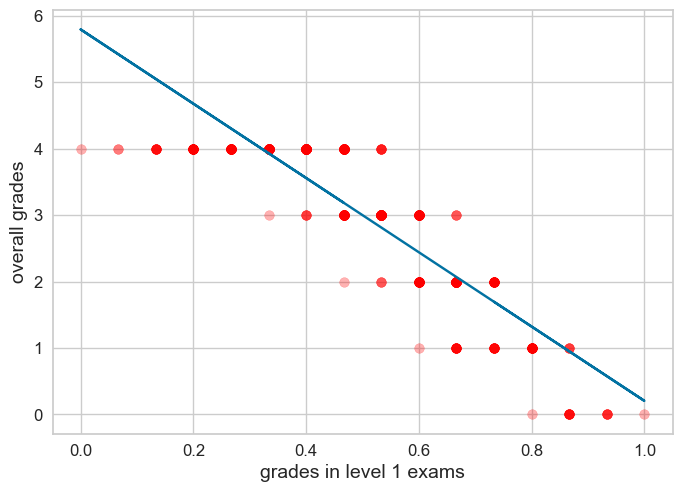

In [687]:
plt.plot(X_train, y_pred_train)
plt.scatter(X_train, Y_train, color = 'red', alpha = 0.3)
plt.xlabel("grades in level 1 exams")
plt.ylabel("overall grades")

Visually picking thresholds for grades:
- Threshold for A: grades < 0.5
- Threshold for B: 0.5 < grades < 1.5
- Threshold for C: 1.5 < grades < 2.5
- Threshold for D: 2.5 < grades < 3.5
- Threshold for E: grades > 3.5 

### Checking Accuracy over Test Set

In [688]:
def threshold(predictions):
    for i in range (len(predictions)):
        if predictions[i] > 3.5:
            predictions[i] = 4
        elif (predictions[i] > 2.5) & (predictions[i]<3.5):
            predictions[i] = 3
        elif (predictions[i] > 1.5) & (predictions[i] < 2.5):
            predictions[i] = 2
        elif (predictions[i] > 0.5) & (predictions[i] < 1.5):
            predictions[i] = 1
        else: 
            predictions[i] = 0

In [689]:
# predict grades
y_pred_test = lin_reg.predict(X_test)
#apply threshold
threshold(y_pred_test)
# Model Accuracy
print("Accuracy: ", metrics.accuracy_score(Y_test, y_pred_test))

Accuracy:  0.7320261437908496


### Mulitple Linear Regression

In [690]:
x = data4.iloc[:,:-1]
#encode target class
le = LabelEncoder()
y = le.fit_transform(data4.iloc[:,-1]) #final grade column 

lr = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25) 

lr.fit(X_train, Y_train) #train linear regression on X and y


# predict grades
y_pred_test = lr.predict(X_test)
#apply threshold
threshold(y_pred_test)
# Model Accuracy
print("Accuracy: ", metrics.accuracy_score(Y_test, y_pred_test))


Accuracy:  0.8627450980392157


### Mean Sqaures Error (MSE) over Test Set

In [710]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, y_pred_test)
print(mse)

rmse = np.sqrt(mean_squared_error(Y_test, y_pred_test)) # RMSE - Result is square rooted to make it more interpretable
print(rmse)

2.30718954248366
1.5189435613226911


In [711]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, y_pred_test)
print(mae)

1.1699346405228759


In [730]:
precision = precision_score(Y_test,y_pred_test, average='macro')
print(f"Macro Average Precision Score of the classifier %s is %s" % (lin_reg, precision))

recall = recall_score(Y_test,y_pred_test, average='macro')
print(f"Macro Average Recall Score of the classifier %s is %s" % (lin_reg, recall))

fscore = f1_score(Y_test,y_pred_test, average='macro')
print(f"Micro Average F1 Score of the classifier %s is %s" % (lin_reg, fscore))

Macro Average Precision Score of the classifier LinearRegression() is 0.1896777101645256
Macro Average Recall Score of the classifier LinearRegression() is 0.19333333333333333
Micro Average F1 Score of the classifier LinearRegression() is 0.18305873231246367


### Logistic Regression

In [715]:
from sklearn.linear_model import LogisticRegression
#specifying the multi_class parameter as ovr to use the one-vs-rest scheme to perform multi-class classification
lg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42) 

In [716]:
# Getting all the columns except final_grade from data4 
required_columns = ['school', 'sex', 'age', 'address', 'fam_size', 'parent_status',
       'mom_edu', 'dad_edu', 'mom_job', 'dad_job', 'reason', 'guardian',
       'traveltime', 'studytime', 'failures', 'school_support', 'fam_support',
       'paid_class', 'activities', 'nursery', 'higher_edu', 'internet',
       'romantic_relations', 'fam_relations', 'freetime', 'outings',
       'workday_alcohol', 'weekend_alcohol', 'health', 'absences', 'G1', 'G2',
       'G3', 'avg_grade']
x = data4[required_columns]
#encode target class
le = LabelEncoder()
y = le.fit_transform(data4.iloc[:,-1]) #final grade column 


X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25) 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [717]:
lg_model.fit(X_train, Y_train)

C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=42)

In [721]:
new_X_Test = X_test.copy()
new_X_Train = X_train.copy()
lg_model.predict(new_X_Test) #creating a new column to show the predicted label based on G1
y_pred = lg_model.predict(new_X_Test)
#new_X_Test

In [722]:
lg_model.score(X_test,Y_test)# mean accuracy on the given test data and labels.

0.7777777777777778

In [698]:
new_X_Test = X_test.copy()
new_X_Train = X_train.copy()

In [699]:
sumtrain = 0
sumtest = 0
for i in range(10):
    lg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42, max_iter=500) 
    lg_model.fit(new_X_Train, Y_train)
    tr_pred = lg_model.predict(new_X_Train)
    te_pred = lg_model.predict(new_X_Test)
#     new_X_Train['tr_predicted'] = tr_pred
#     new_X_Test['te_predicted'] = te_pred
    sumtrain = sumtrain + lg_model.score(new_X_Train,Y_train)
    sumtest = sumtest + lg_model.score(new_X_Test,Y_test)

print("Train Accuracy: ", sumtrain/10)
print("Test Accuracy: ", sumtest/10)

Train Accuracy:  0.8449781659388647
Test Accuracy:  0.7450980392156863


In [700]:
from sklearn.linear_model import SGDClassifier
sg = SGDClassifier(loss= "log")
sg.fit(X_train,Y_train)
scores = cross_val_score(sg, X_train, Y_train, cv=10) # using the stratified ten-fold cross-validation method
acc = scores.mean()
print("Accuracy of %s is %s"%(sg,acc))

C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Accuracy of SGDClassifier(loss='log') is 0.6703864734299516


In [701]:
sg.predict(X_test)
scores = cross_val_score(sg, X_test, Y_test, cv=3)
acc = scores.mean()
print("Accuracy of %s is %s"%(sg,acc))

Accuracy of SGDClassifier(loss='log') is 0.5620915032679737


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [702]:
iters = [50,100,150,200,250,300,350,500,700,1000,1500]
for iter1 in iters:
    sg = SGDClassifier(loss= "log", max_iter=iter1)
    sg.fit(X_train,Y_train)
    sg.predict(X_test)
    scores = cross_val_score(sg, X_test, Y_test, cv=3) # The least populated class in y has only 4 members, which is less than n_splits when taken as 10 for eg.
    acc = scores.mean()
    print("Accuracy of %s is %s"%(sg,acc))

C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Accuracy of SGDClassifier(loss='log', max_iter=50) is 0.5555555555555555


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Accuracy of SGDClassifier(loss='log', max_iter=100) is 0.562091503267974


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packag

Accuracy of SGDClassifier(loss='log', max_iter=150) is 0.5424836601307189


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Accuracy of SGDClassifier(loss='log', max_iter=200) is 0.562091503267974


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packag

Accuracy of SGDClassifier(loss='log', max_iter=250) is 0.5228758169934641


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Accuracy of SGDClassifier(loss='log', max_iter=300) is 0.5490196078431372


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packag

Accuracy of SGDClassifier(loss='log', max_iter=350) is 0.5032679738562091
Accuracy of SGDClassifier(loss='log', max_iter=500) is 0.49019607843137253


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packag

Accuracy of SGDClassifier(loss='log', max_iter=700) is 0.5620915032679739
Accuracy of SGDClassifier(loss='log') is 0.5163398692810457
Accuracy of SGDClassifier(loss='log', max_iter=1500) is 0.5228758169934641


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [703]:
alphas = [0.0001,0.0009,0.009,0.09,0.9,0.001,0.001,0.01,0.05]
for alpha in alphas:
    sg = SGDClassifier(loss= "log", max_iter=700, alpha=alpha)
    sg.fit(X_train,Y_train)
    sg.predict(X_test)
    scores = cross_val_score(sg, X_test, Y_test, cv=3) # using the stratified ten-fold cross-validation method
    acc = scores.mean()
    print("Accuracy of %s is %s"%(sg,acc))

C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packag

Accuracy of SGDClassifier(loss='log', max_iter=700) is 0.5555555555555556


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Accuracy of SGDClassifier(alpha=0.0009, loss='log', max_iter=700) is 0.522875816993464


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packag

Accuracy of SGDClassifier(alpha=0.009, loss='log', max_iter=700) is 0.5555555555555555
Accuracy of SGDClassifier(alpha=0.09, loss='log', max_iter=700) is 0.5098039215686274


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packag

Accuracy of SGDClassifier(alpha=0.9, loss='log', max_iter=700) is 0.43137254901960786
Accuracy of SGDClassifier(alpha=0.001, loss='log', max_iter=700) is 0.5424836601307189


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packag

Accuracy of SGDClassifier(alpha=0.001, loss='log', max_iter=700) is 0.5555555555555555
Accuracy of SGDClassifier(alpha=0.01, loss='log', max_iter=700) is 0.5490196078431372
Accuracy of SGDClassifier(alpha=0.05, loss='log', max_iter=700) is 0.5555555555555555


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packag

In [728]:
sg = SGDClassifier(loss= "log", alpha=0.01, max_iter=700)
sg.fit(X_train,Y_train)
scores1 = cross_val_score(sg, X_train, Y_train, cv=3) # using the stratified ten-fold cross-validation method
acc1 = scores1.mean()
y_pred = sg.predict(X_test)
scores2 = cross_val_score(sg, X_test, Y_test, cv=3) # using the stratified ten-fold cross-validation method
acc2 = scores2.mean()

print("Train Accuracy: ", acc1)
print("Test Accuracy: ",acc2)

Train Accuracy:  0.6026975117532393
Test Accuracy:  0.6078431372549019


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [729]:
precision = precision_score(Y_test,y_pred, average='macro')
print(f"Macro Average Precision Score of the classifier %s is %s" % (lg_model, precision))

recall = recall_score(Y_test,y_pred, average='macro')
print(f"Macro Average Recall Score of the classifier %s is %s" % (lg_model, recall))

fscore = f1_score(Y_test,y_pred, average='macro')
print(f"Micro Average F1 Score of the classifier %s is %s" % (lg_model, fscore))

Macro Average Precision Score of the classifier LogisticRegression(multi_class='multinomial', random_state=42) is 0.3313909889974799
Macro Average Recall Score of the classifier LogisticRegression(multi_class='multinomial', random_state=42) is 0.3591666666666667
Micro Average F1 Score of the classifier LogisticRegression(multi_class='multinomial', random_state=42) is 0.3378253552166596


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [705]:
# n_labels = len(np.unique(Y_train))
# n_labels

In [706]:
# for i in range(n_labels):
#     sub_model = LogisticRegression(penalty=lg_model.penalty, C=lg_model.C)
#     sub_model.coef_ = lg_model.coef_[i].reshape(1, -1)
#     sub_model.intercept_ = lg_model.intercept_[i].reshape(-1, 1)
#     sub_model.classes_ = np.array([0, 1])

#     y_train_ovr = np.where(Y_train == i, 1, 0)
#     score = sub_model.score(X_train, y_train_ovr)

#     print(f"OVR for label={i}, score={score:.4f

## Multilayer Perceptron
The problem represented by this dataset is identifying the presence of metastases from a 96 * 96 digital histopathology images. A positive label indicates that the center 32x32px region of a patch contains at least one pixel of tumor tissue. Tumor tissue in the outer region of the patch does not influence the label. https://www.kaggle.com/competitions/histopathologic-cancer-detection/data

In [8]:
image_data = pd.read_csv("train_labels.csv")  # reading the csv file with the data

print("dimensions:",image_data.shape)  # to understand the dimensions of the dataset
# to display the number of rows/instances
print("rows = {}".format(image_data.shape[0]))
# to display the number of columns/attributes
print("columns = {}".format(image_data.shape[1]))

dimensions: (220025, 2)
rows = 220025
columns = 2


In [9]:
image_data.head(10)  # to get a glimpse of the data

id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0
5  acfe80838488fae3c89bd21ade75be5c34e66be7      0
6  a24ce148f6ffa7ef8eefb4efb12ebffe8dd700da      1
7  7f6ccae485af121e0b6ee733022e226ee6b0c65f      1
8  559e55a64c9ba828f700e948f6886f4cea919261      0
9  8eaaa7a400aa79d36c2440a4aa101cc14256cda4      0

In [10]:
image_data.info() # to understand the columns and their types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220025 entries, 0 to 220024
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      220025 non-null  object
 1   label   220025 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


In [11]:
image_data.isnull().sum().sum()  # to check for any null values in the dataset

0

In [12]:
image_data.duplicated().describe() # one unique value of false means no duplicate value

count     220025
unique         1
top        False
freq      220025
dtype: object

In [15]:
# non-malignant cases- 0
# malignant cases- 1
image_data['label'].value_counts() 

0    130908
1     89117
Name: label, dtype: int64

<AxesSubplot:ylabel='label'>

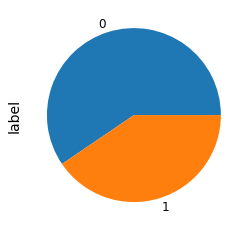

In [31]:
image_data['label'].value_counts().plot(kind="pie")

The dataset is imbalanced with more images non-malignant/benign cases rather than those that are malignant.

In [24]:
m = image_data.loc[image_data['label']==1] # malignant
nm = image_data.loc[image_data['label']==0] # non-malignant #['id'].values

In [21]:
# displaying images

23.87424045138889

In [30]:
# to sample as many random images as possible (so 89117 is the least of the two values) and ensure the tranining set has equal number of of 0 and 1 cases
custom_image_data = pd.concat([m.sample(89117,random_state=42), nm.sample(89117,random_state=42)], axis=0, ignore_index=True).reset_index()
custom_image_data['label'].value_counts() # to verify the process 

1    89117
0    89117
Name: label, dtype: int64

In [34]:
# put confusion matrix in the end
import matplotlib.image as mpimg

img = mpimg.imread(f'../train/{custom_image_data.iloc[47,0]}.tif')
imgplot = plt.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: '../train/47.tif'

In [ ]:
print(img.shape)